In [1]:
# Intel optimzation
from sklearnex import patch_sklearn
patch_sklearn("SVC")

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }


In [5]:
pd.set_option('max_columns', None)
train = pd.read_csv('train.csv', dtype=dtypes, low_memory=True, nrows=1000000)
train

MachineIdentifier   ProductName EngineVersion  \
0       0000028988387b115f69f31a3bf04f09  win8defender   1.1.15100.1   
1       000007535c3f730efa9ea0b7ef1bd645  win8defender   1.1.14600.4   
2       000007905a28d863f6d0d597892cd692  win8defender   1.1.15100.1   
3       00000b11598a75ea8ba1beea8459149f  win8defender   1.1.15100.1   
4       000014a5f00daa18e76b81417eeb99fc  win8defender   1.1.15100.1   
...                                  ...           ...           ...   
999995  1cb96260a4e91a314545ee86bf82b55d  win8defender   1.1.15100.1   
999996  1cb96272df74bb640b139621672ab18f  win8defender   1.1.15200.1   
999997  1cb962beceea1ea69c563f7eb36b8fd0  win8defender   1.1.14901.4   
999998  1cb96609b76e4e4076463458ab3fb61a  win8defender   1.1.15200.1   
999999  1cb967d91a84c327deb782aca550b719  win8defender   1.1.15200.1   

              AppVersion  AvSigVersion  IsBeta  RtpStateBitfield  \
0        4.18.1807.18075  1.273.1735.0       0               7.0   
1           4.13.17134.1    1.263.48.0       0               7.0   
2        4.18.1807.18075  1.273.1341.0       0               7.0   
3        4.18.1807.18075  1.273.1527.0       0               7.0   
4        4.18.1807.18075  1.273.1379.0       0               7.0   
...                  ...           ...     ...               ...   
999995     4.12.16299.15  1.273.1188.0       0               7.0   
999996   4.18.1807.18075  1.275.1140.0       0               7.0   
999997  4.16.17656.18052   1.269.224.0       0               7.0   
999998   4.18.1807.18075   1.275.727.0       0               7.0   
999999   4.18.1807.18075  1.275.1086.0       0               7.0   

        IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                      0                        NaN   
1                      0                        NaN   
2                      0                        NaN   
3                      0                        NaN   
4                      0                        NaN   
...                  ...                        ...   
999995                 0                        NaN   
999996                 0                        NaN   
999997                 0                        NaN   
999998                 0                        NaN   
999999                 0                        NaN   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     NaN   
4            1                 18         37376.0                     NaN   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     NaN   
999997       1                 93         85408.0             

In [6]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 83 columns):
 #   Column                                             Non-Null Count    Dtype   
---  ------                                             --------------    -----   
 0   MachineIdentifier                                  1000000 non-null  category
 1   ProductName                                        1000000 non-null  category
 2   EngineVersion                                      1000000 non-null  category
 3   AppVersion                                         1000000 non-null  category
 4   AvSigVersion                                       1000000 non-null  category
 5   IsBeta                                             1000000 non-null  int8    
 6   RtpStateBitfield                                   996334 non-null   float16 
 7   IsSxsPassiveMode                                   1000000 non-null  int8    
 8   DefaultBrowsersIdentifier                          48

In [7]:
train['HasDetections'].unique()

array([0, 1], dtype=int8)

In [8]:
train.isna().any()[lambda x: x]

RtpStateBitfield                                     True
DefaultBrowsersIdentifier                            True
AVProductStatesIdentifier                            True
AVProductsInstalled                                  True
AVProductsEnabled                                    True
CityIdentifier                                       True
OrganizationIdentifier                               True
GeoNameIdentifier                                    True
OsBuildLab                                           True
IsProtected                                          True
PuaMode                                              True
SMode                                                True
IeVerIdentifier                                      True
SmartScreen                                          True
Firewall                                             True
UacLuaenable                                         True
Census_OEMNameIdentifier                             True
Census_OEMMode

# REMOVE NULL VALUES

Fill null values in float values 

In [9]:
train = train.replace(np.nan,0)

In [10]:
train.isna().any()[lambda x: x]

OsBuildLab                      True
PuaMode                         True
SmartScreen                     True
Census_ProcessorClass           True
Census_PrimaryDiskTypeName      True
Census_ChassisTypeName          True
Census_PowerPlatformRoleName    True
Census_InternalBatteryType      True
dtype: bool

## MAKE NEW INDEX FOR DATAFRAME

In [11]:
train.set_index('MachineIdentifier')

ProductName EngineVersion  \
MachineIdentifier                                              
0000028988387b115f69f31a3bf04f09  win8defender   1.1.15100.1   
000007535c3f730efa9ea0b7ef1bd645  win8defender   1.1.14600.4   
000007905a28d863f6d0d597892cd692  win8defender   1.1.15100.1   
00000b11598a75ea8ba1beea8459149f  win8defender   1.1.15100.1   
000014a5f00daa18e76b81417eeb99fc  win8defender   1.1.15100.1   
...                                        ...           ...   
1cb96260a4e91a314545ee86bf82b55d  win8defender   1.1.15100.1   
1cb96272df74bb640b139621672ab18f  win8defender   1.1.15200.1   
1cb962beceea1ea69c563f7eb36b8fd0  win8defender   1.1.14901.4   
1cb96609b76e4e4076463458ab3fb61a  win8defender   1.1.15200.1   
1cb967d91a84c327deb782aca550b719  win8defender   1.1.15200.1   

                                        AppVersion  AvSigVersion  IsBeta  \
MachineIdentifier                                                          
0000028988387b115f69f31a3bf04f09   4.18.1807.18075  1.273.1735.0       0   
000007535c3f730efa9ea0b7ef1bd645      4.13.17134.1    1.263.48.0       0   
000007905a28d863f6d0d597892cd692   4.18.1807.18075  1.273.1341.0       0   
00000b11598a75ea8ba1beea8459149f   4.18.1807.18075  1.273.1527.0       0   
000014a5f00daa18e76b81417eeb99fc   4.18.1807.18075  1.273.1379.0       0   
...                                            ...           ...     ...   
1cb96260a4e91a314545ee86bf82b55d     4.12.16299.15  1.273.1188.0       0   
1cb96272df74bb640b139621672ab18f   4.18.1807.18075  1.275.1140.0       0   
1cb962beceea1ea69c563f7eb36b8fd0  4.16.17656.18052   1.269.224.0       0   
1cb96609b76e4e4076463458ab3fb61a   4.18.1807.18075   1.275.727.0       0   
1cb967d91a84c327deb782aca550b719   4.18.1807.18075  1.275.1086.0       0   

                                  RtpStateBitfield  IsSxsPassiveMode  \
MachineIdentifier                                                      
0000028988387b115f69f31a3bf04f09               7.0                 0   
000007535c3f730efa9ea0b7ef1bd645               7.0                 0   
000007905a28d863f6d0d597892cd692               7.0                 0   
00000b11598a75ea8ba1beea8459149f               7.0                 0   
000014a5f00daa18e76b81417eeb99fc               7.0                 0   
...                                            ...               ...   
1cb96260a4e91a314545ee86bf82b55d               7.0                 0   
1cb96272df74bb640b139621672ab18f               7.0                 0   
1cb962beceea1ea69c563f7eb36b8fd0               7.0                 0   
1cb96609b76e4e4076463458ab3fb61a               7.0                 0   
1cb967d91a84c327deb782aca550b719               7.0                 0   

                                  DefaultBrowsersIdentifier  \
MachineIdentifier                                             
0000028988387b115f69f31a3bf04f09                        0.0   
000007535c3f730efa9ea0b7ef1bd645                        0.0   
000007905a28d863f6d0d597892cd692                        0.0   
00000b11598a75ea8ba1beea8459149f                        0.0   
000014a5f00daa18e76b81417eeb99fc                        0.0   
...                                                     ...   
1cb96260a4e91a314545ee86bf82b55d                        0.0   
1cb96272df74bb640b139621672ab18f                        0.0   
1cb962beceea1ea69c563f7eb36b8fd0                        0.0   
1cb96609b76e4e4076463458ab3fb61a                        0.0   
1cb967d91a84c327deb782aca550b719                        0.0   

                                  AVProductStatesIdentifier  \
MachineIdentifier                                             
0000028988387b115f69f31a3bf04f09                    53447.0   
000007535c3f730efa9ea0b7ef1bd645                    53447.0   
000007905a28d863f6d0d597892cd692                    53447.0   
00000b11598a75ea8ba1beea8459149f                    53447.0   
000014a5f00daa18e76b81417eeb99fc                    53447.0   
...            

# Encoding
Better coding leads to a better model and most algorithms cannot handle categorical variables unless they are cast to a numeric value.
Categorical features are generally divided into 3 types:
 

Binary: Either / or

    Examples:
    If not
    True False


Ordinal: Specific ordered groups.

    Examples:
    low medium high
    cold, hot, hot lava


Nominal: Unordered groups.

    Examples of
    cat, dog, tiger
    pizza, burger, coke
![alt text](https://miro.medium.com/max/1250/0*NBVi7M3sGyiUSyd5.png "encoding")

## ProductName 

In [12]:
train['ProductName'].unique()

['win8defender', 'mse', 'mseprerelease', 'windowsintune', 'fep', 'scep']
Categories (6, object): ['win8defender', 'mse', 'mseprerelease', 'windowsintune', 'fep', 'scep']

# Weight of Evidence Encoding 
Weight of Evidence (WoE) measures the “strength” of a grouping technique to separate good and bad. Weight of evidence (WOE) measures how much the evidence supports or undermines a hypothesis.

![alt text](https://miro.medium.com/max/281/1*AqcqDwUB4fk8rcmbvxGiEQ.gif "Title")

In [13]:
pr_df = train.groupby('ProductName')['HasDetections'].mean()
pr_df = pd.DataFrame(pr_df)
pr_df = pr_df.rename(columns = {'HasDetections': 'Good'})
pr_df['Bad']= 1 - pr_df.Good
pr_df['Bad']= np.where(pr_df['Bad']==0, 0.000001, pr_df['Bad'])
pr_df['PR']=(pr_df.Good/pr_df.Bad)
pr_df

Good       Bad              PR
ProductName                                      
mse            0.483508  0.516492        0.936139
win8defender   0.499990  0.500010        0.999960
mseprerelease  0.250000  0.750000        0.333333
windowsintune  0.000000  1.000000        0.000000
fep            0.500000  0.500000        1.000000
scep           1.000000  0.000001  1000000.000000

In [14]:
train.loc[:, 'ProductName'] = train['ProductName'].map(pr_df['PR'])
train

MachineIdentifier ProductName EngineVersion  \
0       0000028988387b115f69f31a3bf04f09     0.99996   1.1.15100.1   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996   1.1.14600.4   
2       000007905a28d863f6d0d597892cd692     0.99996   1.1.15100.1   
3       00000b11598a75ea8ba1beea8459149f     0.99996   1.1.15100.1   
4       000014a5f00daa18e76b81417eeb99fc     0.99996   1.1.15100.1   
...                                  ...         ...           ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996   1.1.15100.1   
999996  1cb96272df74bb640b139621672ab18f     0.99996   1.1.15200.1   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996   1.1.14901.4   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996   1.1.15200.1   
999999  1cb967d91a84c327deb782aca550b719     0.99996   1.1.15200.1   

              AppVersion  AvSigVersion  IsBeta  RtpStateBitfield  \
0        4.18.1807.18075  1.273.1735.0       0               7.0   
1           4.13.17134.1    1.263.48.0       0               7.0   
2        4.18.1807.18075  1.273.1341.0       0               7.0   
3        4.18.1807.18075  1.273.1527.0       0               7.0   
4        4.18.1807.18075  1.273.1379.0       0               7.0   
...                  ...           ...     ...               ...   
999995     4.12.16299.15  1.273.1188.0       0               7.0   
999996   4.18.1807.18075  1.275.1140.0       0               7.0   
999997  4.16.17656.18052   1.269.224.0       0               7.0   
999998   4.18.1807.18075   1.275.727.0       0               7.0   
999999   4.18.1807.18075  1.275.1086.0       0               7.0   

        IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                      0                        0.0   
1                      0                        0.0   
2                      0                        0.0   
3                      0                        0.0   
4                      0                        0.0   
...                  ...                        ...   
999995                 0                        0.0   
999996                 0                        0.0   
999997                 0                        0.0   
999998                 0                        0.0   
999999                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998   

In [15]:
train['ProductName'].unique()

[0.999960, 0.936139, 0.333333, 0.000000, 1.000000, 1000000.000000]
Categories (6, float64): [0.999960, 0.936139, 0.333333, 0.000000, 1.000000, 1000000.000000]

## EngineVersion

In [16]:
train['EngineVersion'].unique()

['1.1.15100.1', '1.1.14600.4', '1.1.15200.1', '1.1.15300.6', '1.1.13504.0', ..., '1.1.11400.0', '1.1.12804.0', '1.1.12300.0', '1.1.12205.0', '1.1.11903.0']
Length: 60
Categories (60, object): ['1.1.15100.1', '1.1.14600.4', '1.1.15200.1', '1.1.15300.6', ..., '1.1.12804.0', '1.1.12300.0', '1.1.12205.0', '1.1.11903.0']

## Leave One Out Encoder

Leave One Out encoding essentially calculates the mean of the target variables for all records that contain the same value for the categorical feature variable in question.

In [17]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import category_encoders as ce

In [18]:
ce_leave = ce.LeaveOneOutEncoder(cols = ['EngineVersion'])
y, X = train['HasDetections'], train['EngineVersion']
ce_leave.fit(X, y)        
ce_leave.transform(X, y)
result = ce_leave.transform(X, y)
result

EngineVersion
0            0.552203
1            0.437399
2            0.552203
3            0.552200
4            0.552200
...               ...
999995       0.552200
999996       0.492578
999997       0.299398
999998       0.492578
999999       0.492578

[1000000 rows x 1 columns]

In [19]:
train = pd.merge(train, result, left_index=True, right_index=True)
train.head(10)

MachineIdentifier ProductName EngineVersion_x  \
0  0000028988387b115f69f31a3bf04f09     0.99996     1.1.15100.1   
1  000007535c3f730efa9ea0b7ef1bd645     0.99996     1.1.14600.4   
2  000007905a28d863f6d0d597892cd692     0.99996     1.1.15100.1   
3  00000b11598a75ea8ba1beea8459149f     0.99996     1.1.15100.1   
4  000014a5f00daa18e76b81417eeb99fc     0.99996     1.1.15100.1   
5  000016191b897145d069102325cab760     0.99996     1.1.15100.1   
6  0000161e8abf8d8b89c5ab8787fd712b     0.99996     1.1.15100.1   
7  000019515bc8f95851aff6de873405e8     0.99996     1.1.15100.1   
8  00001a027a0ab970c408182df8484fce     0.99996     1.1.15200.1   
9  00001a18d69bb60bda9779408dcf02ac     0.99996     1.1.15100.1   

        AppVersion  AvSigVersion  IsBeta  RtpStateBitfield  IsSxsPassiveMode  \
0  4.18.1807.18075  1.273.1735.0       0               7.0                 0   
1     4.13.17134.1    1.263.48.0       0               7.0                 0   
2  4.18.1807.18075  1.273.1341.0       0               7.0                 0   
3  4.18.1807.18075  1.273.1527.0       0               7.0                 0   
4  4.18.1807.18075  1.273.1379.0       0               7.0                 0   
5  4.18.1807.18075  1.273.1094.0       0               7.0                 0   
6  4.18.1807.18075   1.273.845.0       0               7.0                 0   
7  4.18.1807.18075  1.273.1393.0       0               7.0                 0   
8  4.18.1807.18075   1.275.988.0       0               7.0                 0   
9  4.18.1807.18075   1.273.973.0       0               7.0                 0   

   DefaultBrowsersIdentifier  AVProductStatesIdentifier  AVProductsInstalled  \
0                        0.0                    53447.0                  1.0   
1                        0.0                    53447.0                  1.0   
2                        0.0                    53447.0                  1.0   
3                        0.0                    53447.0                  1.0   
4                        0.0                    53447.0                  1.0   
5                        0.0                    53447.0                  1.0   
6                        0.0                    43927.0                  2.0   
7                        0.0                    53447.0                  1.0   
8                        0.0                    53447.0                  1.0   
9                        0.0                    46413.0                  2.0   

   AVProductsEnabled  HasTpm  CountryIdentifier  CityIdentifier  \
0                1.0       1                 29        128035.0   
1                1.0       1                 93          1482.0   
2                1.0       1                 86        153579.0   
3                1.0       1                 88         20710.0   
4                1.0       1                 18         37376.0   
5                1.0       1                 97         13598.0   
6                1.0       1                 78         81215.0   
7                1.0       1                 97        150323.0   
8                1.0       1                164        155006.0   
9                1.0       1                 93         98572.0   

   OrganizationIdentifier  GeoNameIdentifier  LocaleEnglishNameIdentifier  \
0                    18.0               35.0                          -85   
1                    18.0              119.0                           64   
2                    18.0               64.0                           49   
3                     0.0              117.0                          115   
4                     0.0              277.0                           75   
5                    27.0              126.0                          124   
6                     0.0               89.0                           88   
7                    27.0              126.0                          124   
8                    27.0              205.0                          -84   
9         

In [20]:
train = train.rename(columns={"EngineVersion_y": "EngineVersion"})
train

MachineIdentifier ProductName EngineVersion_x  \
0       0000028988387b115f69f31a3bf04f09     0.99996     1.1.15100.1   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996     1.1.14600.4   
2       000007905a28d863f6d0d597892cd692     0.99996     1.1.15100.1   
3       00000b11598a75ea8ba1beea8459149f     0.99996     1.1.15100.1   
4       000014a5f00daa18e76b81417eeb99fc     0.99996     1.1.15100.1   
...                                  ...         ...             ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996     1.1.15100.1   
999996  1cb96272df74bb640b139621672ab18f     0.99996     1.1.15200.1   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996     1.1.14901.4   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996     1.1.15200.1   
999999  1cb967d91a84c327deb782aca550b719     0.99996     1.1.15200.1   

              AppVersion  AvSigVersion  IsBeta  RtpStateBitfield  \
0        4.18.1807.18075  1.273.1735.0       0               7.0   
1           4.13.17134.1    1.263.48.0       0               7.0   
2        4.18.1807.18075  1.273.1341.0       0               7.0   
3        4.18.1807.18075  1.273.1527.0       0               7.0   
4        4.18.1807.18075  1.273.1379.0       0               7.0   
...                  ...           ...     ...               ...   
999995     4.12.16299.15  1.273.1188.0       0               7.0   
999996   4.18.1807.18075  1.275.1140.0       0               7.0   
999997  4.16.17656.18052   1.269.224.0       0               7.0   
999998   4.18.1807.18075   1.275.727.0       0               7.0   
999999   4.18.1807.18075  1.275.1086.0       0               7.0   

        IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                      0                        0.0   
1                      0                        0.0   
2                      0                        0.0   
3                      0                        0.0   
4                      0                        0.0   
...                  ...                        ...   
999995                 0                        0.0   
999996                 0                        0.0   
999997                 0                        0.0   
999998                 0                        0.0   
999999                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0             

In [21]:
train.sort_values(by='EngineVersion', ascending=False)

MachineIdentifier ProductName EngineVersion_x  \
870315  190111f3e49077d2c135c4cb88f2af25     0.99996     1.1.12400.0   
322627  0947d95e0e8120d7e660152ba0f92449     0.99996     1.1.12400.0   
784230  1687337eef2cb8e362134212c277871b     0.99996     1.1.11903.0   
74884   02285a5295bb19c19f37c5a544d66e7e     0.99996     1.1.12400.0   
760727  15dae702549ef7eead4dcd8c6f3e46d1     0.99996     1.1.13406.0   
...                                  ...         ...             ...   
747851  157be0a70e6df17a430c89fa9c3be615     0.99996     1.1.14102.0   
972040  1bec02f5283616bde4e58d34a34be506     0.99996     1.1.14102.0   
240013  06e6eb2da294c980083729d70e9a54f5     0.99996     1.1.12706.0   
349934  0a111a9f5e79313811e126ca9564c8b8     0.99996     1.1.12603.0   
222021  06628192884c0bc1f23bc661df47ec90     0.99996     1.1.14102.0   

             AppVersion  AvSigVersion  IsBeta  RtpStateBitfield  \
870315      4.9.10586.0  1.213.5817.0       0               7.0   
322627    4.12.16299.15  1.213.3814.0       0               0.0   
784230    4.12.16299.15  1.203.1253.0       0               0.0   
74884     4.12.16299.15   1.213.475.0       0               0.0   
760727  4.10.14393.1794  1.233.4161.0       0               7.0   
...                 ...           ...     ...               ...   
747851    4.12.16299.15   1.249.813.0       0               7.0   
972040   4.13.17134.228   1.249.807.0       0               7.0   
240013   4.13.17134.228  1.219.1716.0       0               0.0   
349934  4.10.14393.1794   1.217.797.0       0               0.0   
222021     4.13.17134.1   1.249.872.0       0               7.0   

        IsSxsPassiveMode  DefaultBrowsersIdentifier  \
870315                 0                        0.0   
322627                 0                        0.0   
784230                 0                       26.0   
74884                  0                      239.0   
760727                 0                      311.0   
...                  ...                        ...   
747851                 0                     1235.0   
972040                 0                      146.0   
240013                 0                      146.0   
349934                 0                        0.0   
222021                 0                      146.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
870315                    53447.0                  1.0                1.0   
322627                    33395.0                  2.0                1.0   
784230                    52365.0                  2.0                1.0   
74884                     53447.0                  1.0                1.0   
760727                     3371.0                  2.0                1.0   
...                           ...                  ...                ...   
747851                    22728.0                  2.0                1.0   
972040                    47238.0                  2.0                1.0   
240013                    40431.0                  2.0                1.0   
349934                     9471.0                  2.0                1.0   
222021                    58237.0                  2.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
870315       1                 21        122796.0                     0.0   
322627       1                141         76894.0                    27.0   
784230       1                 41         32121.0                    27.0   
74884        1                 66        144572.0                    27.0   
760727       1                 97        149354.0                     0.0   
...        ...                ...             ...                     ...   
747851       1                130          9927.0                     0.0   
972040       1                 83         51427.0                     0.0   
240013       1                201           900.0                     0.0 

In [22]:
train =  train.drop(['EngineVersion_x'], axis=1)
train

MachineIdentifier ProductName        AppVersion  \
0       0000028988387b115f69f31a3bf04f09     0.99996   4.18.1807.18075   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996      4.13.17134.1   
2       000007905a28d863f6d0d597892cd692     0.99996   4.18.1807.18075   
3       00000b11598a75ea8ba1beea8459149f     0.99996   4.18.1807.18075   
4       000014a5f00daa18e76b81417eeb99fc     0.99996   4.18.1807.18075   
...                                  ...         ...               ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996     4.12.16299.15   
999996  1cb96272df74bb640b139621672ab18f     0.99996   4.18.1807.18075   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996  4.16.17656.18052   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996   4.18.1807.18075   
999999  1cb967d91a84c327deb782aca550b719     0.99996   4.18.1807.18075   

        AvSigVersion  IsBeta  RtpStateBitfield  IsSxsPassiveMode  \
0       1.273.1735.0       0               7.0                 0   
1         1.263.48.0       0               7.0                 0   
2       1.273.1341.0       0               7.0                 0   
3       1.273.1527.0       0               7.0                 0   
4       1.273.1379.0       0               7.0                 0   
...              ...     ...               ...               ...   
999995  1.273.1188.0       0               7.0                 0   
999996  1.275.1140.0       0               7.0                 0   
999997   1.269.224.0       0               7.0                 0   
999998   1.275.727.0       0               7.0                 0   
999999  1.275.1086.0       0               7.0                 0   

        DefaultBrowsersIdentifier  AVProductStatesIdentifier  \
0                             0.0                    53447.0   
1                             0.0                    53447.0   
2                             0.0                    53447.0   
3                             0.0                    53447.0   
4                             0.0                    53447.0   
...                           ...                        ...   
999995                        0.0                    53447.0   
999996                        0.0                    53447.0   
999997                        0.0                    62773.0   
999998                        0.0                    53447.0   
999999                        0.0                    53447.0   

        AVProductsInstalled  AVProductsEnabled  HasTpm  CountryIdentifier  \
0                       1.0                1.0       1                 29   
1                       1.0                1.0       1                 93   
2                       1.0                1.0       1                 86   
3                       1.0                1.0       1                 88   
4                       1.0                1.0       1                 18   
...                     ...                ...     ...                ...   
999995                  1.0                1.0       1                214   
999996                  1.0                1.0       1                153   
999997                  1.0                1.0       1                 93   
999998                  1.0                1.0       1                 66   
999999                  1.0                1.0       1                141   

        CityIdentifier  OrganizationIdentifier  GeoNameIdentifier  \
0             128035.0                    18.0               35.0   
1               1482.0                    18.0              119.0   
2             153579.0                    18.0               64.0   
3              20710.0                     0.0              117.0   
4              37376.0                     0.0              277.0   
...                ...                     ...                ...   
999995         58607.0                    50.0              287.0   
999996         97734.0                     0.0              193.0   
99

## AppVersion

In [23]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import category_encoders as ce

In [24]:
train['AppVersion'].unique()

['4.18.1807.18075', '4.13.17134.1', '4.9.218.0', '4.18.1806.18062', '4.18.1809.2', ..., '4.18.1806.20033', '4.13.17634.1000', '4.12.17007.18021', '4.15.17655.1000', '4.12.17007.17121']
Length: 95
Categories (95, object): ['4.18.1807.18075', '4.13.17134.1', '4.9.218.0', '4.18.1806.18062', ..., '4.13.17634.1000', '4.12.17007.18021', '4.15.17655.1000', '4.12.17007.17121']

In [25]:
ce_leave = ce.LeaveOneOutEncoder(cols = ['AppVersion'])
y, X = train['HasDetections'], train['AppVersion']
ce_leave.fit(X, y)        
ce_leave.transform(X, y)
result = ce_leave.transform(X, y)
result

AppVersion
0         0.530813
1         0.524711
2         0.530813
3         0.530811
4         0.530811
...            ...
999995    0.457783
999996    0.530811
999997    0.315166
999998    0.530811
999999    0.530811

[1000000 rows x 1 columns]

In [26]:
train = pd.merge(train, result, left_index=True, right_index=True)
train.head(10)

MachineIdentifier ProductName     AppVersion_x  \
0  0000028988387b115f69f31a3bf04f09     0.99996  4.18.1807.18075   
1  000007535c3f730efa9ea0b7ef1bd645     0.99996     4.13.17134.1   
2  000007905a28d863f6d0d597892cd692     0.99996  4.18.1807.18075   
3  00000b11598a75ea8ba1beea8459149f     0.99996  4.18.1807.18075   
4  000014a5f00daa18e76b81417eeb99fc     0.99996  4.18.1807.18075   
5  000016191b897145d069102325cab760     0.99996  4.18.1807.18075   
6  0000161e8abf8d8b89c5ab8787fd712b     0.99996  4.18.1807.18075   
7  000019515bc8f95851aff6de873405e8     0.99996  4.18.1807.18075   
8  00001a027a0ab970c408182df8484fce     0.99996  4.18.1807.18075   
9  00001a18d69bb60bda9779408dcf02ac     0.99996  4.18.1807.18075   

   AvSigVersion  IsBeta  RtpStateBitfield  IsSxsPassiveMode  \
0  1.273.1735.0       0               7.0                 0   
1    1.263.48.0       0               7.0                 0   
2  1.273.1341.0       0               7.0                 0   
3  1.273.1527.0       0               7.0                 0   
4  1.273.1379.0       0               7.0                 0   
5  1.273.1094.0       0               7.0                 0   
6   1.273.845.0       0               7.0                 0   
7  1.273.1393.0       0               7.0                 0   
8   1.275.988.0       0               7.0                 0   
9   1.273.973.0       0               7.0                 0   

   DefaultBrowsersIdentifier  AVProductStatesIdentifier  AVProductsInstalled  \
0                        0.0                    53447.0                  1.0   
1                        0.0                    53447.0                  1.0   
2                        0.0                    53447.0                  1.0   
3                        0.0                    53447.0                  1.0   
4                        0.0                    53447.0                  1.0   
5                        0.0                    53447.0                  1.0   
6                        0.0                    43927.0                  2.0   
7                        0.0                    53447.0                  1.0   
8                        0.0                    53447.0                  1.0   
9                        0.0                    46413.0                  2.0   

   AVProductsEnabled  HasTpm  CountryIdentifier  CityIdentifier  \
0                1.0       1                 29        128035.0   
1                1.0       1                 93          1482.0   
2                1.0       1                 86        153579.0   
3                1.0       1                 88         20710.0   
4                1.0       1                 18         37376.0   
5                1.0       1                 97         13598.0   
6                1.0       1                 78         81215.0   
7                1.0       1                 97        150323.0   
8                1.0       1                164        155006.0   
9                1.0       1                 93         98572.0   

   OrganizationIdentifier  GeoNameIdentifier  LocaleEnglishNameIdentifier  \
0                    18.0               35.0                          -85   
1                    18.0              119.0                           64   
2                    18.0               64.0                           49   
3                     0.0              117.0                          115   
4                     0.0              277.0                           75   
5                    27.0              126.0                          124   
6                     0.0               89.0                           88   
7                    27.0              126.0                          124   
8                    27.0              205.0                          -84   
9                    27.0              119.0                           64   

    Platform Processor     OsVer  OsBuild  OsSuite OsPlatformSubRelease  \
0  windows10       x64  10.0.0.0 

In [27]:
train = train.rename(columns={"AppVersion_y": "AppVersion"})
train

MachineIdentifier ProductName      AppVersion_x  \
0       0000028988387b115f69f31a3bf04f09     0.99996   4.18.1807.18075   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996      4.13.17134.1   
2       000007905a28d863f6d0d597892cd692     0.99996   4.18.1807.18075   
3       00000b11598a75ea8ba1beea8459149f     0.99996   4.18.1807.18075   
4       000014a5f00daa18e76b81417eeb99fc     0.99996   4.18.1807.18075   
...                                  ...         ...               ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996     4.12.16299.15   
999996  1cb96272df74bb640b139621672ab18f     0.99996   4.18.1807.18075   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996  4.16.17656.18052   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996   4.18.1807.18075   
999999  1cb967d91a84c327deb782aca550b719     0.99996   4.18.1807.18075   

        AvSigVersion  IsBeta  RtpStateBitfield  IsSxsPassiveMode  \
0       1.273.1735.0       0               7.0                 0   
1         1.263.48.0       0               7.0                 0   
2       1.273.1341.0       0               7.0                 0   
3       1.273.1527.0       0               7.0                 0   
4       1.273.1379.0       0               7.0                 0   
...              ...     ...               ...               ...   
999995  1.273.1188.0       0               7.0                 0   
999996  1.275.1140.0       0               7.0                 0   
999997   1.269.224.0       0               7.0                 0   
999998   1.275.727.0       0               7.0                 0   
999999  1.275.1086.0       0               7.0                 0   

        DefaultBrowsersIdentifier  AVProductStatesIdentifier  \
0                             0.0                    53447.0   
1                             0.0                    53447.0   
2                             0.0                    53447.0   
3                             0.0                    53447.0   
4                             0.0                    53447.0   
...                           ...                        ...   
999995                        0.0                    53447.0   
999996                        0.0                    53447.0   
999997                        0.0                    62773.0   
999998                        0.0                    53447.0   
999999                        0.0                    53447.0   

        AVProductsInstalled  AVProductsEnabled  HasTpm  CountryIdentifier  \
0                       1.0                1.0       1                 29   
1                       1.0                1.0       1                 93   
2                       1.0                1.0       1                 86   
3                       1.0                1.0       1                 88   
4                       1.0                1.0       1                 18   
...                     ...                ...     ...                ...   
999995                  1.0                1.0       1                214   
999996                  1.0                1.0       1                153   
999997                  1.0                1.0       1                 93   
999998                  1.0                1.0       1                 66   
999999                  1.0                1.0       1                141   

        CityIdentifier  OrganizationIdentifier  GeoNameIdentifier  \
0             128035.0                    18.0               35.0   
1               1482.0                    18.0              119.0   
2             153579.0                    18.0               64.0   
3              20710.0                     0.0              117.0   
4              37376.0                     0.0              277.0   
...                ...                     ...                ...   
999995         58607.0                    50.0              287.0   
999996         97734.0                     0.0              193.0   
99

In [28]:
train =  train.drop(['AppVersion_x'], axis=1)
train

MachineIdentifier ProductName  AvSigVersion  IsBeta  \
0       0000028988387b115f69f31a3bf04f09     0.99996  1.273.1735.0       0   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996    1.263.48.0       0   
2       000007905a28d863f6d0d597892cd692     0.99996  1.273.1341.0       0   
3       00000b11598a75ea8ba1beea8459149f     0.99996  1.273.1527.0       0   
4       000014a5f00daa18e76b81417eeb99fc     0.99996  1.273.1379.0       0   
...                                  ...         ...           ...     ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996  1.273.1188.0       0   
999996  1cb96272df74bb640b139621672ab18f     0.99996  1.275.1140.0       0   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996   1.269.224.0       0   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996   1.275.727.0       0   
999999  1cb967d91a84c327deb782aca550b719     0.99996  1.275.1086.0       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                    7.0                 0                        0.0   
1                    7.0                 0                        0.0   
2                    7.0                 0                        0.0   
3                    7.0                 0                        0.0   
4                    7.0                 0                        0.0   
...                  ...               ...                        ...   
999995               7.0                 0                        0.0   
999996               7.0                 0                        0.0   
999997               7.0                 0                        0.0   
999998               7.0                 0                        0.0   
999999               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998       1                 66        109095.0                    27.0   
999999       1                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier   Platform Processor  \
0                    35.0                          -85  windows10       x64   
1                   119.0                           64  windows10       x64   
2                    64.0                           49  windows10       x64   
3                   117.0                  

## AvSigVersion

In [29]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import category_encoders as ce

In [30]:
train['AvSigVersion'].unique()

['1.273.1735.0', '1.263.48.0', '1.273.1341.0', '1.273.1527.0', '1.273.1379.0', ..., '1.231.179.0', '1.237.1106.0', '1.233.181.0', '1.225.3210.0', '1.225.3309.0']
Length: 7353
Categories (7353, object): ['1.273.1735.0', '1.263.48.0', '1.273.1341.0', '1.273.1527.0', ..., '1.237.1106.0', '1.233.181.0', '1.225.3210.0', '1.225.3309.0']

In [31]:
ce_leave = ce.LeaveOneOutEncoder(cols = ['AvSigVersion'])
y, X = train['HasDetections'], train['AvSigVersion']
ce_leave.fit(X, y)        
ce_leave.transform(X, y)
result = ce_leave.transform(X, y)
result

AvSigVersion
0           0.595685
1           0.470317
2           0.526825
3           0.698782
4           0.516602
...              ...
999995      0.538160
999996      0.449926
999997      0.318681
999998      0.504820
999999      0.479336

[1000000 rows x 1 columns]

In [32]:
train = pd.merge(train, result, left_index=True, right_index=True)
train.head(10)

MachineIdentifier ProductName AvSigVersion_x  IsBeta  \
0  0000028988387b115f69f31a3bf04f09     0.99996   1.273.1735.0       0   
1  000007535c3f730efa9ea0b7ef1bd645     0.99996     1.263.48.0       0   
2  000007905a28d863f6d0d597892cd692     0.99996   1.273.1341.0       0   
3  00000b11598a75ea8ba1beea8459149f     0.99996   1.273.1527.0       0   
4  000014a5f00daa18e76b81417eeb99fc     0.99996   1.273.1379.0       0   
5  000016191b897145d069102325cab760     0.99996   1.273.1094.0       0   
6  0000161e8abf8d8b89c5ab8787fd712b     0.99996    1.273.845.0       0   
7  000019515bc8f95851aff6de873405e8     0.99996   1.273.1393.0       0   
8  00001a027a0ab970c408182df8484fce     0.99996    1.275.988.0       0   
9  00001a18d69bb60bda9779408dcf02ac     0.99996    1.273.973.0       0   

   RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0               7.0                 0                        0.0   
1               7.0                 0                        0.0   
2               7.0                 0                        0.0   
3               7.0                 0                        0.0   
4               7.0                 0                        0.0   
5               7.0                 0                        0.0   
6               7.0                 0                        0.0   
7               7.0                 0                        0.0   
8               7.0                 0                        0.0   
9               7.0                 0                        0.0   

   AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  HasTpm  \
0                    53447.0                  1.0                1.0       1   
1                    53447.0                  1.0                1.0       1   
2                    53447.0                  1.0                1.0       1   
3                    53447.0                  1.0                1.0       1   
4                    53447.0                  1.0                1.0       1   
5                    53447.0                  1.0                1.0       1   
6                    43927.0                  2.0                1.0       1   
7                    53447.0                  1.0                1.0       1   
8                    53447.0                  1.0                1.0       1   
9                    46413.0                  2.0                1.0       1   

   CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0                 29        128035.0                    18.0   
1                 93          1482.0                    18.0   
2                 86        153579.0                    18.0   
3                 88         20710.0                     0.0   
4                 18         37376.0                     0.0   
5                 97         13598.0                    27.0   
6                 78         81215.0                     0.0   
7                 97        150323.0                    27.0   
8                164        155006.0                    27.0   
9                 93         98572.0                    27.0   

   GeoNameIdentifier  LocaleEnglishNameIdentifier   Platform Processor  \
0               35.0                          -85  windows10       x64   
1              119.0                           64  windows10       x64   
2               64.0                           49  windows10       x64   
3              117.0                          115  windows10       x64   
4              277.0                           75  windows10       x64   
5              126.0                          124  windows10       x64   
6               89.0                           88  windows10       x64   
7              126.0                          124  windows10       x64   
8              205.0                          -84  windows10       x64   
9              119.0                           64  windows10       x64   

      OsVer  OsBuild  OsSuite OsPlatformSubRelease  \

In [33]:
train = train.rename(columns={"AvSigVersion_y": "AvSigVersion"})
train

MachineIdentifier ProductName AvSigVersion_x  IsBeta  \
0       0000028988387b115f69f31a3bf04f09     0.99996   1.273.1735.0       0   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996     1.263.48.0       0   
2       000007905a28d863f6d0d597892cd692     0.99996   1.273.1341.0       0   
3       00000b11598a75ea8ba1beea8459149f     0.99996   1.273.1527.0       0   
4       000014a5f00daa18e76b81417eeb99fc     0.99996   1.273.1379.0       0   
...                                  ...         ...            ...     ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996   1.273.1188.0       0   
999996  1cb96272df74bb640b139621672ab18f     0.99996   1.275.1140.0       0   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996    1.269.224.0       0   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996    1.275.727.0       0   
999999  1cb967d91a84c327deb782aca550b719     0.99996   1.275.1086.0       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                    7.0                 0                        0.0   
1                    7.0                 0                        0.0   
2                    7.0                 0                        0.0   
3                    7.0                 0                        0.0   
4                    7.0                 0                        0.0   
...                  ...               ...                        ...   
999995               7.0                 0                        0.0   
999996               7.0                 0                        0.0   
999997               7.0                 0                        0.0   
999998               7.0                 0                        0.0   
999999               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998       1                 66        109095.0                    27.0   
999999       1                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier   Platform Processor  \
0                    35.0                          -85  windows10       x64   
1                   119.0                           64  windows10       x64   
2                    64.0                           49  windows10       x64   
3                   117.0      

In [34]:
train =  train.drop(['AvSigVersion_x'], axis=1)
train

MachineIdentifier ProductName  IsBeta  \
0       0000028988387b115f69f31a3bf04f09     0.99996       0   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996       0   
2       000007905a28d863f6d0d597892cd692     0.99996       0   
3       00000b11598a75ea8ba1beea8459149f     0.99996       0   
4       000014a5f00daa18e76b81417eeb99fc     0.99996       0   
...                                  ...         ...     ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996       0   
999996  1cb96272df74bb640b139621672ab18f     0.99996       0   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996       0   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996       0   
999999  1cb967d91a84c327deb782aca550b719     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                    7.0                 0                        0.0   
1                    7.0                 0                        0.0   
2                    7.0                 0                        0.0   
3                    7.0                 0                        0.0   
4                    7.0                 0                        0.0   
...                  ...               ...                        ...   
999995               7.0                 0                        0.0   
999996               7.0                 0                        0.0   
999997               7.0                 0                        0.0   
999998               7.0                 0                        0.0   
999999               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998       1                 66        109095.0                    27.0   
999999       1                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier   Platform Processor  \
0                    35.0                          -85  windows10       x64   
1                   119.0                           64  windows10       x64   
2                    64.0                           49  windows10       x64   
3                   117.0                          115  windows10       x64   
4                   277.0                           75  windows10       x64   
...                   ...                          ..

## Platform

In [35]:
train['Platform'].unique()

['windows10', 'windows7', 'windows8', 'windows2016']
Categories (4, object): ['windows10', 'windows7', 'windows8', 'windows2016']

In [36]:
pr_df = train.groupby('Platform')['HasDetections'].mean()
pr_df = pd.DataFrame(pr_df)
pr_df = pr_df.rename(columns = {'HasDetections': 'Good'})
pr_df['Bad']= 1 - pr_df.Good
pr_df['Bad']= np.where(pr_df['Bad']==0, 0.000001, pr_df['Bad'])
pr_df['PR']=(pr_df.Good/pr_df.Bad)
pr_df

Good       Bad        PR
Platform                                 
windows10    0.500131  0.499869  1.000526
windows2016  0.348494  0.651506  0.534906
windows7     0.485760  0.514240  0.944618
windows8     0.503812  0.496188  1.015365

In [37]:
train.loc[:, 'Platform'] = train['Platform'].map(pr_df['PR'])
train

MachineIdentifier ProductName  IsBeta  \
0       0000028988387b115f69f31a3bf04f09     0.99996       0   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996       0   
2       000007905a28d863f6d0d597892cd692     0.99996       0   
3       00000b11598a75ea8ba1beea8459149f     0.99996       0   
4       000014a5f00daa18e76b81417eeb99fc     0.99996       0   
...                                  ...         ...     ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996       0   
999996  1cb96272df74bb640b139621672ab18f     0.99996       0   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996       0   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996       0   
999999  1cb967d91a84c327deb782aca550b719     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                    7.0                 0                        0.0   
1                    7.0                 0                        0.0   
2                    7.0                 0                        0.0   
3                    7.0                 0                        0.0   
4                    7.0                 0                        0.0   
...                  ...               ...                        ...   
999995               7.0                 0                        0.0   
999996               7.0                 0                        0.0   
999997               7.0                 0                        0.0   
999998               7.0                 0                        0.0   
999999               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998       1                 66        109095.0                    27.0   
999999       1                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
0                    35.0                          -85  1.000526       x64   
1                   119.0                           64  1.000526       x64   
2                    64.0                           49  1.000526       x64   
3                   117.0                          115  1.000526       x64   
4                   277.0                           75  1.000526       x64   
...                   ...                          ...     

## Processor

In [38]:
train['Processor'].unique()

['x64', 'arm64', 'x86']
Categories (3, object): ['x64', 'arm64', 'x86']

In [39]:
pr_df = train.groupby('Processor')['HasDetections'].mean()
pr_df = pd.DataFrame(pr_df)
pr_df = pr_df.rename(columns = {'HasDetections': 'Good'})
pr_df['Bad']= 1 - pr_df.Good
pr_df['Bad']= np.where(pr_df['Bad']==0, 0.000001, pr_df['Bad'])
pr_df['PR']= (pr_df.Good/pr_df.Bad)
pr_df

Good       Bad        PR
Processor                              
arm64      0.000000  1.000000  0.000000
x64        0.511281  0.488719  1.046166
x86        0.385801  0.614199  0.628136

In [40]:
train.loc[:, 'Processor'] = train['Processor'].map(pr_df['PR'])
train

MachineIdentifier ProductName  IsBeta  \
0       0000028988387b115f69f31a3bf04f09     0.99996       0   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996       0   
2       000007905a28d863f6d0d597892cd692     0.99996       0   
3       00000b11598a75ea8ba1beea8459149f     0.99996       0   
4       000014a5f00daa18e76b81417eeb99fc     0.99996       0   
...                                  ...         ...     ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996       0   
999996  1cb96272df74bb640b139621672ab18f     0.99996       0   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996       0   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996       0   
999999  1cb967d91a84c327deb782aca550b719     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                    7.0                 0                        0.0   
1                    7.0                 0                        0.0   
2                    7.0                 0                        0.0   
3                    7.0                 0                        0.0   
4                    7.0                 0                        0.0   
...                  ...               ...                        ...   
999995               7.0                 0                        0.0   
999996               7.0                 0                        0.0   
999997               7.0                 0                        0.0   
999998               7.0                 0                        0.0   
999999               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998       1                 66        109095.0                    27.0   
999999       1                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
0                    35.0                          -85  1.000526  1.046166   
1                   119.0                           64  1.000526  1.046166   
2                    64.0                           49  1.000526  1.046166   
3                   117.0                          115  1.000526  1.046166   
4                   277.0                           75  1.000526  1.046166   
...                   ...                          ...     

## OsVer

In [41]:
train['OsVer'].unique()

['10.0.0.0', '6.1.1.0', '6.3.0.0', '10.0.1.44', '6.1.0.0', ..., '10.0.7.0', '10.0.5.0', '6.3.4.0', '10.0.32.0', '10.0.3.80']
Length: 22
Categories (22, object): ['10.0.0.0', '6.1.1.0', '6.3.0.0', '10.0.1.44', ..., '10.0.5.0', '6.3.4.0', '10.0.32.0', '10.0.3.80']

In [42]:
ce_leave = ce.LeaveOneOutEncoder(cols = ['OsVer'])
y, X = train['HasDetections'], train['OsVer']
ce_leave.fit(X, y)        
ce_leave.transform(X, y)
result = ce_leave.transform(X, y)
result

OsVer
0       0.499875
1       0.499875
2       0.499875
3       0.499874
4       0.499874
...          ...
999995  0.499874
999996  0.499874
999997  0.499875
999998  0.499874
999999  0.499874

[1000000 rows x 1 columns]

In [43]:
train = pd.merge(train, result, left_index=True, right_index=True)
train.head(10)

MachineIdentifier ProductName  IsBeta  RtpStateBitfield  \
0  0000028988387b115f69f31a3bf04f09     0.99996       0               7.0   
1  000007535c3f730efa9ea0b7ef1bd645     0.99996       0               7.0   
2  000007905a28d863f6d0d597892cd692     0.99996       0               7.0   
3  00000b11598a75ea8ba1beea8459149f     0.99996       0               7.0   
4  000014a5f00daa18e76b81417eeb99fc     0.99996       0               7.0   
5  000016191b897145d069102325cab760     0.99996       0               7.0   
6  0000161e8abf8d8b89c5ab8787fd712b     0.99996       0               7.0   
7  000019515bc8f95851aff6de873405e8     0.99996       0               7.0   
8  00001a027a0ab970c408182df8484fce     0.99996       0               7.0   
9  00001a18d69bb60bda9779408dcf02ac     0.99996       0               7.0   

   IsSxsPassiveMode  DefaultBrowsersIdentifier  AVProductStatesIdentifier  \
0                 0                        0.0                    53447.0   
1                 0                        0.0                    53447.0   
2                 0                        0.0                    53447.0   
3                 0                        0.0                    53447.0   
4                 0                        0.0                    53447.0   
5                 0                        0.0                    53447.0   
6                 0                        0.0                    43927.0   
7                 0                        0.0                    53447.0   
8                 0                        0.0                    53447.0   
9                 0                        0.0                    46413.0   

   AVProductsInstalled  AVProductsEnabled  HasTpm  CountryIdentifier  \
0                  1.0                1.0       1                 29   
1                  1.0                1.0       1                 93   
2                  1.0                1.0       1                 86   
3                  1.0                1.0       1                 88   
4                  1.0                1.0       1                 18   
5                  1.0                1.0       1                 97   
6                  2.0                1.0       1                 78   
7                  1.0                1.0       1                 97   
8                  1.0                1.0       1                164   
9                  2.0                1.0       1                 93   

   CityIdentifier  OrganizationIdentifier  GeoNameIdentifier  \
0        128035.0                    18.0               35.0   
1          1482.0                    18.0              119.0   
2        153579.0                    18.0               64.0   
3         20710.0                     0.0              117.0   
4         37376.0                     0.0              277.0   
5         13598.0                    27.0              126.0   
6         81215.0                     0.0               89.0   
7        150323.0                    27.0              126.0   
8        155006.0                    27.0              205.0   
9         98572.0                    27.0              119.0   

   LocaleEnglishNameIdentifier  Platform Processor   OsVer_x  OsBuild  \
0                          -85  1.000526  1.046166  10.0.0.0    17134   
1                           64  1.000526  1.046166  10.0.0.0    17134   
2                           49  1.000526  1.046166  10.0.0.0    17134   
3                          115  1.000526  1.046166  10.0.0.0    17134   
4                           75  1.000526  1.046166  10.0.0.0    17134   
5                          124  1.000526  1.046166  10.0.0.0    17134   
6                           88  1.000526  1.046166  10.0.0.0    17134   
7                          124  1.000526  1.046166  10.0.0.0    14393   
8                          -84  1.000526  1.046166  10.0.0.0    17134   
9                           64  1.000526  1.046166  10.0.0.0    16299   

   OsSuite OsPlatfor

In [44]:
train = train.rename(columns={"OsVer_y": "OsVer"})
train

MachineIdentifier ProductName  IsBeta  \
0       0000028988387b115f69f31a3bf04f09     0.99996       0   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996       0   
2       000007905a28d863f6d0d597892cd692     0.99996       0   
3       00000b11598a75ea8ba1beea8459149f     0.99996       0   
4       000014a5f00daa18e76b81417eeb99fc     0.99996       0   
...                                  ...         ...     ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996       0   
999996  1cb96272df74bb640b139621672ab18f     0.99996       0   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996       0   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996       0   
999999  1cb967d91a84c327deb782aca550b719     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                    7.0                 0                        0.0   
1                    7.0                 0                        0.0   
2                    7.0                 0                        0.0   
3                    7.0                 0                        0.0   
4                    7.0                 0                        0.0   
...                  ...               ...                        ...   
999995               7.0                 0                        0.0   
999996               7.0                 0                        0.0   
999997               7.0                 0                        0.0   
999998               7.0                 0                        0.0   
999999               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998       1                 66        109095.0                    27.0   
999999       1                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
0                    35.0                          -85  1.000526  1.046166   
1                   119.0                           64  1.000526  1.046166   
2                    64.0                           49  1.000526  1.046166   
3                   117.0                          115  1.000526  1.046166   
4                   277.0                           75  1.000526  1.046166   
...                   ...                          ...     

In [45]:
train =  train.drop(['OsVer_x'], axis=1)
train

MachineIdentifier ProductName  IsBeta  \
0       0000028988387b115f69f31a3bf04f09     0.99996       0   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996       0   
2       000007905a28d863f6d0d597892cd692     0.99996       0   
3       00000b11598a75ea8ba1beea8459149f     0.99996       0   
4       000014a5f00daa18e76b81417eeb99fc     0.99996       0   
...                                  ...         ...     ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996       0   
999996  1cb96272df74bb640b139621672ab18f     0.99996       0   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996       0   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996       0   
999999  1cb967d91a84c327deb782aca550b719     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                    7.0                 0                        0.0   
1                    7.0                 0                        0.0   
2                    7.0                 0                        0.0   
3                    7.0                 0                        0.0   
4                    7.0                 0                        0.0   
...                  ...               ...                        ...   
999995               7.0                 0                        0.0   
999996               7.0                 0                        0.0   
999997               7.0                 0                        0.0   
999998               7.0                 0                        0.0   
999999               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998       1                 66        109095.0                    27.0   
999999       1                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
0                    35.0                          -85  1.000526  1.046166   
1                   119.0                           64  1.000526  1.046166   
2                    64.0                           49  1.000526  1.046166   
3                   117.0                          115  1.000526  1.046166   
4                   277.0                           75  1.000526  1.046166   
...                   ...                          ...     

## OsPlatformSubRelease

In [46]:
train['OsPlatformSubRelease'].unique()

['rs4', 'rs1', 'rs3', 'windows7', 'windows8.1', 'th1', 'rs2', 'th2', 'prers5']
Categories (9, object): ['rs4', 'rs1', 'rs3', 'windows7', ..., 'th1', 'rs2', 'th2', 'prers5']

In [47]:
pr_df = train.groupby('OsPlatformSubRelease')['HasDetections'].mean()
pr_df = pd.DataFrame(pr_df)
pr_df = pr_df.rename(columns = {'HasDetections': 'Good'})
pr_df['Bad']= 1 - pr_df.Good
pr_df['Bad']= np.where(pr_df['Bad']==0, 0.000001, pr_df['Bad'])
pr_df['PR']= (pr_df.Good/pr_df.Bad)
pr_df

Good       Bad        PR
OsPlatformSubRelease                              
prers5                0.436341  0.563659  0.774121
rs1                   0.462211  0.537789  0.859465
rs2                   0.478766  0.521234  0.918526
rs3                   0.491215  0.508785  0.965466
rs4                   0.521407  0.478593  1.089456
th1                   0.486354  0.513646  0.946867
th2                   0.467049  0.532951  0.876344
windows7              0.485760  0.514240  0.944618
windows8.1            0.503812  0.496188  1.015365

In [48]:
train.loc[:, 'OsPlatformSubRelease'] = train['OsPlatformSubRelease'].map(pr_df['PR'])
train

MachineIdentifier ProductName  IsBeta  \
0       0000028988387b115f69f31a3bf04f09     0.99996       0   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996       0   
2       000007905a28d863f6d0d597892cd692     0.99996       0   
3       00000b11598a75ea8ba1beea8459149f     0.99996       0   
4       000014a5f00daa18e76b81417eeb99fc     0.99996       0   
...                                  ...         ...     ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996       0   
999996  1cb96272df74bb640b139621672ab18f     0.99996       0   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996       0   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996       0   
999999  1cb967d91a84c327deb782aca550b719     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                    7.0                 0                        0.0   
1                    7.0                 0                        0.0   
2                    7.0                 0                        0.0   
3                    7.0                 0                        0.0   
4                    7.0                 0                        0.0   
...                  ...               ...                        ...   
999995               7.0                 0                        0.0   
999996               7.0                 0                        0.0   
999997               7.0                 0                        0.0   
999998               7.0                 0                        0.0   
999999               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998       1                 66        109095.0                    27.0   
999999       1                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
0                    35.0                          -85  1.000526  1.046166   
1                   119.0                           64  1.000526  1.046166   
2                    64.0                           49  1.000526  1.046166   
3                   117.0                          115  1.000526  1.046166   
4                   277.0                           75  1.000526  1.046166   
...                   ...                          ...     

## OsBuildLab

In [49]:
train['OsBuildLab'].unique()

['17134.1.amd64fre.rs4_release.180410-1804', '14393.0.amd64fre.rs1_release.160715-1616', '16299.431.amd64fre.rs3_release_svc_escrow.180..., '17134.1.arm64fre.rs4_release.180410-1804', '7601.18409.amd64fre.win7sp1_gdr.140303-2144', ..., '7600.17118.amd64fre.win7_gdr.120830-0334', '17661.1001.x86fre.rs_prerelease.180428-1349', '7601.17592.x86fre.win7sp1_gdr.110408-1631', '18237.1000.x86fre.rs_prerelease.180907-1621', '10586.456.x86fre.th2_release.160617-1853']
Length: 510
Categories (509, object): ['17134.1.amd64fre.rs4_release.180410-1804', '14393.0.amd64fre.rs1_release.160715-1616', '16299.431.amd64fre.rs3_release_svc_escrow.180..., '17134.1.arm64fre.rs4_release.180410-1804', ..., '17661.1001.x86fre.rs_prerelease.180428-1349', '7601.17592.x86fre.win7sp1_gdr.110408-1631', '18237.1000.x86fre.rs_prerelease.180907-1621', '10586.456.x86fre.th2_release.160617-1853']

In [50]:
ce_leave = ce.LeaveOneOutEncoder(cols = ['OsBuildLab'])
y, X = train['HasDetections'], train['OsBuildLab']
ce_leave.fit(X, y)        
ce_leave.transform(X, y)
result = ce_leave.transform(X, y)
result

OsBuildLab
0         0.530171
1         0.530171
2         0.530171
3         0.530169
4         0.530169
...            ...
999995    0.489847
999996    0.489847
999997    0.442254
999998    0.530169
999999    0.530169

[1000000 rows x 1 columns]

In [51]:
train = pd.merge(train, result, left_index=True, right_index=True)
train.head(10)

MachineIdentifier ProductName  IsBeta  RtpStateBitfield  \
0  0000028988387b115f69f31a3bf04f09     0.99996       0               7.0   
1  000007535c3f730efa9ea0b7ef1bd645     0.99996       0               7.0   
2  000007905a28d863f6d0d597892cd692     0.99996       0               7.0   
3  00000b11598a75ea8ba1beea8459149f     0.99996       0               7.0   
4  000014a5f00daa18e76b81417eeb99fc     0.99996       0               7.0   
5  000016191b897145d069102325cab760     0.99996       0               7.0   
6  0000161e8abf8d8b89c5ab8787fd712b     0.99996       0               7.0   
7  000019515bc8f95851aff6de873405e8     0.99996       0               7.0   
8  00001a027a0ab970c408182df8484fce     0.99996       0               7.0   
9  00001a18d69bb60bda9779408dcf02ac     0.99996       0               7.0   

   IsSxsPassiveMode  DefaultBrowsersIdentifier  AVProductStatesIdentifier  \
0                 0                        0.0                    53447.0   
1                 0                        0.0                    53447.0   
2                 0                        0.0                    53447.0   
3                 0                        0.0                    53447.0   
4                 0                        0.0                    53447.0   
5                 0                        0.0                    53447.0   
6                 0                        0.0                    43927.0   
7                 0                        0.0                    53447.0   
8                 0                        0.0                    53447.0   
9                 0                        0.0                    46413.0   

   AVProductsInstalled  AVProductsEnabled  HasTpm  CountryIdentifier  \
0                  1.0                1.0       1                 29   
1                  1.0                1.0       1                 93   
2                  1.0                1.0       1                 86   
3                  1.0                1.0       1                 88   
4                  1.0                1.0       1                 18   
5                  1.0                1.0       1                 97   
6                  2.0                1.0       1                 78   
7                  1.0                1.0       1                 97   
8                  1.0                1.0       1                164   
9                  2.0                1.0       1                 93   

   CityIdentifier  OrganizationIdentifier  GeoNameIdentifier  \
0        128035.0                    18.0               35.0   
1          1482.0                    18.0              119.0   
2        153579.0                    18.0               64.0   
3         20710.0                     0.0              117.0   
4         37376.0                     0.0              277.0   
5         13598.0                    27.0              126.0   
6         81215.0                     0.0               89.0   
7        150323.0                    27.0              126.0   
8        155006.0                    27.0              205.0   
9         98572.0                    27.0              119.0   

   LocaleEnglishNameIdentifier  Platform Processor  OsBuild  OsSuite  \
0                          -85  1.000526  1.046166    17134      256   
1                           64  1.000526  1.046166    17134      256   
2                           49  1.000526  1.046166    17134      768   
3                          115  1.000526  1.046166    17134      256   
4                           75  1.000526  1.046166    17134      768   
5                          124  1.000526  1.046166    17134      256   
6                           88  1.000526  1.046166    17134      768   
7                          124  1.000526  1.046166    14393      768   
8                          -84  1.000526  1.046166    17134      256   
9                           64  1.000526  1.046166    16299      768   

  OsPlatformSubRelease         

In [52]:
train = train.rename(columns={"OsBuildLab_y": "OsBuildLab"})
train

MachineIdentifier ProductName  IsBeta  \
0       0000028988387b115f69f31a3bf04f09     0.99996       0   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996       0   
2       000007905a28d863f6d0d597892cd692     0.99996       0   
3       00000b11598a75ea8ba1beea8459149f     0.99996       0   
4       000014a5f00daa18e76b81417eeb99fc     0.99996       0   
...                                  ...         ...     ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996       0   
999996  1cb96272df74bb640b139621672ab18f     0.99996       0   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996       0   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996       0   
999999  1cb967d91a84c327deb782aca550b719     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                    7.0                 0                        0.0   
1                    7.0                 0                        0.0   
2                    7.0                 0                        0.0   
3                    7.0                 0                        0.0   
4                    7.0                 0                        0.0   
...                  ...               ...                        ...   
999995               7.0                 0                        0.0   
999996               7.0                 0                        0.0   
999997               7.0                 0                        0.0   
999998               7.0                 0                        0.0   
999999               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998       1                 66        109095.0                    27.0   
999999       1                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
0                    35.0                          -85  1.000526  1.046166   
1                   119.0                           64  1.000526  1.046166   
2                    64.0                           49  1.000526  1.046166   
3                   117.0                          115  1.000526  1.046166   
4                   277.0                           75  1.000526  1.046166   
...                   ...                          ...     

In [53]:
train.sort_values(by='OsBuildLab', ascending=False)

MachineIdentifier ProductName  IsBeta  \
815782  176fc978bad828ccaee6a1b6623ca2c8    0.999960       0   
679351  1386489ad51ac4a5def5135ca0ef7d61    0.999960       0   
862797  18c9a953fe9d0ff4ef82c2fce263d057    0.999960       0   
600631  1142d73a7f45a7a9c471d6e4fc0913b9    0.936139       0   
26376   00c31db84736c4445c222ec588086e2f    0.936139       0   
...                                  ...         ...     ...   
626381  11ffdd2646cf618f3a12154f6a30e6b9    0.999960       0   
823730  17aad602f5b635d52bee3937cc41f3c3    0.999960       0   
326178  09618c7c9b0b25f29270ff6ac6b02f65    0.999960       0   
366502  0a8a57610e54a85a0cca616aeb3e670d    0.936139       0   
280279  080f39ed3e7be248c4e72b30f6e5c79c    0.999960       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
815782               7.0                 0                        0.0   
679351               7.0                 0                        0.0   
862797               7.0                 0                        0.0   
600631               7.0                 0                        0.0   
26376                7.0                 0                        0.0   
...                  ...               ...                        ...   
626381               7.0                 0                      868.0   
823730               7.0                 0                     1522.0   
326178               0.0                 0                        0.0   
366502               7.0                 0                        0.0   
280279               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
815782                    53447.0                  1.0                1.0   
679351                    53447.0                  1.0                1.0   
862797                    53447.0                  1.0                1.0   
600631                    29199.0                  1.0                1.0   
26376                     29199.0                  1.0                1.0   
...                           ...                  ...                ...   
626381                    62773.0                  1.0                1.0   
823730                    53447.0                  1.0                1.0   
326178                    53530.0                  1.0                1.0   
366502                    29199.0                  1.0                1.0   
280279                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
815782       1                 43        134907.0                     0.0   
679351       1                104        111347.0                    18.0   
862797       1                 92         39233.0                    27.0   
600631       0                141        150496.0                    27.0   
26376        0                 43         12607.0                    27.0   
...        ...                ...             ...                     ...   
626381       1                211         24475.0                     0.0   
823730       1                158        117594.0                     0.0   
326178       1                207         43862.0                    27.0   
366502       0                169        147157.0                    27.0   
280279       1                 18         37376.0                     0.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
815782               53.0                           42  1.000526  0.628136   
679351              277.0                           75  1.000526  1.046166   
862797              276.0                           74  1.000526  1.046166   
600631              167.0                          -29  0.944618  1.046166   
26376                53.0                           42  0.944618  1.046166   
...                   ...                          ...     

In [54]:
train.sort_values(by='OsBuildLab', ascending=True)

MachineIdentifier ProductName  IsBeta  \
532991  0f51de3e6402529c3b9b85098049cd05    0.999960       0   
850309  186cfc238a82e91910ffb55f71a4f87c    0.999960       0   
516707  0eda02234c43219d09ed48a92e1e7fb7    0.936139       0   
382713  0b02bfae9148ee35ce5dcb4484a54bed    0.999960       0   
201512  05cca4e39d3575012ba903ba1608305e    0.999960       0   
...                                  ...         ...     ...   
998433  1cade854751e00483ed7bd28e8d087d5    0.936139       0   
524215  0f112ef275042c57153d5173c2819670    0.936139       0   
500508  0e62df2fb9319a9b3ab0d63327265282    0.936139       0   
322090  0943d2cca45ac4618e21761c55fb1e2a    0.999960       0   
787240  169da1885387f310e61e3247a59949b2    0.999960       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
532991               0.0                 0                      348.0   
850309               7.0                 0                        0.0   
516707               7.0                 0                        0.0   
382713               7.0                 0                        0.0   
201512               7.0                 0                        0.0   
...                  ...               ...                        ...   
998433               7.0                 0                        0.0   
524215               7.0                 0                     1687.0   
500508               7.0                 0                        0.0   
322090               7.0                 0                        0.0   
787240               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
532991                    59792.0                  1.0                0.0   
850309                    53447.0                  1.0                1.0   
516707                    29199.0                  1.0                1.0   
382713                    53447.0                  1.0                1.0   
201512                    53447.0                  1.0                1.0   
...                           ...                  ...                ...   
998433                    29199.0                  1.0                1.0   
524215                    29199.0                  1.0                1.0   
500508                    29317.0                  1.0                1.0   
322090                    62773.0                  1.0                1.0   
787240                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
532991       1                 43         49683.0                    18.0   
850309       1                107        133897.0                    50.0   
516707       0                 29         23874.0                    27.0   
382713       1                 51         39551.0                    27.0   
201512       1                220         24282.0                     0.0   
...        ...                ...             ...                     ...   
998433       0                 29        120932.0                    18.0   
524215       0                173           855.0                    18.0   
500508       0                 44         90994.0                    27.0   
322090       1                203        143782.0                    18.0   
787240       1                 93        135108.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
532991               53.0                           42  1.015365  0.628136   
850309              138.0                         -122  1.000526  0.000000   
516707               35.0                          -85  0.944618  1.046166   
382713               98.0                          103  1.000526  1.046166   
201512              237.0                           72  1.000526  0.628136   
...                   ...                          ...     

In [55]:
train =  train.drop(['OsBuildLab_x'], axis=1)
train

MachineIdentifier ProductName  IsBeta  \
0       0000028988387b115f69f31a3bf04f09     0.99996       0   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996       0   
2       000007905a28d863f6d0d597892cd692     0.99996       0   
3       00000b11598a75ea8ba1beea8459149f     0.99996       0   
4       000014a5f00daa18e76b81417eeb99fc     0.99996       0   
...                                  ...         ...     ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996       0   
999996  1cb96272df74bb640b139621672ab18f     0.99996       0   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996       0   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996       0   
999999  1cb967d91a84c327deb782aca550b719     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                    7.0                 0                        0.0   
1                    7.0                 0                        0.0   
2                    7.0                 0                        0.0   
3                    7.0                 0                        0.0   
4                    7.0                 0                        0.0   
...                  ...               ...                        ...   
999995               7.0                 0                        0.0   
999996               7.0                 0                        0.0   
999997               7.0                 0                        0.0   
999998               7.0                 0                        0.0   
999999               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998       1                 66        109095.0                    27.0   
999999       1                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
0                    35.0                          -85  1.000526  1.046166   
1                   119.0                           64  1.000526  1.046166   
2                    64.0                           49  1.000526  1.046166   
3                   117.0                          115  1.000526  1.046166   
4                   277.0                           75  1.000526  1.046166   
...                   ...                          ...     

### SkuEdition

In [56]:
train['SkuEdition'].unique()

['Pro', 'Home', 'Invalid', 'Enterprise LTSB', 'Enterprise', 'Education', 'Cloud', 'Server']
Categories (8, object): ['Pro', 'Home', 'Invalid', 'Enterprise LTSB', 'Enterprise', 'Education', 'Cloud', 'Server']

In [57]:
pr_df = train.groupby('SkuEdition')['HasDetections'].mean()
pr_df = pd.DataFrame(pr_df)
pr_df = pr_df.rename(columns = {'HasDetections': 'Good'})
pr_df['Bad']= 1 - pr_df.Good
pr_df['Bad']= np.where(pr_df['Bad']==0, 0.000001, pr_df['Bad'])
pr_df['PR']= (pr_df.Good/pr_df.Bad)
pr_df

Good       Bad        PR
SkuEdition                                   
Cloud            0.367003  0.632997  0.579787
Education        0.524250  0.475750  1.101946
Enterprise       0.512671  0.487329  1.052002
Enterprise LTSB  0.542432  0.457568  1.185468
Home             0.491754  0.508246  0.967552
Invalid          0.470370  0.529630  0.888109
Pro              0.514080  0.485920  1.057954
Server           0.279487  0.720513  0.387900

In [58]:
train.loc[:, 'SkuEdition'] = train['SkuEdition'].map(pr_df['PR'])
train

MachineIdentifier ProductName  IsBeta  \
0       0000028988387b115f69f31a3bf04f09     0.99996       0   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996       0   
2       000007905a28d863f6d0d597892cd692     0.99996       0   
3       00000b11598a75ea8ba1beea8459149f     0.99996       0   
4       000014a5f00daa18e76b81417eeb99fc     0.99996       0   
...                                  ...         ...     ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996       0   
999996  1cb96272df74bb640b139621672ab18f     0.99996       0   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996       0   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996       0   
999999  1cb967d91a84c327deb782aca550b719     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                    7.0                 0                        0.0   
1                    7.0                 0                        0.0   
2                    7.0                 0                        0.0   
3                    7.0                 0                        0.0   
4                    7.0                 0                        0.0   
...                  ...               ...                        ...   
999995               7.0                 0                        0.0   
999996               7.0                 0                        0.0   
999997               7.0                 0                        0.0   
999998               7.0                 0                        0.0   
999999               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998       1                 66        109095.0                    27.0   
999999       1                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
0                    35.0                          -85  1.000526  1.046166   
1                   119.0                           64  1.000526  1.046166   
2                    64.0                           49  1.000526  1.046166   
3                   117.0                          115  1.000526  1.046166   
4                   277.0                           75  1.000526  1.046166   
...                   ...                          ...     

## PuaMode

In [59]:
train['PuaMode'].unique()

[NaN, 'on']
Categories (1, object): ['on']

In [60]:
pr_df = train.groupby('PuaMode')['HasDetections'].mean()
pr_df = pd.DataFrame(pr_df)
pr_df = pr_df.rename(columns = {'HasDetections': 'Good'})
pr_df['Bad']= 1 - pr_df.Good
pr_df['Bad']= np.where(pr_df['Bad']==0, 0.000001, pr_df['Bad'])
pr_df['PR']= (pr_df.Good/pr_df.Bad)
pr_df

Good       Bad        PR
PuaMode                              
on       0.770992  0.229008  3.366667

In [61]:
train.loc[:, 'PuaMode'] = train['PuaMode'].map(pr_df['PR'])
train

MachineIdentifier ProductName  IsBeta  \
0       0000028988387b115f69f31a3bf04f09     0.99996       0   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996       0   
2       000007905a28d863f6d0d597892cd692     0.99996       0   
3       00000b11598a75ea8ba1beea8459149f     0.99996       0   
4       000014a5f00daa18e76b81417eeb99fc     0.99996       0   
...                                  ...         ...     ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996       0   
999996  1cb96272df74bb640b139621672ab18f     0.99996       0   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996       0   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996       0   
999999  1cb967d91a84c327deb782aca550b719     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                    7.0                 0                        0.0   
1                    7.0                 0                        0.0   
2                    7.0                 0                        0.0   
3                    7.0                 0                        0.0   
4                    7.0                 0                        0.0   
...                  ...               ...                        ...   
999995               7.0                 0                        0.0   
999996               7.0                 0                        0.0   
999997               7.0                 0                        0.0   
999998               7.0                 0                        0.0   
999999               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998       1                 66        109095.0                    27.0   
999999       1                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
0                    35.0                          -85  1.000526  1.046166   
1                   119.0                           64  1.000526  1.046166   
2                    64.0                           49  1.000526  1.046166   
3                   117.0                          115  1.000526  1.046166   
4                   277.0                           75  1.000526  1.046166   
...                   ...                          ...     

## SmartScreen

In [62]:
train['SmartScreen'].unique()

[NaN, 'RequireAdmin', 'ExistsNotSet', 'Off', 'Warn', ..., 'on', '&#x01;', '&#x02;', 'OFF', 'Promt']
Length: 14
Categories (13, object): ['RequireAdmin', 'ExistsNotSet', 'Off', 'Warn', ..., '&#x01;', '&#x02;', 'OFF', 'Promt']

In [63]:
ce_leave = ce.LeaveOneOutEncoder(cols = ['SmartScreen'])
y, X = train['HasDetections'], train['SmartScreen']
ce_leave.fit(X, y)        
ce_leave.transform(X, y)
result = ce_leave.transform(X, y)
result

SmartScreen
0          0.480167
1          0.480167
2          0.437575
3          0.806735
4          0.437573
...             ...
999995     0.480164
999996     0.806735
999997     0.437575
999998     0.437573
999999     0.480164

[1000000 rows x 1 columns]

In [64]:
train = pd.merge(train, result, left_index=True, right_index=True)
train.head(10)

MachineIdentifier ProductName  IsBeta  RtpStateBitfield  \
0  0000028988387b115f69f31a3bf04f09     0.99996       0               7.0   
1  000007535c3f730efa9ea0b7ef1bd645     0.99996       0               7.0   
2  000007905a28d863f6d0d597892cd692     0.99996       0               7.0   
3  00000b11598a75ea8ba1beea8459149f     0.99996       0               7.0   
4  000014a5f00daa18e76b81417eeb99fc     0.99996       0               7.0   
5  000016191b897145d069102325cab760     0.99996       0               7.0   
6  0000161e8abf8d8b89c5ab8787fd712b     0.99996       0               7.0   
7  000019515bc8f95851aff6de873405e8     0.99996       0               7.0   
8  00001a027a0ab970c408182df8484fce     0.99996       0               7.0   
9  00001a18d69bb60bda9779408dcf02ac     0.99996       0               7.0   

   IsSxsPassiveMode  DefaultBrowsersIdentifier  AVProductStatesIdentifier  \
0                 0                        0.0                    53447.0   
1                 0                        0.0                    53447.0   
2                 0                        0.0                    53447.0   
3                 0                        0.0                    53447.0   
4                 0                        0.0                    53447.0   
5                 0                        0.0                    53447.0   
6                 0                        0.0                    43927.0   
7                 0                        0.0                    53447.0   
8                 0                        0.0                    53447.0   
9                 0                        0.0                    46413.0   

   AVProductsInstalled  AVProductsEnabled  HasTpm  CountryIdentifier  \
0                  1.0                1.0       1                 29   
1                  1.0                1.0       1                 93   
2                  1.0                1.0       1                 86   
3                  1.0                1.0       1                 88   
4                  1.0                1.0       1                 18   
5                  1.0                1.0       1                 97   
6                  2.0                1.0       1                 78   
7                  1.0                1.0       1                 97   
8                  1.0                1.0       1                164   
9                  2.0                1.0       1                 93   

   CityIdentifier  OrganizationIdentifier  GeoNameIdentifier  \
0        128035.0                    18.0               35.0   
1          1482.0                    18.0              119.0   
2        153579.0                    18.0               64.0   
3         20710.0                     0.0              117.0   
4         37376.0                     0.0              277.0   
5         13598.0                    27.0              126.0   
6         81215.0                     0.0               89.0   
7        150323.0                    27.0              126.0   
8        155006.0                    27.0              205.0   
9         98572.0                    27.0              119.0   

   LocaleEnglishNameIdentifier  Platform Processor  OsBuild  OsSuite  \
0                          -85  1.000526  1.046166    17134      256   
1                           64  1.000526  1.046166    17134      256   
2                           49  1.000526  1.046166    17134      768   
3                          115  1.000526  1.046166    17134      256   
4                           75  1.000526  1.046166    17134      768   
5                          124  1.000526  1.046166    17134      256   
6                           88  1.000526  1.046166    17134      768   
7                          124  1.000526  1.046166    14393      768   
8                          -84  1.000526  1.046166    17134      256   
9                           64  1.000526  1.046166    16299      768   

  OsPlatformSubRelease SkuEditi

In [65]:
train = train.rename(columns={"SmartScreen_y": "SmartScreen"})
train

MachineIdentifier ProductName  IsBeta  \
0       0000028988387b115f69f31a3bf04f09     0.99996       0   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996       0   
2       000007905a28d863f6d0d597892cd692     0.99996       0   
3       00000b11598a75ea8ba1beea8459149f     0.99996       0   
4       000014a5f00daa18e76b81417eeb99fc     0.99996       0   
...                                  ...         ...     ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996       0   
999996  1cb96272df74bb640b139621672ab18f     0.99996       0   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996       0   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996       0   
999999  1cb967d91a84c327deb782aca550b719     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                    7.0                 0                        0.0   
1                    7.0                 0                        0.0   
2                    7.0                 0                        0.0   
3                    7.0                 0                        0.0   
4                    7.0                 0                        0.0   
...                  ...               ...                        ...   
999995               7.0                 0                        0.0   
999996               7.0                 0                        0.0   
999997               7.0                 0                        0.0   
999998               7.0                 0                        0.0   
999999               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998       1                 66        109095.0                    27.0   
999999       1                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
0                    35.0                          -85  1.000526  1.046166   
1                   119.0                           64  1.000526  1.046166   
2                    64.0                           49  1.000526  1.046166   
3                   117.0                          115  1.000526  1.046166   
4                   277.0                           75  1.000526  1.046166   
...                   ...                          ...     

In [66]:
train.sort_values(by='SmartScreen', ascending=False)

MachineIdentifier ProductName  IsBeta  \
500000  0e5f1da5366bedede2f3799ff89bedd4     0.99996       0   
698031  140f1c1ff7624e03c25a931a6ccc16a5     0.99996       0   
400045  0b8188cf31b98d92833d33d73aa4f180     0.99996       0   
510338  0eab69a83a309d107fa58064543a49a4     0.99996       0   
698243  1410d3232dc8ece4e01f5c36f0b3c305     0.99996       0   
...                                  ...         ...     ...   
808374  173950b1b99ddae1bd0f967c53013f91     0.99996       0   
77758   023d6ea2c40de1ca1999d2d657b18984     0.99996       0   
164342  04b969e047f69dc722ea99eef331f732     0.99996       0   
425582  0c3cf0bd1acdf1dd5f732502c8e0bb18     0.99996       0   
288299  084ab038dc5772ea6cfc051ac7da0511     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
500000               7.0                 0                        0.0   
698031               7.0                 0                        0.0   
400045               7.0                 0                        0.0   
510338               7.0                 0                      146.0   
698243               7.0                 0                        0.0   
...                  ...               ...                        ...   
808374               7.0                 0                        0.0   
77758                7.0                 0                        0.0   
164342               7.0                 0                        0.0   
425582               7.0                 0                        0.0   
288299               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
500000                    40535.0                  2.0                1.0   
698031                     4470.0                  3.0                1.0   
400045                    53447.0                  1.0                1.0   
510338                    60288.0                  2.0                1.0   
698243                    43856.0                  2.0                1.0   
...                           ...                  ...                ...   
808374                    40431.0                  2.0                1.0   
77758                     62773.0                  1.0                1.0   
164342                    53447.0                  1.0                1.0   
425582                    53447.0                  1.0                1.0   
288299                    47238.0                  2.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
500000       1                 43         63570.0                    18.0   
698031       1                 94          8957.0                    18.0   
400045       1                133         86515.0                     0.0   
510338       1                176          2014.0                    27.0   
698243       1                155          5888.0                    18.0   
...        ...                ...             ...                     ...   
808374       1                 63        142323.0                     0.0   
77758        1                 66        101146.0                    18.0   
164342       1                160        116028.0                     0.0   
425582       1                152         29686.0                    18.0   
288299       1                177             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
500000               53.0                           42  1.000526  1.046166   
698031              122.0                            8  1.000526  1.046166   
400045              277.0                           75  1.000526  1.046166   
510338              247.0                           74  1.000526  1.046166   
698243              201.0                          -25  1.000526  1.046166   
...                   ...                          ...     

In [67]:
train.sort_values(by='SmartScreen', ascending=True)

MachineIdentifier ProductName  IsBeta  \
711967  147518ba50d52748ff2d8844039f2e7c     0.99996       0   
204771  05e4a88d27840fdec22dba43fcb510d9     0.99996       0   
204772  05e4ad318e575e9bf0959929335a3005     0.99996       0   
204773  05e4adc4b983501cebbb691133d51e64     0.99996       0   
500700  0e6433402067e044dbd80ed7be190819     0.99996       0   
...                                  ...         ...     ...   
141605  041225a0d917710ff9d23214a72c6af3     0.99996       0   
285328  0834587790a9c06b4c2445bf72dd0ca1     0.99996       0   
884467  19689220e3119992c47b3353cc5f770a     0.99996       0   
621499  11dae71d8fd060b29e452d06ebfaf1a6     0.99996       0   
354233  0a30401a35daeffcd1c9d1555b085d2c     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
711967               7.0                 0                        0.0   
204771               7.0                 0                     2888.0   
204772               7.0                 0                        0.0   
204773               7.0                 0                        0.0   
500700               7.0                 0                        0.0   
...                  ...               ...                        ...   
141605               7.0                 0                        0.0   
285328               7.0                 0                        0.0   
884467               7.0                 0                        0.0   
621499               7.0                 0                        0.0   
354233               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
711967                    53447.0                  1.0                1.0   
204771                    62773.0                  1.0                1.0   
204772                    46413.0                  2.0                1.0   
204773                    53447.0                  1.0                1.0   
500700                    62773.0                  1.0                1.0   
...                           ...                  ...                ...   
141605                    47307.0                  2.0                1.0   
285328                    43856.0                  2.0                1.0   
884467                    53447.0                  1.0                1.0   
621499                    53447.0                  1.0                1.0   
354233                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
711967       1                141        148415.0                    27.0   
204771       1                142        110910.0                    27.0   
204772       1                173          5433.0                    18.0   
204773       1                 22          2073.0                     0.0   
500700       1                207         27980.0                    27.0   
...        ...                ...             ...                     ...   
141605       1                149        166969.0                    27.0   
285328       1                 50         19088.0                     0.0   
884467       1                 73           666.0                    27.0   
621499       1                 41        130775.0                    18.0   
354233       1                 29         47755.0                    48.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
711967              167.0                           75  1.000526  1.046166   
204771              277.0                           75  1.000526  1.046166   
204772              224.0                           16  1.000526  1.046166   
204773              277.0                           75  1.000526  1.046166   
500700              277.0                           75  1.000526  1.046166   
...                   ...                          ...     

In [68]:
train =  train.drop(['SmartScreen_x'], axis=1)
train

MachineIdentifier ProductName  IsBeta  \
0       0000028988387b115f69f31a3bf04f09     0.99996       0   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996       0   
2       000007905a28d863f6d0d597892cd692     0.99996       0   
3       00000b11598a75ea8ba1beea8459149f     0.99996       0   
4       000014a5f00daa18e76b81417eeb99fc     0.99996       0   
...                                  ...         ...     ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996       0   
999996  1cb96272df74bb640b139621672ab18f     0.99996       0   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996       0   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996       0   
999999  1cb967d91a84c327deb782aca550b719     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                    7.0                 0                        0.0   
1                    7.0                 0                        0.0   
2                    7.0                 0                        0.0   
3                    7.0                 0                        0.0   
4                    7.0                 0                        0.0   
...                  ...               ...                        ...   
999995               7.0                 0                        0.0   
999996               7.0                 0                        0.0   
999997               7.0                 0                        0.0   
999998               7.0                 0                        0.0   
999999               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998       1                 66        109095.0                    27.0   
999999       1                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
0                    35.0                          -85  1.000526  1.046166   
1                   119.0                           64  1.000526  1.046166   
2                    64.0                           49  1.000526  1.046166   
3                   117.0                          115  1.000526  1.046166   
4                   277.0                           75  1.000526  1.046166   
...                   ...                          ...     

## Census_MDC2FormFactor

In [69]:
train['Census_MDC2FormFactor'].unique()

['Desktop', 'Notebook', 'Detachable', 'PCOther', 'AllInOne', ..., 'LargeTablet', 'SmallServer', 'LargeServer', 'MediumServer', 'ServerOther']
Length: 12
Categories (12, object): ['Desktop', 'Notebook', 'Detachable', 'PCOther', ..., 'SmallServer', 'LargeServer', 'MediumServer', 'ServerOther']

In [70]:
ce_leave = ce.LeaveOneOutEncoder(cols = ['Census_MDC2FormFactor'])
y, X = train['HasDetections'], train['Census_MDC2FormFactor']
ce_leave.fit(X, y)        
ce_leave.transform(X, y)
result = ce_leave.transform(X, y)
result

Census_MDC2FormFactor
0                    0.524699
1                    0.501923
2                    0.524699
3                    0.524694
4                    0.501922
...                       ...
999995               0.501922
999996               0.501922
999997               0.497028
999998               0.524694
999999               0.501922

[1000000 rows x 1 columns]

In [71]:
train = pd.merge(train, result, left_index=True, right_index=True)
train.head(10)

MachineIdentifier ProductName  IsBeta  RtpStateBitfield  \
0  0000028988387b115f69f31a3bf04f09     0.99996       0               7.0   
1  000007535c3f730efa9ea0b7ef1bd645     0.99996       0               7.0   
2  000007905a28d863f6d0d597892cd692     0.99996       0               7.0   
3  00000b11598a75ea8ba1beea8459149f     0.99996       0               7.0   
4  000014a5f00daa18e76b81417eeb99fc     0.99996       0               7.0   
5  000016191b897145d069102325cab760     0.99996       0               7.0   
6  0000161e8abf8d8b89c5ab8787fd712b     0.99996       0               7.0   
7  000019515bc8f95851aff6de873405e8     0.99996       0               7.0   
8  00001a027a0ab970c408182df8484fce     0.99996       0               7.0   
9  00001a18d69bb60bda9779408dcf02ac     0.99996       0               7.0   

   IsSxsPassiveMode  DefaultBrowsersIdentifier  AVProductStatesIdentifier  \
0                 0                        0.0                    53447.0   
1                 0                        0.0                    53447.0   
2                 0                        0.0                    53447.0   
3                 0                        0.0                    53447.0   
4                 0                        0.0                    53447.0   
5                 0                        0.0                    53447.0   
6                 0                        0.0                    43927.0   
7                 0                        0.0                    53447.0   
8                 0                        0.0                    53447.0   
9                 0                        0.0                    46413.0   

   AVProductsInstalled  AVProductsEnabled  HasTpm  CountryIdentifier  \
0                  1.0                1.0       1                 29   
1                  1.0                1.0       1                 93   
2                  1.0                1.0       1                 86   
3                  1.0                1.0       1                 88   
4                  1.0                1.0       1                 18   
5                  1.0                1.0       1                 97   
6                  2.0                1.0       1                 78   
7                  1.0                1.0       1                 97   
8                  1.0                1.0       1                164   
9                  2.0                1.0       1                 93   

   CityIdentifier  OrganizationIdentifier  GeoNameIdentifier  \
0        128035.0                    18.0               35.0   
1          1482.0                    18.0              119.0   
2        153579.0                    18.0               64.0   
3         20710.0                     0.0              117.0   
4         37376.0                     0.0              277.0   
5         13598.0                    27.0              126.0   
6         81215.0                     0.0               89.0   
7        150323.0                    27.0              126.0   
8        155006.0                    27.0              205.0   
9         98572.0                    27.0              119.0   

   LocaleEnglishNameIdentifier  Platform Processor  OsBuild  OsSuite  \
0                          -85  1.000526  1.046166    17134      256   
1                           64  1.000526  1.046166    17134      256   
2                           49  1.000526  1.046166    17134      768   
3                          115  1.000526  1.046166    17134      256   
4                           75  1.000526  1.046166    17134      768   
5                          124  1.000526  1.046166    17134      256   
6                           88  1.000526  1.046166    17134      768   
7                          124  1.000526  1.046166    14393      768   
8                          -84  1.000526  1.046166    17134      256   
9                           64  1.000526  1.046166    16299      768   

  OsPlatformSubRelease SkuEditi

In [72]:
train = train.rename(columns={"Census_MDC2FormFactor_y": "Census_MDC2FormFactor"})
train

MachineIdentifier ProductName  IsBeta  \
0       0000028988387b115f69f31a3bf04f09     0.99996       0   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996       0   
2       000007905a28d863f6d0d597892cd692     0.99996       0   
3       00000b11598a75ea8ba1beea8459149f     0.99996       0   
4       000014a5f00daa18e76b81417eeb99fc     0.99996       0   
...                                  ...         ...     ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996       0   
999996  1cb96272df74bb640b139621672ab18f     0.99996       0   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996       0   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996       0   
999999  1cb967d91a84c327deb782aca550b719     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                    7.0                 0                        0.0   
1                    7.0                 0                        0.0   
2                    7.0                 0                        0.0   
3                    7.0                 0                        0.0   
4                    7.0                 0                        0.0   
...                  ...               ...                        ...   
999995               7.0                 0                        0.0   
999996               7.0                 0                        0.0   
999997               7.0                 0                        0.0   
999998               7.0                 0                        0.0   
999999               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998       1                 66        109095.0                    27.0   
999999       1                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
0                    35.0                          -85  1.000526  1.046166   
1                   119.0                           64  1.000526  1.046166   
2                    64.0                           49  1.000526  1.046166   
3                   117.0                          115  1.000526  1.046166   
4                   277.0                           75  1.000526  1.046166   
...                   ...                          ...     

In [73]:
train.sort_values(by='Census_MDC2FormFactor', ascending=False)

MachineIdentifier ProductName  IsBeta  \
0       0000028988387b115f69f31a3bf04f09     0.99996       0   
397361  0b6dd9aa1ba1c39703c106912c69597a     0.99996       0   
397369  0b6de7ea1121d34b676e93ec5737f0f2     0.99996       0   
397375  0b6df27c3b6029b662d125bf784bd968     0.99996       0   
397380  0b6df75c1a97fe6e737f57b0d5ca9e75     0.99996       0   
...                                  ...         ...     ...   
66660   01ec24a191b033463c240126867463ba     0.99996       0   
685891  13b66757d52725e9b4fd9ec91860fc69     0.99996       0   
876062  192ad4c7811cbac6d3e4fe1949b45e7b     0.99996       0   
919466  1a6a9035d93a863db5ccaecde79521df     0.99996       0   
230524  06a177d9915b0e4a2e1a012c3d3af55d     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                    7.0                 0                        0.0   
397361               7.0                 0                        0.0   
397369               7.0                 0                        0.0   
397375               7.0                 0                        0.0   
397380               7.0                 0                        0.0   
...                  ...               ...                        ...   
66660                7.0                 0                        0.0   
685891               7.0                 0                        0.0   
876062               7.0                 0                        0.0   
919466               7.0                 0                        0.0   
230524               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
397361                     7945.0                  2.0                1.0   
397369                    53447.0                  1.0                1.0   
397375                    70262.0                  2.0                1.0   
397380                    53447.0                  1.0                1.0   
...                           ...                  ...                ...   
66660                         0.0                  0.0                0.0   
685891                        0.0                  0.0                0.0   
876062                        0.0                  0.0                0.0   
919466                        0.0                  0.0                0.0   
230524                        0.0                  0.0                0.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
397361       1                  7        164633.0                     0.0   
397369       1                 84         62396.0                    18.0   
397375       1                107         44724.0                    27.0   
397380       1                 11        155216.0                    27.0   
...        ...                ...             ...                     ...   
66660        1                 93         64168.0                    27.0   
685891       1                203        143782.0                    18.0   
876062       1                 45         60526.0                     0.0   
919466       1                171         96401.0                     0.0   
230524       1                 66         95650.0                     0.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
0                    35.0                          -85  1.000526  1.046166   
397361              277.0                           75  1.000526  0.628136   
397369              115.0                           44  1.000526  1.046166   
397375              138.0                         -122  1.000526  1.046166   
397380               16.0                          102  1.000526  1.046166   
...                   ...                          ...     

In [74]:
train.sort_values(by='Census_MDC2FormFactor', ascending=True)

MachineIdentifier ProductName  IsBeta  \
876062  192ad4c7811cbac6d3e4fe1949b45e7b     0.99996       0   
230524  06a177d9915b0e4a2e1a012c3d3af55d     0.99996       0   
685891  13b66757d52725e9b4fd9ec91860fc69     0.99996       0   
66660   01ec24a191b033463c240126867463ba     0.99996       0   
919466  1a6a9035d93a863db5ccaecde79521df     0.99996       0   
...                                  ...         ...     ...   
889403  198e08c716074c128629e72b8b90c834     0.99996       0   
453812  0d0d45a0016e0b3d047fe0219b0d41a7     0.99996       0   
453822  0d0d55b98c81fdd3f61e298fe04ddc76     0.99996       0   
453737  0d0cb20376052449d8ba5e0fa84ed291     0.99996       0   
0       0000028988387b115f69f31a3bf04f09     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
876062               7.0                 0                        0.0   
230524               7.0                 0                        0.0   
685891               7.0                 0                        0.0   
66660                7.0                 0                        0.0   
919466               7.0                 0                        0.0   
...                  ...               ...                        ...   
889403               7.0                 0                        0.0   
453812               7.0                 0                        0.0   
453822               7.0                 0                        0.0   
453737               7.0                 0                        0.0   
0                    7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
876062                        0.0                  0.0                0.0   
230524                        0.0                  0.0                0.0   
685891                        0.0                  0.0                0.0   
66660                         0.0                  0.0                0.0   
919466                        0.0                  0.0                0.0   
...                           ...                  ...                ...   
889403                    68585.0                  2.0                1.0   
453812                    53447.0                  1.0                1.0   
453822                    53447.0                  1.0                1.0   
453737                    40535.0                  2.0                1.0   
0                         53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
876062       1                 45         60526.0                     0.0   
230524       1                 66         95650.0                     0.0   
685891       1                203        143782.0                    18.0   
66660        1                 93         64168.0                    27.0   
919466       1                171         96401.0                     0.0   
...        ...                ...             ...                     ...   
889403       1                 43         59882.0                    18.0   
453812       1                177         82693.0                    27.0   
453822       1                119         85981.0                    14.0   
453737       1                 84         62396.0                     0.0   
0            1                 29        128035.0                    18.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
876062               63.0                          -37  0.534906  1.046166   
230524               89.0                           88  0.534906  1.046166   
685891              255.0                           46  0.534906  1.046166   
66660               277.0                           75  0.534906  1.046166   
919466              211.0                          -74  0.534906  1.046166   
...                   ...                          ...     

In [75]:
train =  train.drop(['Census_MDC2FormFactor_x'], axis=1)
train

MachineIdentifier ProductName  IsBeta  \
0       0000028988387b115f69f31a3bf04f09     0.99996       0   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996       0   
2       000007905a28d863f6d0d597892cd692     0.99996       0   
3       00000b11598a75ea8ba1beea8459149f     0.99996       0   
4       000014a5f00daa18e76b81417eeb99fc     0.99996       0   
...                                  ...         ...     ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996       0   
999996  1cb96272df74bb640b139621672ab18f     0.99996       0   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996       0   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996       0   
999999  1cb967d91a84c327deb782aca550b719     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                    7.0                 0                        0.0   
1                    7.0                 0                        0.0   
2                    7.0                 0                        0.0   
3                    7.0                 0                        0.0   
4                    7.0                 0                        0.0   
...                  ...               ...                        ...   
999995               7.0                 0                        0.0   
999996               7.0                 0                        0.0   
999997               7.0                 0                        0.0   
999998               7.0                 0                        0.0   
999999               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998       1                 66        109095.0                    27.0   
999999       1                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
0                    35.0                          -85  1.000526  1.046166   
1                   119.0                           64  1.000526  1.046166   
2                    64.0                           49  1.000526  1.046166   
3                   117.0                          115  1.000526  1.046166   
4                   277.0                           75  1.000526  1.046166   
...                   ...                          ...     

## Census_DeviceFamily

In [76]:
train['Census_DeviceFamily'].unique()

['Windows.Desktop', 'Windows.Server', 'Windows']
Categories (3, object): ['Windows.Desktop', 'Windows.Server', 'Windows']

In [77]:
pr_df = train.groupby('Census_DeviceFamily')['HasDetections'].mean()
pr_df = pd.DataFrame(pr_df)
pr_df = pr_df.rename(columns = {'HasDetections': 'Good'})
pr_df['Bad']= 1 - pr_df.Good
pr_df['Bad']= np.where(pr_df['Bad']==0, 0.000001, pr_df['Bad'])
pr_df['PR']= (pr_df.Good/pr_df.Bad)
pr_df

Good       Bad        PR
Census_DeviceFamily                              
Windows.Desktop      0.500060  0.499940  1.000240
Windows.Server       0.348680  0.651320  0.535344
Windows              0.333333  0.666667  0.500000

In [78]:
train.loc[:, 'Census_DeviceFamily'] = train['Census_DeviceFamily'].map(pr_df['PR'])
train

MachineIdentifier ProductName  IsBeta  \
0       0000028988387b115f69f31a3bf04f09     0.99996       0   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996       0   
2       000007905a28d863f6d0d597892cd692     0.99996       0   
3       00000b11598a75ea8ba1beea8459149f     0.99996       0   
4       000014a5f00daa18e76b81417eeb99fc     0.99996       0   
...                                  ...         ...     ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996       0   
999996  1cb96272df74bb640b139621672ab18f     0.99996       0   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996       0   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996       0   
999999  1cb967d91a84c327deb782aca550b719     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                    7.0                 0                        0.0   
1                    7.0                 0                        0.0   
2                    7.0                 0                        0.0   
3                    7.0                 0                        0.0   
4                    7.0                 0                        0.0   
...                  ...               ...                        ...   
999995               7.0                 0                        0.0   
999996               7.0                 0                        0.0   
999997               7.0                 0                        0.0   
999998               7.0                 0                        0.0   
999999               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998       1                 66        109095.0                    27.0   
999999       1                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
0                    35.0                          -85  1.000526  1.046166   
1                   119.0                           64  1.000526  1.046166   
2                    64.0                           49  1.000526  1.046166   
3                   117.0                          115  1.000526  1.046166   
4                   277.0                           75  1.000526  1.046166   
...                   ...                          ...     

## Census_ProcessorClass

In [79]:
train['Census_ProcessorClass'].unique()

[NaN, 'mid', 'low', 'high']
Categories (3, object): ['mid', 'low', 'high']

In [80]:
pr_df = train.groupby('Census_ProcessorClass')['HasDetections'].mean()
pr_df = pd.DataFrame(pr_df)
pr_df = pr_df.rename(columns = {'HasDetections': 'Good'})
pr_df['Bad']= 1 - pr_df.Good
pr_df['Bad']= np.where(pr_df['Bad']==0, 0.000001, pr_df['Bad'])
pr_df['PR']= (pr_df.Good/pr_df.Bad)
pr_df

Good       Bad        PR
Census_ProcessorClass                              
high                   0.601449  0.398551  1.509091
low                    0.465138  0.534862  0.869640
mid                    0.559488  0.440512  1.270087

In [81]:
train.loc[:, 'Census_ProcessorClass'] = train['Census_ProcessorClass'].map(pr_df['PR'])
train

MachineIdentifier ProductName  IsBeta  \
0       0000028988387b115f69f31a3bf04f09     0.99996       0   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996       0   
2       000007905a28d863f6d0d597892cd692     0.99996       0   
3       00000b11598a75ea8ba1beea8459149f     0.99996       0   
4       000014a5f00daa18e76b81417eeb99fc     0.99996       0   
...                                  ...         ...     ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996       0   
999996  1cb96272df74bb640b139621672ab18f     0.99996       0   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996       0   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996       0   
999999  1cb967d91a84c327deb782aca550b719     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                    7.0                 0                        0.0   
1                    7.0                 0                        0.0   
2                    7.0                 0                        0.0   
3                    7.0                 0                        0.0   
4                    7.0                 0                        0.0   
...                  ...               ...                        ...   
999995               7.0                 0                        0.0   
999996               7.0                 0                        0.0   
999997               7.0                 0                        0.0   
999998               7.0                 0                        0.0   
999999               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998       1                 66        109095.0                    27.0   
999999       1                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
0                    35.0                          -85  1.000526  1.046166   
1                   119.0                           64  1.000526  1.046166   
2                    64.0                           49  1.000526  1.046166   
3                   117.0                          115  1.000526  1.046166   
4                   277.0                           75  1.000526  1.046166   
...                   ...                          ...     

In [82]:
train['Census_ProcessorClass'].unique()

[NaN, 1.270087, 0.869640, 1.509091]
Categories (3, float64): [1.270087, 0.869640, 1.509091]

## Census_PrimaryDiskTypeName

In [83]:
train['Census_PrimaryDiskTypeName'].unique()

['HDD', 'SSD', 'UNKNOWN', 'Unspecified', NaN]
Categories (4, object): ['HDD', 'SSD', 'UNKNOWN', 'Unspecified']

In [84]:
pr_df = train.groupby('Census_PrimaryDiskTypeName')['HasDetections'].mean()
pr_df = pd.DataFrame(pr_df)
pr_df = pr_df.rename(columns = {'HasDetections': 'Good'})
pr_df['Bad']= 1 - pr_df.Good
pr_df['Bad']= np.where(pr_df['Bad']==0, 0.000001, pr_df['Bad'])
pr_df['PR']= (pr_df.Good/pr_df.Bad)
pr_df

Good       Bad        PR
Census_PrimaryDiskTypeName                              
HDD                         0.506431  0.493569  1.026059
SSD                         0.497269  0.502731  0.989136
UNKNOWN                     0.449330  0.550670  0.815970
Unspecified                 0.450410  0.549590  0.819540

In [85]:
train.loc[:, 'Census_PrimaryDiskTypeName'] = train['Census_PrimaryDiskTypeName'].map(pr_df['PR'])
train

MachineIdentifier ProductName  IsBeta  \
0       0000028988387b115f69f31a3bf04f09     0.99996       0   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996       0   
2       000007905a28d863f6d0d597892cd692     0.99996       0   
3       00000b11598a75ea8ba1beea8459149f     0.99996       0   
4       000014a5f00daa18e76b81417eeb99fc     0.99996       0   
...                                  ...         ...     ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996       0   
999996  1cb96272df74bb640b139621672ab18f     0.99996       0   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996       0   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996       0   
999999  1cb967d91a84c327deb782aca550b719     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                    7.0                 0                        0.0   
1                    7.0                 0                        0.0   
2                    7.0                 0                        0.0   
3                    7.0                 0                        0.0   
4                    7.0                 0                        0.0   
...                  ...               ...                        ...   
999995               7.0                 0                        0.0   
999996               7.0                 0                        0.0   
999997               7.0                 0                        0.0   
999998               7.0                 0                        0.0   
999999               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998       1                 66        109095.0                    27.0   
999999       1                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
0                    35.0                          -85  1.000526  1.046166   
1                   119.0                           64  1.000526  1.046166   
2                    64.0                           49  1.000526  1.046166   
3                   117.0                          115  1.000526  1.046166   
4                   277.0                           75  1.000526  1.046166   
...                   ...                          ...     

In [86]:
train['Census_PrimaryDiskTypeName'].unique()

[1.026059, 0.989136, 0.815970, 0.819540, NaN]
Categories (4, float64): [1.026059, 0.989136, 0.815970, 0.819540]

## Census_ChassisTypeName

In [87]:
train['Census_ChassisTypeName'].unique()

['Desktop', 'Notebook', 'MiniTower', 'Portable', 'Detachable', ..., '31', 'ExpansionChassis', 'SubChassis', 'PizzaBox', '88']
Length: 39
Categories (38, object): ['Desktop', 'Notebook', 'MiniTower', 'Portable', ..., 'ExpansionChassis', 'SubChassis', 'PizzaBox', '88']

In [88]:
ce_leave = ce.LeaveOneOutEncoder(cols = ['Census_ChassisTypeName'])
y, X = train['HasDetections'], train['Census_ChassisTypeName']
ce_leave.fit(X, y)        
ce_leave.transform(X, y)
result = ce_leave.transform(X, y)
result

Census_ChassisTypeName
0                     0.526154
1                     0.499862
2                     0.526154
3                     0.528997
4                     0.483792
...                        ...
999995                0.499860
999996                0.499860
999997                0.499862
999998                0.526149
999999                0.499860

[1000000 rows x 1 columns]

In [89]:
train = pd.merge(train, result, left_index=True, right_index=True)
train.head(10)

MachineIdentifier ProductName  IsBeta  RtpStateBitfield  \
0  0000028988387b115f69f31a3bf04f09     0.99996       0               7.0   
1  000007535c3f730efa9ea0b7ef1bd645     0.99996       0               7.0   
2  000007905a28d863f6d0d597892cd692     0.99996       0               7.0   
3  00000b11598a75ea8ba1beea8459149f     0.99996       0               7.0   
4  000014a5f00daa18e76b81417eeb99fc     0.99996       0               7.0   
5  000016191b897145d069102325cab760     0.99996       0               7.0   
6  0000161e8abf8d8b89c5ab8787fd712b     0.99996       0               7.0   
7  000019515bc8f95851aff6de873405e8     0.99996       0               7.0   
8  00001a027a0ab970c408182df8484fce     0.99996       0               7.0   
9  00001a18d69bb60bda9779408dcf02ac     0.99996       0               7.0   

   IsSxsPassiveMode  DefaultBrowsersIdentifier  AVProductStatesIdentifier  \
0                 0                        0.0                    53447.0   
1                 0                        0.0                    53447.0   
2                 0                        0.0                    53447.0   
3                 0                        0.0                    53447.0   
4                 0                        0.0                    53447.0   
5                 0                        0.0                    53447.0   
6                 0                        0.0                    43927.0   
7                 0                        0.0                    53447.0   
8                 0                        0.0                    53447.0   
9                 0                        0.0                    46413.0   

   AVProductsInstalled  AVProductsEnabled  HasTpm  CountryIdentifier  \
0                  1.0                1.0       1                 29   
1                  1.0                1.0       1                 93   
2                  1.0                1.0       1                 86   
3                  1.0                1.0       1                 88   
4                  1.0                1.0       1                 18   
5                  1.0                1.0       1                 97   
6                  2.0                1.0       1                 78   
7                  1.0                1.0       1                 97   
8                  1.0                1.0       1                164   
9                  2.0                1.0       1                 93   

   CityIdentifier  OrganizationIdentifier  GeoNameIdentifier  \
0        128035.0                    18.0               35.0   
1          1482.0                    18.0              119.0   
2        153579.0                    18.0               64.0   
3         20710.0                     0.0              117.0   
4         37376.0                     0.0              277.0   
5         13598.0                    27.0              126.0   
6         81215.0                     0.0               89.0   
7        150323.0                    27.0              126.0   
8        155006.0                    27.0              205.0   
9         98572.0                    27.0              119.0   

   LocaleEnglishNameIdentifier  Platform Processor  OsBuild  OsSuite  \
0                          -85  1.000526  1.046166    17134      256   
1                           64  1.000526  1.046166    17134      256   
2                           49  1.000526  1.046166    17134      768   
3                          115  1.000526  1.046166    17134      256   
4                           75  1.000526  1.046166    17134      768   
5                          124  1.000526  1.046166    17134      256   
6                           88  1.000526  1.046166    17134      768   
7                          124  1.000526  1.046166    14393      768   
8                          -84  1.000526  1.046166    17134      256   
9                           64  1.000526  1.046166    16299      768   

  OsPlatformSubRelease SkuEditi

In [90]:
train = train.rename(columns={"Census_ChassisTypeName_y": "Census_ChassisTypeName"})
train

MachineIdentifier ProductName  IsBeta  \
0       0000028988387b115f69f31a3bf04f09     0.99996       0   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996       0   
2       000007905a28d863f6d0d597892cd692     0.99996       0   
3       00000b11598a75ea8ba1beea8459149f     0.99996       0   
4       000014a5f00daa18e76b81417eeb99fc     0.99996       0   
...                                  ...         ...     ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996       0   
999996  1cb96272df74bb640b139621672ab18f     0.99996       0   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996       0   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996       0   
999999  1cb967d91a84c327deb782aca550b719     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                    7.0                 0                        0.0   
1                    7.0                 0                        0.0   
2                    7.0                 0                        0.0   
3                    7.0                 0                        0.0   
4                    7.0                 0                        0.0   
...                  ...               ...                        ...   
999995               7.0                 0                        0.0   
999996               7.0                 0                        0.0   
999997               7.0                 0                        0.0   
999998               7.0                 0                        0.0   
999999               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998       1                 66        109095.0                    27.0   
999999       1                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
0                    35.0                          -85  1.000526  1.046166   
1                   119.0                           64  1.000526  1.046166   
2                    64.0                           49  1.000526  1.046166   
3                   117.0                          115  1.000526  1.046166   
4                   277.0                           75  1.000526  1.046166   
...                   ...                          ...     

In [91]:
train =  train.drop(['Census_ChassisTypeName_x'], axis=1)
train

MachineIdentifier ProductName  IsBeta  \
0       0000028988387b115f69f31a3bf04f09     0.99996       0   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996       0   
2       000007905a28d863f6d0d597892cd692     0.99996       0   
3       00000b11598a75ea8ba1beea8459149f     0.99996       0   
4       000014a5f00daa18e76b81417eeb99fc     0.99996       0   
...                                  ...         ...     ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996       0   
999996  1cb96272df74bb640b139621672ab18f     0.99996       0   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996       0   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996       0   
999999  1cb967d91a84c327deb782aca550b719     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                    7.0                 0                        0.0   
1                    7.0                 0                        0.0   
2                    7.0                 0                        0.0   
3                    7.0                 0                        0.0   
4                    7.0                 0                        0.0   
...                  ...               ...                        ...   
999995               7.0                 0                        0.0   
999996               7.0                 0                        0.0   
999997               7.0                 0                        0.0   
999998               7.0                 0                        0.0   
999999               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998       1                 66        109095.0                    27.0   
999999       1                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
0                    35.0                          -85  1.000526  1.046166   
1                   119.0                           64  1.000526  1.046166   
2                    64.0                           49  1.000526  1.046166   
3                   117.0                          115  1.000526  1.046166   
4                   277.0                           75  1.000526  1.046166   
...                   ...                          ...     

## Census_PowerPlatformRoleName 

In [92]:
train['Census_PowerPlatformRoleName'].unique()

['Desktop', 'Mobile', 'Slate', 'Workstation', 'SOHOServer', ..., 'AppliancePC', 'EnterpriseServer', 'PerformanceServer', NaN, 'Unspecified']
Length: 11
Categories (10, object): ['Desktop', 'Mobile', 'Slate', 'Workstation', ..., 'AppliancePC', 'EnterpriseServer', 'PerformanceServer', 'Unspecified']

In [93]:
pr_df = train.groupby('Census_PowerPlatformRoleName')['HasDetections'].mean()
pr_df = pd.DataFrame(pr_df)
pr_df = pr_df.rename(columns = {'HasDetections': 'Good'})
pr_df['Bad']= 1 - pr_df.Good
pr_df['Bad']= np.where(pr_df['Bad']==0, 0.000001, pr_df['Bad'])
pr_df['PR']= (pr_df.Good/pr_df.Bad)
pr_df

Good       Bad              PR
Census_PowerPlatformRoleName                                    
AppliancePC                   0.228774  0.771226        0.296636
Desktop                       0.526140  0.473860        1.110330
EnterpriseServer              0.390762  0.609238        0.641393
Mobile                        0.501572  0.498428        1.006309
SOHOServer                    0.495084  0.504916        0.980529
Slate                         0.367191  0.632809        0.580256
UNKNOWN                       0.462141  0.537859        0.859223
Workstation                   0.521841  0.478159        1.091354
PerformanceServer             0.500000  0.500000        1.000000
Unspecified                   1.000000  0.000001  1000000.000000

In [94]:
train.loc[:, 'Census_PowerPlatformRoleName'] = train['Census_PowerPlatformRoleName'].map(pr_df['PR'])
train

MachineIdentifier ProductName  IsBeta  \
0       0000028988387b115f69f31a3bf04f09     0.99996       0   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996       0   
2       000007905a28d863f6d0d597892cd692     0.99996       0   
3       00000b11598a75ea8ba1beea8459149f     0.99996       0   
4       000014a5f00daa18e76b81417eeb99fc     0.99996       0   
...                                  ...         ...     ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996       0   
999996  1cb96272df74bb640b139621672ab18f     0.99996       0   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996       0   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996       0   
999999  1cb967d91a84c327deb782aca550b719     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                    7.0                 0                        0.0   
1                    7.0                 0                        0.0   
2                    7.0                 0                        0.0   
3                    7.0                 0                        0.0   
4                    7.0                 0                        0.0   
...                  ...               ...                        ...   
999995               7.0                 0                        0.0   
999996               7.0                 0                        0.0   
999997               7.0                 0                        0.0   
999998               7.0                 0                        0.0   
999999               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998       1                 66        109095.0                    27.0   
999999       1                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
0                    35.0                          -85  1.000526  1.046166   
1                   119.0                           64  1.000526  1.046166   
2                    64.0                           49  1.000526  1.046166   
3                   117.0                          115  1.000526  1.046166   
4                   277.0                           75  1.000526  1.046166   
...                   ...                          ...     

In [95]:
train['Census_PowerPlatformRoleName'].unique()

[1.110330, 1.006309, 0.580256, 1.091354, 0.980529, ..., 0.296636, 0.641393, 1.000000, NaN, 1000000.000000]
Length: 11
Categories (10, float64): [1.110330, 1.006309, 0.580256, 1.091354, ..., 0.296636, 0.641393, 1.000000, 1000000.000000]

## Census_InternalBatteryType

In [96]:
train['Census_InternalBatteryType'].unique()

[NaN, 'lion', 'li-i', '#', 'lip', ..., 'ÿÿÿÿ', 'cl53', 'lio', 'li-l', '÷ÿóö']
Length: 37
Categories (36, object): ['lion', 'li-i', '#', 'lip', ..., 'cl53', 'lio', 'li-l', '÷ÿóö']

In [97]:
pr_df = train.groupby('Census_InternalBatteryType')['HasDetections'].mean()
pr_df = pd.DataFrame(pr_df)
pr_df = pr_df.rename(columns = {'HasDetections': 'Good'})
pr_df['Bad']= 1 - pr_df.Good
pr_df['Bad']= np.where(pr_df['Bad']==0, 0.000001, pr_df['Bad'])
pr_df['PR']= (pr_df.Good/pr_df.Bad)
pr_df

Good       Bad              PR
Census_InternalBatteryType                                    
#                           0.519339  0.480661        1.080470
bq20                        0.289683  0.710317        0.407821
li                          0.468000  0.532000        0.879699
li p                        0.479913  0.520087        0.922756
li-i                        0.491745  0.508255        0.967518
liio                        0.483658  0.516342        0.936702
lion                        0.482507  0.517493        0.932394
lip                         0.529970  0.470030        1.127525
nimh                        0.424408  0.575592        0.737342
pbac                        0.616601  0.383399        1.608247
real                        0.560811  0.439189        1.276923
unkn                        0.500000  0.500000        1.000000
vbox                        0.121212  0.878788        0.137931
lio                        0.500000  0.500000        1.000000
lgi0                        0.676471  0.323529        2.090909
lhp0                        0.800000  0.200000        4.000000
batt                        0.333333  0.666667        0.500000
ithi                        0.125000  0.875000        0.142857
lipo                        0.347826  0.652174        0.533333
lipp                        0.529412  0.470588        1.125000
4cel                        0.333333  0.666667        0.500000
ram                         0.333333  0.666667        0.500000
lit                         0.000000  1.000000        0.000000
a140                        0.000000  1.000000        0.000000
bad                         0.600000  0.400000        1.500000
asmb                        0.000000  1.000000        0.000000
virt                        0.000000  1.000000        0.000000
ca48                        0.000000  1.000000        0.000000
4ion                        0.000000  1.000000        0.000000
d                           1.000000  0.000001  1000000.000000
a132                        0.000000  1.000000        0.000000
ÿÿÿÿ                        0.333333  0.666667        0.500000
cl53                        0.000000  1.000000        0.000000
lio                         1.000000  0.000001  1000000.000000
li-l                        1.000000  0.000001  1000000.000000
÷ÿóö                        1.000000  0.000001  1000000.000000

In [98]:
train.loc[:, 'Census_InternalBatteryType'] = train['Census_InternalBatteryType'].map(pr_df['PR'])
train

MachineIdentifier ProductName  IsBeta  \
0       0000028988387b115f69f31a3bf04f09     0.99996       0   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996       0   
2       000007905a28d863f6d0d597892cd692     0.99996       0   
3       00000b11598a75ea8ba1beea8459149f     0.99996       0   
4       000014a5f00daa18e76b81417eeb99fc     0.99996       0   
...                                  ...         ...     ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996       0   
999996  1cb96272df74bb640b139621672ab18f     0.99996       0   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996       0   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996       0   
999999  1cb967d91a84c327deb782aca550b719     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                    7.0                 0                        0.0   
1                    7.0                 0                        0.0   
2                    7.0                 0                        0.0   
3                    7.0                 0                        0.0   
4                    7.0                 0                        0.0   
...                  ...               ...                        ...   
999995               7.0                 0                        0.0   
999996               7.0                 0                        0.0   
999997               7.0                 0                        0.0   
999998               7.0                 0                        0.0   
999999               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998       1                 66        109095.0                    27.0   
999999       1                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
0                    35.0                          -85  1.000526  1.046166   
1                   119.0                           64  1.000526  1.046166   
2                    64.0                           49  1.000526  1.046166   
3                   117.0                          115  1.000526  1.046166   
4                   277.0                           75  1.000526  1.046166   
...                   ...                          ...     

In [99]:
train['Census_InternalBatteryType'].unique()

array([           nan, 9.32394366e-01, 9.67517568e-01, 1.08047007e+00,
       1.12752487e+00, 9.36702128e-01, 1.37931034e-01, 9.22755741e-01,
       1.27692308e+00, 1.00000000e+00, 1.60824742e+00, 8.79699248e-01,
       4.07821229e-01, 7.37341772e-01, 2.09090909e+00, 4.00000000e+00,
       1.42857143e-01, 5.00000000e-01, 1.12500000e+00, 5.33333333e-01,
       0.00000000e+00, 1.50000000e+00, 1.00000000e+06])

## Census_OSVersion

In [100]:
train['Census_OSVersion'].unique()

['10.0.17134.165', '10.0.17134.1', '10.0.17134.228', '10.0.17134.191', '10.0.14393.0', ..., '10.0.15025.1000', '10.0.18204.1001', '10.0.14379.0', '10.0.17063.1000', '10.0.17035.1000']
Length: 333
Categories (333, object): ['10.0.17134.165', '10.0.17134.1', '10.0.17134.228', '10.0.17134.191', ..., '10.0.18204.1001', '10.0.14379.0', '10.0.17063.1000', '10.0.17035.1000']

In [101]:
ce_leave = ce.LeaveOneOutEncoder(cols = ['Census_OSVersion'])
y, X = train['HasDetections'], train['Census_OSVersion']
ce_leave.fit(X, y)        
ce_leave.transform(X, y)
result = ce_leave.transform(X, y)
result

Census_OSVersion
0               0.561789
1               0.519455
2               0.561789
3               0.534909
4               0.489387
...                  ...
999995          0.527748
999996          0.449539
999997          0.449591
999998          0.534909
999999          0.497535

[1000000 rows x 1 columns]

In [102]:
train = pd.merge(train, result, left_index=True, right_index=True)
train.head(10)

MachineIdentifier ProductName  IsBeta  RtpStateBitfield  \
0  0000028988387b115f69f31a3bf04f09     0.99996       0               7.0   
1  000007535c3f730efa9ea0b7ef1bd645     0.99996       0               7.0   
2  000007905a28d863f6d0d597892cd692     0.99996       0               7.0   
3  00000b11598a75ea8ba1beea8459149f     0.99996       0               7.0   
4  000014a5f00daa18e76b81417eeb99fc     0.99996       0               7.0   
5  000016191b897145d069102325cab760     0.99996       0               7.0   
6  0000161e8abf8d8b89c5ab8787fd712b     0.99996       0               7.0   
7  000019515bc8f95851aff6de873405e8     0.99996       0               7.0   
8  00001a027a0ab970c408182df8484fce     0.99996       0               7.0   
9  00001a18d69bb60bda9779408dcf02ac     0.99996       0               7.0   

   IsSxsPassiveMode  DefaultBrowsersIdentifier  AVProductStatesIdentifier  \
0                 0                        0.0                    53447.0   
1                 0                        0.0                    53447.0   
2                 0                        0.0                    53447.0   
3                 0                        0.0                    53447.0   
4                 0                        0.0                    53447.0   
5                 0                        0.0                    53447.0   
6                 0                        0.0                    43927.0   
7                 0                        0.0                    53447.0   
8                 0                        0.0                    53447.0   
9                 0                        0.0                    46413.0   

   AVProductsInstalled  AVProductsEnabled  HasTpm  CountryIdentifier  \
0                  1.0                1.0       1                 29   
1                  1.0                1.0       1                 93   
2                  1.0                1.0       1                 86   
3                  1.0                1.0       1                 88   
4                  1.0                1.0       1                 18   
5                  1.0                1.0       1                 97   
6                  2.0                1.0       1                 78   
7                  1.0                1.0       1                 97   
8                  1.0                1.0       1                164   
9                  2.0                1.0       1                 93   

   CityIdentifier  OrganizationIdentifier  GeoNameIdentifier  \
0        128035.0                    18.0               35.0   
1          1482.0                    18.0              119.0   
2        153579.0                    18.0               64.0   
3         20710.0                     0.0              117.0   
4         37376.0                     0.0              277.0   
5         13598.0                    27.0              126.0   
6         81215.0                     0.0               89.0   
7        150323.0                    27.0              126.0   
8        155006.0                    27.0              205.0   
9         98572.0                    27.0              119.0   

   LocaleEnglishNameIdentifier  Platform Processor  OsBuild  OsSuite  \
0                          -85  1.000526  1.046166    17134      256   
1                           64  1.000526  1.046166    17134      256   
2                           49  1.000526  1.046166    17134      768   
3                          115  1.000526  1.046166    17134      256   
4                           75  1.000526  1.046166    17134      768   
5                          124  1.000526  1.046166    17134      256   
6                           88  1.000526  1.046166    17134      768   
7                          124  1.000526  1.046166    14393      768   
8                          -84  1.000526  1.046166    17134      256   
9                           64  1.000526  1.046166    16299      768   

  OsPlatformSubRelease SkuEditi

In [103]:
train = train.rename(columns={"Census_OSVersion_y": "Census_OSVersion"})
train

MachineIdentifier ProductName  IsBeta  \
0       0000028988387b115f69f31a3bf04f09     0.99996       0   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996       0   
2       000007905a28d863f6d0d597892cd692     0.99996       0   
3       00000b11598a75ea8ba1beea8459149f     0.99996       0   
4       000014a5f00daa18e76b81417eeb99fc     0.99996       0   
...                                  ...         ...     ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996       0   
999996  1cb96272df74bb640b139621672ab18f     0.99996       0   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996       0   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996       0   
999999  1cb967d91a84c327deb782aca550b719     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                    7.0                 0                        0.0   
1                    7.0                 0                        0.0   
2                    7.0                 0                        0.0   
3                    7.0                 0                        0.0   
4                    7.0                 0                        0.0   
...                  ...               ...                        ...   
999995               7.0                 0                        0.0   
999996               7.0                 0                        0.0   
999997               7.0                 0                        0.0   
999998               7.0                 0                        0.0   
999999               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998       1                 66        109095.0                    27.0   
999999       1                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
0                    35.0                          -85  1.000526  1.046166   
1                   119.0                           64  1.000526  1.046166   
2                    64.0                           49  1.000526  1.046166   
3                   117.0                          115  1.000526  1.046166   
4                   277.0                           75  1.000526  1.046166   
...                   ...                          ...     

In [104]:
train =  train.drop(['Census_OSVersion_x'], axis=1)
train

MachineIdentifier ProductName  IsBeta  \
0       0000028988387b115f69f31a3bf04f09     0.99996       0   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996       0   
2       000007905a28d863f6d0d597892cd692     0.99996       0   
3       00000b11598a75ea8ba1beea8459149f     0.99996       0   
4       000014a5f00daa18e76b81417eeb99fc     0.99996       0   
...                                  ...         ...     ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996       0   
999996  1cb96272df74bb640b139621672ab18f     0.99996       0   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996       0   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996       0   
999999  1cb967d91a84c327deb782aca550b719     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                    7.0                 0                        0.0   
1                    7.0                 0                        0.0   
2                    7.0                 0                        0.0   
3                    7.0                 0                        0.0   
4                    7.0                 0                        0.0   
...                  ...               ...                        ...   
999995               7.0                 0                        0.0   
999996               7.0                 0                        0.0   
999997               7.0                 0                        0.0   
999998               7.0                 0                        0.0   
999999               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998       1                 66        109095.0                    27.0   
999999       1                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
0                    35.0                          -85  1.000526  1.046166   
1                   119.0                           64  1.000526  1.046166   
2                    64.0                           49  1.000526  1.046166   
3                   117.0                          115  1.000526  1.046166   
4                   277.0                           75  1.000526  1.046166   
...                   ...                          ...     

In [105]:
train['Census_OSVersion'].unique()

array([0.56178939, 0.51945525, 0.53490855, 0.48938661, 0.56177947,
       0.48453913, 0.46272413, 0.49656975, 0.50143062, 0.48942563,
       0.53491487, 0.51078224, 0.50316903, 0.44953913, 0.66826923,
       0.45126396, 0.45966736, 0.49756035, 0.52774821, 0.46477132,
       0.48931753, 0.51936682, 0.53527348, 0.49658608, 0.4713447 ,
       0.4751697 , 0.50547142, 0.52782424, 0.47481108, 0.48724374,
       0.44720102, 0.48465866, 0.46264549, 0.47552697, 0.48874172,
       0.45137273, 0.47491409, 0.53531476, 0.45018359, 0.48469856,
       0.52147577, 0.45962578, 0.46094517, 0.50314994, 0.45576313,
       0.45015619, 0.41560102, 0.45611562, 0.55961844, 0.49943984,
       0.52123966, 0.44959784, 0.52126519, 0.47835695, 0.48806688,
       0.46969697, 0.43959649, 0.47282051, 0.48907285, 0.48439118,
       0.44688295, 0.54551548, 0.47164592, 0.49753467, 0.47319961,
       0.48948375, 0.46934141, 0.48802356, 0.49448385, 0.49910233,
       0.43174603, 0.45259687, 0.46541599, 0.50694143, 0.46557

## Census_OSArchitecture

In [106]:
train['Census_OSArchitecture'].unique()

['amd64', 'arm64', 'x86']
Categories (3, object): ['amd64', 'arm64', 'x86']

In [107]:
pr_df = train.groupby('Census_OSArchitecture')['HasDetections'].mean()
pr_df = pd.DataFrame(pr_df)
pr_df = pr_df.rename(columns = {'HasDetections': 'Good'})
pr_df['Bad']= 1 - pr_df.Good
pr_df['Bad']= np.where(pr_df['Bad']==0, 0.000001, pr_df['Bad'])
pr_df['PR']= (pr_df.Good/pr_df.Bad)
pr_df

Good       Bad        PR
Census_OSArchitecture                              
amd64                  0.511179  0.488821  1.045741
arm64                  0.000000  1.000000  0.000000
x86                    0.386767  0.613233  0.630702

In [108]:
train.loc[:, 'Census_OSArchitecture'] = train['Census_OSArchitecture'].map(pr_df['PR'])
train

MachineIdentifier ProductName  IsBeta  \
0       0000028988387b115f69f31a3bf04f09     0.99996       0   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996       0   
2       000007905a28d863f6d0d597892cd692     0.99996       0   
3       00000b11598a75ea8ba1beea8459149f     0.99996       0   
4       000014a5f00daa18e76b81417eeb99fc     0.99996       0   
...                                  ...         ...     ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996       0   
999996  1cb96272df74bb640b139621672ab18f     0.99996       0   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996       0   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996       0   
999999  1cb967d91a84c327deb782aca550b719     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                    7.0                 0                        0.0   
1                    7.0                 0                        0.0   
2                    7.0                 0                        0.0   
3                    7.0                 0                        0.0   
4                    7.0                 0                        0.0   
...                  ...               ...                        ...   
999995               7.0                 0                        0.0   
999996               7.0                 0                        0.0   
999997               7.0                 0                        0.0   
999998               7.0                 0                        0.0   
999999               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998       1                 66        109095.0                    27.0   
999999       1                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
0                    35.0                          -85  1.000526  1.046166   
1                   119.0                           64  1.000526  1.046166   
2                    64.0                           49  1.000526  1.046166   
3                   117.0                          115  1.000526  1.046166   
4                   277.0                           75  1.000526  1.046166   
...                   ...                          ...     

In [109]:
train['Census_OSArchitecture'].unique()

[1.045741, 0.000000, 0.630702]
Categories (3, float64): [1.045741, 0.000000, 0.630702]

## Census_OSBranch

In [110]:
train['Census_OSBranch'].unique()

['rs4_release', 'rs1_release', 'rs3_release_svc_escrow', 'th2_release', 'rs3_release', ..., 'rs5_release_sigma_dev', 'winblue_ltsb_escrow', 'win7sp1_ldr', 'rs1_release_srvmedia', 'win8_gdr']
Length: 20
Categories (20, object): ['rs4_release', 'rs1_release', 'rs3_release_svc_escrow', 'th2_release', ..., 'winblue_ltsb_escrow', 'win7sp1_ldr', 'rs1_release_srvmedia', 'win8_gdr']

In [111]:
pr_df = train.groupby('Census_OSBranch')['HasDetections'].mean()
pr_df = pd.DataFrame(pr_df)
pr_df = pr_df.rename(columns = {'HasDetections': 'Good'})
pr_df['Bad']= 1 - pr_df.Good
pr_df['Bad']= np.where(pr_df['Bad']==0, 0.000001, pr_df['Bad'])
pr_df['PR']= (pr_df.Good/pr_df.Bad)
pr_df

Good       Bad              PR
Census_OSBranch                                              
rs1_release                0.463373  0.536627        0.863493
rs2_release                0.478693  0.521307        0.918256
rs3_release                0.463910  0.536090        0.865358
rs3_release_svc_escrow     0.516035  0.483965        1.066265
rs3_release_svc_escrow_im  0.434483  0.565517        0.768293
rs4_release                0.522597  0.477403        1.094665
rs5_release                0.451934  0.548066        0.824599
rs_prerelease_flt          0.452532  0.547468        0.826590
th1                        0.429407  0.570593        0.752562
th1_st1                    0.508008  0.491992        1.032555
th2_release                0.497073  0.502927        0.988358
th2_release_sec            0.446249  0.553751        0.805864
rs5_release_sigma          0.000000  1.000000        0.000000
rs_prerelease              0.378830  0.621170        0.609865
rs5_release_edge           0.000000  1.000000        0.000000
rs5_release_sigma_dev      0.000000  1.000000        0.000000
winblue_ltsb_escrow        0.000000  1.000000        0.000000
win7sp1_ldr                1.000000  0.000001  1000000.000000
rs1_release_srvmedia       0.000000  1.000000        0.000000
win8_gdr                   0.000000  1.000000        0.000000

In [112]:
train.loc[:, 'Census_OSBranch'] = train['Census_OSBranch'].map(pr_df['PR'])
train

MachineIdentifier ProductName  IsBeta  \
0       0000028988387b115f69f31a3bf04f09     0.99996       0   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996       0   
2       000007905a28d863f6d0d597892cd692     0.99996       0   
3       00000b11598a75ea8ba1beea8459149f     0.99996       0   
4       000014a5f00daa18e76b81417eeb99fc     0.99996       0   
...                                  ...         ...     ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996       0   
999996  1cb96272df74bb640b139621672ab18f     0.99996       0   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996       0   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996       0   
999999  1cb967d91a84c327deb782aca550b719     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                    7.0                 0                        0.0   
1                    7.0                 0                        0.0   
2                    7.0                 0                        0.0   
3                    7.0                 0                        0.0   
4                    7.0                 0                        0.0   
...                  ...               ...                        ...   
999995               7.0                 0                        0.0   
999996               7.0                 0                        0.0   
999997               7.0                 0                        0.0   
999998               7.0                 0                        0.0   
999999               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998       1                 66        109095.0                    27.0   
999999       1                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
0                    35.0                          -85  1.000526  1.046166   
1                   119.0                           64  1.000526  1.046166   
2                    64.0                           49  1.000526  1.046166   
3                   117.0                          115  1.000526  1.046166   
4                   277.0                           75  1.000526  1.046166   
...                   ...                          ...     

In [113]:
train['Census_OSBranch'].unique()

array([1.09466542e+00, 8.63492871e-01, 1.06626506e+00, 9.88358176e-01,
       8.65357794e-01, 1.03255511e+00, 9.18256480e-01, 7.52562225e-01,
       7.68292683e-01, 8.05864327e-01, 8.24598930e-01, 8.26589595e-01,
       6.09865471e-01, 0.00000000e+00, 1.00000000e+06])

### Census_OSEdition

In [114]:
train['Census_OSEdition'].unique()

['Professional', 'Core', 'CoreSingleLanguage', 'EnterpriseS', 'CoreCountrySpecific', ..., 'ProfessionalWorkstation', 'Ultimate', 'CloudN', 'ProfessionalCountrySpecific', 'ServerRdsh']
Length: 25
Categories (25, object): ['Professional', 'Core', 'CoreSingleLanguage', 'EnterpriseS', ..., 'Ultimate', 'CloudN', 'ProfessionalCountrySpecific', 'ServerRdsh']

In [115]:
pr_df = train.groupby('Census_OSEdition')['HasDetections'].mean()
pr_df = pd.DataFrame(pr_df)
pr_df = pr_df.rename(columns = {'HasDetections': 'Good'})
pr_df['Bad']= 1 - pr_df.Good
pr_df['Bad']= np.where(pr_df['Bad']==0, 0.000001, pr_df['Bad'])
pr_df['PR']= (pr_df.Good/pr_df.Bad)
pr_df

Good       Bad              PR
Census_OSEdition                                               
Cloud                        0.391045  0.608955        0.642157
Core                         0.471108  0.528892        0.890747
CoreCountrySpecific          0.500348  0.499652        1.001394
CoreN                        0.488073  0.511927        0.953405
CoreSingleLanguage           0.528927  0.471073        1.122815
Education                    0.528685  0.471315        1.121723
EducationN                   0.473214  0.526786        0.898305
Enterprise                   0.510534  0.489466        1.043043
EnterpriseS                  0.537449  0.462551        1.161923
EnterpriseSN                 0.610000  0.390000        1.564103
Professional                 0.512485  0.487515        1.051221
ProfessionalEducation        0.550952  0.449048        1.226935
ProfessionalN                0.539062  0.460938        1.169492
ServerStandard               0.364574  0.635426        0.573748
ServerStandardEval           0.292096  0.707904        0.412621
ServerDatacenterEval         0.242424  0.757576        0.320000
ProfessionalEducationN       0.451613  0.548387        0.823529
ServerSolution               0.460526  0.539474        0.853659
EnterpriseN                  0.589744  0.410256        1.437500
ProfessionalWorkstationN     1.000000  0.000001  1000000.000000
ProfessionalWorkstation      0.166667  0.833333        0.200000
Ultimate                     1.000000  0.000001  1000000.000000
CloudN                       1.000000  0.000001  1000000.000000
ProfessionalCountrySpecific  0.000000  1.000000        0.000000
ServerRdsh                   1.000000  0.000001  1000000.000000

In [116]:
train.loc[:, 'Census_OSEdition'] = train['Census_OSEdition'].map(pr_df['PR'])
train

MachineIdentifier ProductName  IsBeta  \
0       0000028988387b115f69f31a3bf04f09     0.99996       0   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996       0   
2       000007905a28d863f6d0d597892cd692     0.99996       0   
3       00000b11598a75ea8ba1beea8459149f     0.99996       0   
4       000014a5f00daa18e76b81417eeb99fc     0.99996       0   
...                                  ...         ...     ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996       0   
999996  1cb96272df74bb640b139621672ab18f     0.99996       0   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996       0   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996       0   
999999  1cb967d91a84c327deb782aca550b719     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                    7.0                 0                        0.0   
1                    7.0                 0                        0.0   
2                    7.0                 0                        0.0   
3                    7.0                 0                        0.0   
4                    7.0                 0                        0.0   
...                  ...               ...                        ...   
999995               7.0                 0                        0.0   
999996               7.0                 0                        0.0   
999997               7.0                 0                        0.0   
999998               7.0                 0                        0.0   
999999               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998       1                 66        109095.0                    27.0   
999999       1                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
0                    35.0                          -85  1.000526  1.046166   
1                   119.0                           64  1.000526  1.046166   
2                    64.0                           49  1.000526  1.046166   
3                   117.0                          115  1.000526  1.046166   
4                   277.0                           75  1.000526  1.046166   
...                   ...                          ...     

In [117]:
train['Census_OSEdition'].unique()

array([1.05122068e+00, 8.90746880e-01, 1.12281454e+00, 1.16192345e+00,
       1.00139410e+00, 1.56410256e+00, 1.22693531e+00, 1.04304304e+00,
       1.12172285e+00, 6.42156863e-01, 1.16949153e+00, 5.73748309e-01,
       9.53405018e-01, 4.12621359e-01, 8.98305085e-01, 3.20000000e-01,
       8.23529412e-01, 8.53658537e-01, 1.43750000e+00, 1.00000000e+06,
       2.00000000e-01, 0.00000000e+00])

### Census_OSSkuName 

In [118]:
train['Census_OSSkuName'].unique()

['PROFESSIONAL', 'CORE', 'CORE_SINGLELANGUAGE', 'ENTERPRISE_S', 'CORE_COUNTRYSPECIFIC', ..., 'UNLICENSED', 'ULTIMATE', 'CLOUDN', 'PRO_CHINA', 'SERVERRDSH']
Length: 24
Categories (24, object): ['PROFESSIONAL', 'CORE', 'CORE_SINGLELANGUAGE', 'ENTERPRISE_S', ..., 'ULTIMATE', 'CLOUDN', 'PRO_CHINA', 'SERVERRDSH']

In [119]:
pr_df = train.groupby('Census_OSSkuName')['HasDetections'].mean()
pr_df = pd.DataFrame(pr_df)
pr_df = pr_df.rename(columns = {'HasDetections': 'Good'})
pr_df['Bad']= 1 - pr_df.Good
pr_df['Bad']= np.where(pr_df['Bad']==0, 0.000001, pr_df['Bad'])
pr_df['PR']= (pr_df.Good/pr_df.Bad)
pr_df

Good       Bad              PR
Census_OSSkuName                                                
CLOUD                         0.386364  0.613636        0.629630
CORE                          0.471114  0.528886        0.890767
CORE_COUNTRYSPECIFIC          0.500456  0.499544        1.001826
CORE_N                        0.488073  0.511927        0.953405
CORE_SINGLELANGUAGE           0.528899  0.471101        1.122686
EDUCATION                     0.528597  0.471403        1.121325
EDUCATION_N                   0.473214  0.526786        0.898305
ENTERPRISE                    0.510753  0.489247        1.043956
ENTERPRISE_S                  0.537483  0.462517        1.162083
ENTERPRISE_S_N                0.603960  0.396040        1.525000
PROFESSIONAL                  0.513175  0.486825        1.054128
PROFESSIONAL_N                0.538104  0.461896        1.164990
STANDARD_EVALUATION_SERVER    0.287671  0.712329        0.403846
STANDARD_SERVER               0.365749  0.634251        0.576662
DATACENTER_EVALUATION_SERVER  0.242424  0.757576        0.320000
SB_SOLUTION_SERVER            0.460526  0.539474        0.853659
ENTERPRISE_N                  0.585366  0.414634        1.411765
PRO_WORKSTATION_N             1.000000  0.000001  1000000.000000
PRO_WORKSTATION               0.166667  0.833333        0.200000
UNLICENSED                    0.500000  0.500000        1.000000
ULTIMATE                      1.000000  0.000001  1000000.000000
CLOUDN                        1.000000  0.000001  1000000.000000
PRO_CHINA                     0.000000  1.000000        0.000000
SERVERRDSH                    1.000000  0.000001  1000000.000000

In [120]:
train.loc[:, 'Census_OSSkuName'] = train['Census_OSSkuName'].map(pr_df['PR'])
train

MachineIdentifier ProductName  IsBeta  \
0       0000028988387b115f69f31a3bf04f09     0.99996       0   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996       0   
2       000007905a28d863f6d0d597892cd692     0.99996       0   
3       00000b11598a75ea8ba1beea8459149f     0.99996       0   
4       000014a5f00daa18e76b81417eeb99fc     0.99996       0   
...                                  ...         ...     ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996       0   
999996  1cb96272df74bb640b139621672ab18f     0.99996       0   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996       0   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996       0   
999999  1cb967d91a84c327deb782aca550b719     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                    7.0                 0                        0.0   
1                    7.0                 0                        0.0   
2                    7.0                 0                        0.0   
3                    7.0                 0                        0.0   
4                    7.0                 0                        0.0   
...                  ...               ...                        ...   
999995               7.0                 0                        0.0   
999996               7.0                 0                        0.0   
999997               7.0                 0                        0.0   
999998               7.0                 0                        0.0   
999999               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998       1                 66        109095.0                    27.0   
999999       1                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
0                    35.0                          -85  1.000526  1.046166   
1                   119.0                           64  1.000526  1.046166   
2                    64.0                           49  1.000526  1.046166   
3                   117.0                          115  1.000526  1.046166   
4                   277.0                           75  1.000526  1.046166   
...                   ...                          ...     

In [121]:
train['Census_OSSkuName'].unique()

array([1.05412779e+00, 8.90766908e-01, 1.12268647e+00, 1.16208251e+00,
       1.00182580e+00, 1.52500000e+00, 1.04395604e+00, 1.12132524e+00,
       6.29629630e-01, 1.16498994e+00, 5.76662144e-01, 9.53405018e-01,
       4.03846154e-01, 8.98305085e-01, 3.20000000e-01, 8.53658537e-01,
       1.41176471e+00, 1.00000000e+06, 2.00000000e-01, 1.00000000e+00,
       0.00000000e+00])

## Census_OSInstallTypeName

In [122]:
train['Census_OSInstallTypeName'].unique()

['UUPUpgrade', 'IBSClean', 'Update', 'Upgrade', 'Other', 'Clean', 'Reset', 'Refresh', 'CleanPCRefresh']
Categories (9, object): ['UUPUpgrade', 'IBSClean', 'Update', 'Upgrade', ..., 'Clean', 'Reset', 'Refresh', 'CleanPCRefresh']

In [123]:
pr_df = train.groupby('Census_OSInstallTypeName')['HasDetections'].mean()
pr_df = pd.DataFrame(pr_df)
pr_df = pr_df.rename(columns = {'HasDetections': 'Good'})
pr_df['Bad']= 1 - pr_df.Good
pr_df['Bad']= np.where(pr_df['Bad']==0, 0.000001, pr_df['Bad'])
pr_df['PR']= (pr_df.Good/pr_df.Bad)
pr_df

Good       Bad        PR
Census_OSInstallTypeName                              
Clean                     0.513949  0.486051  1.057397
CleanPCRefresh            0.457424  0.542576  0.843059
IBSClean                  0.522426  0.477574  1.093916
Other                     0.480317  0.519683  0.924250
Refresh                   0.457919  0.542081  0.844743
Reset                     0.479172  0.520828  0.920021
UUPUpgrade                0.526123  0.473877  1.110251
Update                    0.478773  0.521227  0.918549
Upgrade                   0.473729  0.526271  0.900161

In [124]:
train.loc[:, 'Census_OSInstallTypeName'] = train['Census_OSInstallTypeName'].map(pr_df['PR'])
train

MachineIdentifier ProductName  IsBeta  \
0       0000028988387b115f69f31a3bf04f09     0.99996       0   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996       0   
2       000007905a28d863f6d0d597892cd692     0.99996       0   
3       00000b11598a75ea8ba1beea8459149f     0.99996       0   
4       000014a5f00daa18e76b81417eeb99fc     0.99996       0   
...                                  ...         ...     ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996       0   
999996  1cb96272df74bb640b139621672ab18f     0.99996       0   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996       0   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996       0   
999999  1cb967d91a84c327deb782aca550b719     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                    7.0                 0                        0.0   
1                    7.0                 0                        0.0   
2                    7.0                 0                        0.0   
3                    7.0                 0                        0.0   
4                    7.0                 0                        0.0   
...                  ...               ...                        ...   
999995               7.0                 0                        0.0   
999996               7.0                 0                        0.0   
999997               7.0                 0                        0.0   
999998               7.0                 0                        0.0   
999999               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998       1                 66        109095.0                    27.0   
999999       1                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
0                    35.0                          -85  1.000526  1.046166   
1                   119.0                           64  1.000526  1.046166   
2                    64.0                           49  1.000526  1.046166   
3                   117.0                          115  1.000526  1.046166   
4                   277.0                           75  1.000526  1.046166   
...                   ...                          ...     

In [125]:
train['Census_OSInstallTypeName'].unique()

[1.110251, 1.093916, 0.918549, 0.900161, 0.924250, 1.057397, 0.920021, 0.844743, 0.843059]
Categories (9, float64): [1.110251, 1.093916, 0.918549, 0.900161, ..., 1.057397, 0.920021, 0.844743, 0.843059]

## Census_OSWUAutoUpdateOptionsName

In [126]:
train['Census_OSWUAutoUpdateOptionsName'].unique()

['UNKNOWN', 'FullAuto', 'Notify', 'AutoInstallAndRebootAtMaintenanceTime', 'Off', 'DownloadNotify']
Categories (6, object): ['UNKNOWN', 'FullAuto', 'Notify', 'AutoInstallAndRebootAtMaintenanceTime', 'Off', 'DownloadNotify']

In [127]:
pr_df = train.groupby('Census_OSWUAutoUpdateOptionsName')['HasDetections'].mean()
pr_df = pd.DataFrame(pr_df)
pr_df = pr_df.rename(columns = {'HasDetections': 'Good'})
pr_df['Bad']= 1 - pr_df.Good
pr_df['Bad']= np.where(pr_df['Bad']==0, 0.000001, pr_df['Bad'])
pr_df['PR']= (pr_df.Good/pr_df.Bad)
pr_df

Good       Bad        PR
Census_OSWUAutoUpdateOptionsName                                   
AutoInstallAndRebootAtMaintenanceTime  0.489188  0.510812  0.957669
DownloadNotify                         0.348494  0.651506  0.534906
FullAuto                               0.516795  0.483205  1.069513
Notify                                 0.474956  0.525044  0.904602
Off                                    0.479167  0.520833  0.920000
UNKNOWN                                0.495976  0.504024  0.984034

In [128]:
train.loc[:, 'Census_OSWUAutoUpdateOptionsName'] = train['Census_OSWUAutoUpdateOptionsName'].map(pr_df['PR'])
train

MachineIdentifier ProductName  IsBeta  \
0       0000028988387b115f69f31a3bf04f09     0.99996       0   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996       0   
2       000007905a28d863f6d0d597892cd692     0.99996       0   
3       00000b11598a75ea8ba1beea8459149f     0.99996       0   
4       000014a5f00daa18e76b81417eeb99fc     0.99996       0   
...                                  ...         ...     ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996       0   
999996  1cb96272df74bb640b139621672ab18f     0.99996       0   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996       0   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996       0   
999999  1cb967d91a84c327deb782aca550b719     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                    7.0                 0                        0.0   
1                    7.0                 0                        0.0   
2                    7.0                 0                        0.0   
3                    7.0                 0                        0.0   
4                    7.0                 0                        0.0   
...                  ...               ...                        ...   
999995               7.0                 0                        0.0   
999996               7.0                 0                        0.0   
999997               7.0                 0                        0.0   
999998               7.0                 0                        0.0   
999999               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998       1                 66        109095.0                    27.0   
999999       1                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
0                    35.0                          -85  1.000526  1.046166   
1                   119.0                           64  1.000526  1.046166   
2                    64.0                           49  1.000526  1.046166   
3                   117.0                          115  1.000526  1.046166   
4                   277.0                           75  1.000526  1.046166   
...                   ...                          ...     

In [129]:
train['Census_OSWUAutoUpdateOptionsName'].unique()

[0.984034, 1.069513, 0.904602, 0.957669, 0.920000, 0.534906]
Categories (6, float64): [0.984034, 1.069513, 0.904602, 0.957669, 0.920000, 0.534906]

## Census_GenuineStateName

In [130]:
train['Census_GenuineStateName'].unique()

['IS_GENUINE', 'OFFLINE', 'INVALID_LICENSE', 'UNKNOWN']
Categories (4, object): ['IS_GENUINE', 'OFFLINE', 'INVALID_LICENSE', 'UNKNOWN']

In [131]:
pr_df = train.groupby('Census_GenuineStateName')['HasDetections'].mean()
pr_df = pd.DataFrame(pr_df)
pr_df = pr_df.rename(columns = {'HasDetections': 'Good'})
pr_df['Bad']= 1 - pr_df.Good
pr_df['Bad']= np.where(pr_df['Bad']==0, 0.000001, pr_df['Bad'])
pr_df['PR']= (pr_df.Good/pr_df.Bad)
pr_df

Good       Bad        PR
Census_GenuineStateName                              
INVALID_LICENSE          0.494541  0.505459  0.978400
IS_GENUINE               0.499539  0.500461  0.998159
OFFLINE                  0.540953  0.459047  1.178428
UNKNOWN                  0.285897  0.714103  0.400359

In [132]:
train.loc[:, 'Census_GenuineStateName'] = train['Census_GenuineStateName'].map(pr_df['PR'])
train

MachineIdentifier ProductName  IsBeta  \
0       0000028988387b115f69f31a3bf04f09     0.99996       0   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996       0   
2       000007905a28d863f6d0d597892cd692     0.99996       0   
3       00000b11598a75ea8ba1beea8459149f     0.99996       0   
4       000014a5f00daa18e76b81417eeb99fc     0.99996       0   
...                                  ...         ...     ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996       0   
999996  1cb96272df74bb640b139621672ab18f     0.99996       0   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996       0   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996       0   
999999  1cb967d91a84c327deb782aca550b719     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                    7.0                 0                        0.0   
1                    7.0                 0                        0.0   
2                    7.0                 0                        0.0   
3                    7.0                 0                        0.0   
4                    7.0                 0                        0.0   
...                  ...               ...                        ...   
999995               7.0                 0                        0.0   
999996               7.0                 0                        0.0   
999997               7.0                 0                        0.0   
999998               7.0                 0                        0.0   
999999               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998       1                 66        109095.0                    27.0   
999999       1                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
0                    35.0                          -85  1.000526  1.046166   
1                   119.0                           64  1.000526  1.046166   
2                    64.0                           49  1.000526  1.046166   
3                   117.0                          115  1.000526  1.046166   
4                   277.0                           75  1.000526  1.046166   
...                   ...                          ...     

In [133]:
train['Census_GenuineStateName'].unique()

[0.998159, 1.178428, 0.978400, 0.400359]
Categories (4, float64): [0.998159, 1.178428, 0.978400, 0.400359]

## Census_ActivationChannel 

In [134]:
train['Census_ActivationChannel'].unique()

['Retail', 'OEM:NONSLP', 'OEM:DM', 'Volume:GVLK', 'Volume:MAK', 'Retail:TB:Eval']
Categories (6, object): ['Retail', 'OEM:NONSLP', 'OEM:DM', 'Volume:GVLK', 'Volume:MAK', 'Retail:TB:Eval']

In [135]:
pr_df = train.groupby('Census_ActivationChannel')['HasDetections'].mean()
pr_df = pd.DataFrame(pr_df)
pr_df = pr_df.rename(columns = {'HasDetections': 'Good'})
pr_df['Bad']= 1 - pr_df.Good
pr_df['Bad']= np.where(pr_df['Bad']==0, 0.000001, pr_df['Bad'])
pr_df['PR']= (pr_df.Good/pr_df.Bad)
pr_df

Good       Bad        PR
Census_ActivationChannel                              
OEM:DM                    0.496069  0.503931  0.984399
OEM:NONSLP                0.520988  0.479012  1.087629
Retail                    0.492292  0.507708  0.969635
Retail:TB:Eval            0.279487  0.720513  0.387900
Volume:GVLK               0.594403  0.405597  1.465500
Volume:MAK                0.444325  0.555675  0.799615

In [136]:
train.loc[:, 'Census_ActivationChannel'] = train['Census_ActivationChannel'].map(pr_df['PR'])
train

MachineIdentifier ProductName  IsBeta  \
0       0000028988387b115f69f31a3bf04f09     0.99996       0   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996       0   
2       000007905a28d863f6d0d597892cd692     0.99996       0   
3       00000b11598a75ea8ba1beea8459149f     0.99996       0   
4       000014a5f00daa18e76b81417eeb99fc     0.99996       0   
...                                  ...         ...     ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996       0   
999996  1cb96272df74bb640b139621672ab18f     0.99996       0   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996       0   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996       0   
999999  1cb967d91a84c327deb782aca550b719     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                    7.0                 0                        0.0   
1                    7.0                 0                        0.0   
2                    7.0                 0                        0.0   
3                    7.0                 0                        0.0   
4                    7.0                 0                        0.0   
...                  ...               ...                        ...   
999995               7.0                 0                        0.0   
999996               7.0                 0                        0.0   
999997               7.0                 0                        0.0   
999998               7.0                 0                        0.0   
999999               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998       1                 66        109095.0                    27.0   
999999       1                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
0                    35.0                          -85  1.000526  1.046166   
1                   119.0                           64  1.000526  1.046166   
2                    64.0                           49  1.000526  1.046166   
3                   117.0                          115  1.000526  1.046166   
4                   277.0                           75  1.000526  1.046166   
...                   ...                          ...     

In [137]:
train['Census_ActivationChannel'].unique()

[0.969635, 1.087629, 0.984399, 1.465500, 0.799615, 0.387900]
Categories (6, float64): [0.969635, 1.087629, 0.984399, 1.465500, 0.799615, 0.387900]

## Census_FlightRing

In [138]:
train['Census_FlightRing'].unique()

['Retail', 'NOT_SET', 'Unknown', 'Disabled', 'RP', 'WIS', 'WIF']
Categories (7, object): ['Retail', 'NOT_SET', 'Unknown', 'Disabled', 'RP', 'WIS', 'WIF']

In [139]:
pr_df = train.groupby('Census_FlightRing')['HasDetections'].mean()
pr_df = pd.DataFrame(pr_df)
pr_df = pr_df.rename(columns = {'HasDetections': 'Good'})
pr_df['Bad']= 1 - pr_df.Good
pr_df['Bad']= np.where(pr_df['Bad']==0, 0.000001, pr_df['Bad'])
pr_df['PR']= (pr_df.Good/pr_df.Bad)
pr_df

Good       Bad        PR
Census_FlightRing                              
Disabled           0.486420  0.513580  0.947115
NOT_SET            0.497070  0.502930  0.988348
RP                 0.481647  0.518353  0.929188
Retail             0.501155  0.498845  1.004632
Unknown            0.461908  0.538092  0.858417
WIF                0.467577  0.532423  0.878205
WIS                0.433333  0.566667  0.764706

In [140]:
train.loc[:, 'Census_FlightRing'] = train['Census_FlightRing'].map(pr_df['PR'])
train

MachineIdentifier ProductName  IsBeta  \
0       0000028988387b115f69f31a3bf04f09     0.99996       0   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996       0   
2       000007905a28d863f6d0d597892cd692     0.99996       0   
3       00000b11598a75ea8ba1beea8459149f     0.99996       0   
4       000014a5f00daa18e76b81417eeb99fc     0.99996       0   
...                                  ...         ...     ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996       0   
999996  1cb96272df74bb640b139621672ab18f     0.99996       0   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996       0   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996       0   
999999  1cb967d91a84c327deb782aca550b719     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                    7.0                 0                        0.0   
1                    7.0                 0                        0.0   
2                    7.0                 0                        0.0   
3                    7.0                 0                        0.0   
4                    7.0                 0                        0.0   
...                  ...               ...                        ...   
999995               7.0                 0                        0.0   
999996               7.0                 0                        0.0   
999997               7.0                 0                        0.0   
999998               7.0                 0                        0.0   
999999               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998       1                 66        109095.0                    27.0   
999999       1                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
0                    35.0                          -85  1.000526  1.046166   
1                   119.0                           64  1.000526  1.046166   
2                    64.0                           49  1.000526  1.046166   
3                   117.0                          115  1.000526  1.046166   
4                   277.0                           75  1.000526  1.046166   
...                   ...                          ...     

In [141]:
train['Census_FlightRing'].unique()

[1.004632, 0.988348, 0.858417, 0.947115, 0.929188, 0.764706, 0.878205]
Categories (7, float64): [1.004632, 0.988348, 0.858417, 0.947115, 0.929188, 0.764706, 0.878205]

In [142]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 83 columns):
 #   Column                                             Non-Null Count    Dtype   
---  ------                                             --------------    -----   
 0   MachineIdentifier                                  1000000 non-null  category
 1   ProductName                                        1000000 non-null  category
 2   IsBeta                                             1000000 non-null  int8    
 3   RtpStateBitfield                                   1000000 non-null  float16 
 4   IsSxsPassiveMode                                   1000000 non-null  int8    
 5   DefaultBrowsersIdentifier                          1000000 non-null  float16 
 6   AVProductStatesIdentifier                          1000000 non-null  float32 
 7   AVProductsInstalled                                1000000 non-null  float16 
 8   AVProductsEnabled                                  10

In [143]:
train['PuaMode'] = train['PuaMode'].astype(float).fillna(0)
train['Census_ProcessorClass'] = train['Census_ProcessorClass'].astype(float).fillna(0)
train['Census_PrimaryDiskTypeName'] = train['Census_PrimaryDiskTypeName'].astype(float).fillna(0)
train['Census_PowerPlatformRoleName'] = train['Census_PowerPlatformRoleName'].astype(float).fillna(0)
train['Census_InternalBatteryType'] = train['Census_InternalBatteryType'].astype(float).fillna(0)
train['Census_IsWIMBootEnabled'] = train['Census_IsWIMBootEnabled'].astype(float).fillna(0)
print(train['PuaMode'].isnull().values.any())
print(train['Census_ProcessorClass'].isnull().values.any())
print(train['Census_PrimaryDiskTypeName'].isnull().values.any())
print(train['Census_PowerPlatformRoleName'].isnull().values.any())
print(train['Census_InternalBatteryType'].isnull().values.any())
print(train['Census_IsWIMBootEnabled'].isnull().values.any())

False
False
False
False
False
False


## Principales contrastes de hipótesis
1. bondad de fi -> verificar normalidad
2. contraste de hipótesis para contrastes de medias-paramétricas (hay normalidad) -> las varianzas en ambas poblaciones no difieren significativamente
3. Pruebas de hipótesis no paramétricas: (no hay normalidad)
4. Pruebas de correlación
5. Contrastes de ANOVA -> evalúa la importancia de uno o más factores (variables dependientes) comparando las medias con respecto a una variable en los diferentes niveles de los factores (cada uno de los valores de la variable indp.).

# Normality test

### Shapiro 
La prueba de Shapiro-Wilk evalúa una muestra de datos y cuantifica la probabilidad de que los datos se hayan extraído de una distribución gaussiana. La estadística de prueba de Shapiro-Wilk (Calc W) es básicamente una medida de qué tan bien los cuantiles de muestra ordenados y estandarizados se ajustan a los cuantiles normales estándar. La estadística tomará un valor entre 0 y 1, siendo 1 una coincidencia perfecta.

In [144]:
train.columns

Index(['MachineIdentifier', 'ProductName', 'IsBeta', 'RtpStateBitfield',
       'IsSxsPassiveMode', 'DefaultBrowsersIdentifier',
       'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled',
       'HasTpm', 'CountryIdentifier', 'CityIdentifier',
       'OrganizationIdentifier', 'GeoNameIdentifier',
       'LocaleEnglishNameIdentifier', 'Platform', 'Processor', 'OsBuild',
       'OsSuite', 'OsPlatformSubRelease', 'SkuEdition', 'IsProtected',
       'AutoSampleOptIn', 'PuaMode', 'SMode', 'IeVerIdentifier', 'Firewall',
       'UacLuaenable', 'Census_DeviceFamily', 'Census_OEMNameIdentifier',
       'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount',
       'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
       'Census_SystemVolumeTotalCapacity', 'Census_HasOpticalDiskDrive',
       'Census_TotalPhysicalRAM',
       'Census_InternalPr

In [145]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test for each variable and for general model
print("ProductName")
print(shapiro(train["ProductName"]))
print("IsBeta")
print(shapiro(train["IsBeta"]))
print("RtpStateBitfield")
print(shapiro(train["RtpStateBitfield"]))
print("IsSxsPassiveMode")
print(shapiro(train["IsSxsPassiveMode"]))
print("DefaultBrowsersIdentifier")
print(shapiro(train["DefaultBrowsersIdentifier"]))
print("AVProductStatesIdentifier")
print(shapiro(train["AVProductStatesIdentifier"]))
print("AVProductsInstalled")
print(shapiro(train["AVProductsInstalled"]))
print("AVProductsEnabled")
print(shapiro(train["AVProductsEnabled"]))
print("HasTpm")
print(shapiro(train["HasTpm"]))
print("CountryIdentifier")
print(shapiro(train["CountryIdentifier"]))
print("CityIdentifier")
print(shapiro(train["CityIdentifier"]))
print("OrganizationIdentifier")
print(shapiro(train["OrganizationIdentifier"]))
print("GeoNameIdentifier")
print(shapiro(train["GeoNameIdentifier"]))
print("LocaleEnglishNameIdentifier")
print(shapiro(train["LocaleEnglishNameIdentifier"]))
print("Platform")
print(shapiro(train["Platform"]))
print("Processor")
print(shapiro(train["Processor"]))
print("OsBuild")
print(shapiro(train["OsBuild"]))
print("OsSuite")
print(shapiro(train["OsSuite"]))
print("OsPlatformSubRelease")
print(shapiro(train["OsPlatformSubRelease"]))
print("SkuEdition")
print(shapiro(train["SkuEdition"]))
print("IsProtected")
print(shapiro(train["IsProtected"]))
print("AutoSampleOptIn")
print(shapiro(train["AutoSampleOptIn"]))
print("PuaMode")
print(shapiro(train["PuaMode"]))
print("SMode")
print(shapiro(train["SMode"]))
print("IeVerIdentifier")
print(shapiro(train["IeVerIdentifier"]))
print("Firewall")
print(shapiro(train["Firewall"]))
print("UacLuaenable")
print(shapiro(train["UacLuaenable"]))
print("Census_DeviceFamily")
print(shapiro(train["Census_DeviceFamily"]))
print("Census_OEMNameIdentifier")
print(shapiro(train["Census_OEMNameIdentifier"]))
print("Census_OEMModelIdentifier")
print(shapiro(train["Census_OEMModelIdentifier"]))
print("Census_ProcessorCoreCount")
print(shapiro(train["Census_ProcessorCoreCount"]))
print("Census_ProcessorManufacturerIdentifier")
print(shapiro(train["Census_ProcessorManufacturerIdentifier"]))
print("Census_ProcessorModelIdentifier")
print(shapiro(train["Census_ProcessorModelIdentifier"]))
print("Census_ProcessorClass")
print(shapiro(train["Census_ProcessorClass"]))
print("Census_PrimaryDiskTotalCapacity")
print(shapiro(train["Census_PrimaryDiskTotalCapacity"]))
print("Census_PrimaryDiskTypeName")
print(shapiro(train["Census_PrimaryDiskTypeName"]))              
print("Census_SystemVolumeTotalCapacity")                    
print(shapiro(train["Census_SystemVolumeTotalCapacity"]))
print("Census_HasOpticalDiskDrive")
print(shapiro(train["Census_HasOpticalDiskDrive"]))
print("Census_TotalPhysicalRAM")
print(shapiro(train["Census_TotalPhysicalRAM"]))
print("Census_InternalPrimaryDiagonalDisplaySizeInInches")
print(shapiro(train["Census_InternalPrimaryDiagonalDisplaySizeInInches"]))
print("Census_InternalPrimaryDisplayResolutionHorizontal")
print(shapiro(train["Census_InternalPrimaryDisplayResolutionHorizontal"]))
print("Census_InternalPrimaryDisplayResolutionVertical")
print(shapiro(train["Census_InternalPrimaryDisplayResolutionVertical"]))
print("Census_PowerPlatformRoleName")
print(shapiro(train["Census_PowerPlatformRoleName"]))
print("Census_InternalBatteryType")
print(shapiro(train["Census_InternalBatteryType"]))
print("Census_InternalBatteryNumberOfCharges")
print(shapiro(train["Census_InternalBatteryNumberOfCharges"]))
print("Census_OSArchitecture")
print(shapiro(train["Census_OSArchitecture"]))
print("Census_OSBranch")
print(shapiro(train["Census_OSBranch"]))               
print("Census_OSBuildNumber")
print(shapiro(train["Census_OSBuildNumber"]))
print("Census_OSBuildRevision")
print(shapiro(train["Census_OSBuildRevision"]))
print("Census_OSEdition")
print(shapiro(train["Census_OSEdition"]))
print("Census_OSSkuName")
print(shapiro(train["Census_OSSkuName"]))
print("Census_OSInstallTypeName")
print(shapiro(train["Census_OSInstallTypeName"]))
print("Census_OSInstallLanguageIdentifier")
print(shapiro(train["Census_OSInstallLanguageIdentifier"]))
print("Census_OSUILocaleIdentifier")
print(shapiro(train["Census_OSUILocaleIdentifier"]))
print("Census_OSWUAutoUpdateOptionsName")
print(shapiro(train["Census_OSWUAutoUpdateOptionsName"]))
print("Census_IsPortableOperatingSystem")
print(shapiro(train["Census_IsPortableOperatingSystem"]))
print("Census_GenuineStateName")
print(shapiro(train["Census_GenuineStateName"]))
print("Census_ActivationChannel")
print(shapiro(train["Census_ActivationChannel"]))
print("Census_IsFlightingInternal")
print(shapiro(train["Census_IsFlightingInternal"]))
print("Census_IsFlightsDisabled")
print(shapiro(train["Census_IsFlightsDisabled"]))
                    
print("Census_FlightRing")
print(shapiro(train["Census_FlightRing"]))
print("Census_ThresholdOptIn")
print(shapiro(train["Census_ThresholdOptIn"]))
print("Census_FirmwareManufacturerIdentifier")
print(shapiro(train["Census_FirmwareManufacturerIdentifier"]))
print("Census_FirmwareVersionIdentifier")
print(shapiro(train["Census_FirmwareVersionIdentifier"]))
print("Census_IsSecureBootEnabled")
print(shapiro(train["Census_IsSecureBootEnabled"]))
print("Census_IsWIMBootEnabled")
print(shapiro(train["Census_IsWIMBootEnabled"]))
print("Census_IsVirtualDevice")
print(shapiro(train["Census_IsVirtualDevice"]))
print("Census_IsTouchEnabled")
print(shapiro(train["Census_IsTouchEnabled"]))
print("Census_IsPenCapable")
print(shapiro(train["Census_IsPenCapable"]))
print("Census_IsAlwaysOnAlwaysConnectedCapable")
print(shapiro(train["Census_IsAlwaysOnAlwaysConnectedCapable"]))
print("Wdft_IsGamer")
print(shapiro(train["Wdft_IsGamer"]))
print("Wdft_RegionIdentifier")
print(shapiro(train["Wdft_RegionIdentifier"]))
print("HasDetections")
print(shapiro(train["HasDetections"]))
print("EngineVersion")
print(shapiro(train["EngineVersion"]))
print("AppVersion")
print(shapiro(train["AppVersion"]))
print("AvSigVersion")
print(shapiro(train["AvSigVersion"]))
print("OsVer")
print(shapiro(train["OsVer"]))
print("OsBuildLab")
print(shapiro(train["OsBuildLab"]))
print("SmartScreen")
print(shapiro(train["SmartScreen"]))
print("Census_MDC2FormFactor")
print(shapiro(train["Census_MDC2FormFactor"]))
print("Census_ChassisTypeName")
print(shapiro(train["Census_ChassisTypeName"]))
print("Census_OSVersion")
print(shapiro(train["Census_OSVersion"]))

ProductName
ShapiroResult(statistic=2.568960189819336e-05, pvalue=0.0)
IsBeta
ShapiroResult(statistic=0.0001462101936340332, pvalue=0.0)
RtpStateBitfield
ShapiroResult(statistic=0.15669655799865723, pvalue=0.0)
IsSxsPassiveMode
ShapiroResult(statistic=0.10789704322814941, pvalue=0.0)
DefaultBrowsersIdentifier
ShapiroResult(statistic=0.19053643941879272, pvalue=0.0)
AVProductStatesIdentifier
ShapiroResult(statistic=0.5968732237815857, pvalue=0.0)
AVProductsInstalled
ShapiroResult(statistic=0.635223925113678, pvalue=0.0)
AVProductsEnabled
ShapiroResult(statistic=0.1831740140914917, pvalue=0.0)
HasTpm
ShapiroResult(statistic=0.08386629819869995, pvalue=0.0)
CountryIdentifier
ShapiroResult(statistic=0.9408661723136902, pvalue=0.0)
CityIdentifier
ShapiroResult(statistic=0.9466747045516968, pvalue=0.0)
OrganizationIdentifier
ShapiroResult(statistic=0.7718390226364136, pvalue=0.0)
GeoNameIdentifier
ShapiroResult(statistic=0.896836519241333, pvalue=0.0)
LocaleEnglishNameIdentifier
ShapiroResul

Una prueba de Shapiro-Wilk es la prueba para comprobar la normalidad de los datos. La hipótesis nula para la prueba de Shapiro-Wilk es que sus datos son normales, y si el valor p de la prueba es inferior a 0,05, entonces rechaza la hipótesis nula con un 5 % de significancia y concluye que sus datos no son normales.

Se puede rechazar la hipótesis nula. Entonces los datos no se distribuyen normalmente.

In [146]:
train =  train.drop(['Census_IsWIMBootEnabled'], axis=1)
train

MachineIdentifier ProductName  IsBeta  \
0       0000028988387b115f69f31a3bf04f09     0.99996       0   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996       0   
2       000007905a28d863f6d0d597892cd692     0.99996       0   
3       00000b11598a75ea8ba1beea8459149f     0.99996       0   
4       000014a5f00daa18e76b81417eeb99fc     0.99996       0   
...                                  ...         ...     ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996       0   
999996  1cb96272df74bb640b139621672ab18f     0.99996       0   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996       0   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996       0   
999999  1cb967d91a84c327deb782aca550b719     0.99996       0   

        RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                    7.0                 0                        0.0   
1                    7.0                 0                        0.0   
2                    7.0                 0                        0.0   
3                    7.0                 0                        0.0   
4                    7.0                 0                        0.0   
...                  ...               ...                        ...   
999995               7.0                 0                        0.0   
999996               7.0                 0                        0.0   
999997               7.0                 0                        0.0   
999998               7.0                 0                        0.0   
999999               7.0                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998       1                 66        109095.0                    27.0   
999999       1                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
0                    35.0                          -85  1.000526  1.046166   
1                   119.0                           64  1.000526  1.046166   
2                    64.0                           49  1.000526  1.046166   
3                   117.0                          115  1.000526  1.046166   
4                   277.0                           75  1.000526  1.046166   
...                   ...                          ...     

# Contrastes de hipótesis no paramétricos: (no hay normalidad)

In [147]:
y, X = train['HasDetections'], train[[ 'MachineIdentifier', 'ProductName', 'IsBeta', 'RtpStateBitfield',
       'IsSxsPassiveMode', 'DefaultBrowsersIdentifier',
       'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled',
       'HasTpm', 'CountryIdentifier', 'CityIdentifier',
       'OrganizationIdentifier', 'GeoNameIdentifier',
       'LocaleEnglishNameIdentifier', 'Platform', 'Processor', 'OsBuild',
       'OsSuite', 'OsPlatformSubRelease', 'SkuEdition', 'IsProtected',
       'AutoSampleOptIn', 'PuaMode', 'SMode', 'IeVerIdentifier', 'Firewall',
       'UacLuaenable', 'Census_DeviceFamily', 'Census_OEMNameIdentifier',
       'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount',
       'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
       'Census_SystemVolumeTotalCapacity', 'Census_HasOpticalDiskDrive',
       'Census_TotalPhysicalRAM',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal',
       'Census_InternalPrimaryDisplayResolutionVertical',
       'Census_PowerPlatformRoleName', 'Census_InternalBatteryType',
       'Census_InternalBatteryNumberOfCharges', 'Census_OSArchitecture',
       'Census_OSBranch', 'Census_OSBuildNumber', 'Census_OSBuildRevision',
       'Census_OSEdition', 'Census_OSSkuName', 'Census_OSInstallTypeName',
       'Census_OSInstallLanguageIdentifier', 'Census_OSUILocaleIdentifier',
       'Census_OSWUAutoUpdateOptionsName', 'Census_IsPortableOperatingSystem',
       'Census_GenuineStateName', 'Census_ActivationChannel',
       'Census_IsFlightingInternal', 'Census_IsFlightsDisabled',
       'Census_FlightRing', 'Census_ThresholdOptIn',
       'Census_FirmwareManufacturerIdentifier',
       'Census_FirmwareVersionIdentifier', 'Census_IsSecureBootEnabled',
       'Census_IsVirtualDevice', 'Census_IsTouchEnabled',
       'Census_IsPenCapable', 'Census_IsAlwaysOnAlwaysConnectedCapable',
       'Wdft_IsGamer', 'Wdft_RegionIdentifier',
       'EngineVersion', 'AppVersion', 'AvSigVersion', 'OsVer', 'OsBuildLab',
       'SmartScreen', 'Census_MDC2FormFactor', 'Census_ChassisTypeName',
       'Census_OSVersion']]

In [148]:
for i in X:
    print(i)

MachineIdentifier
ProductName
IsBeta
RtpStateBitfield
IsSxsPassiveMode
DefaultBrowsersIdentifier
AVProductStatesIdentifier
AVProductsInstalled
AVProductsEnabled
HasTpm
CountryIdentifier
CityIdentifier
OrganizationIdentifier
GeoNameIdentifier
LocaleEnglishNameIdentifier
Platform
Processor
OsBuild
OsSuite
OsPlatformSubRelease
SkuEdition
IsProtected
AutoSampleOptIn
PuaMode
SMode
IeVerIdentifier
Firewall
UacLuaenable
Census_DeviceFamily
Census_OEMNameIdentifier
Census_OEMModelIdentifier
Census_ProcessorCoreCount
Census_ProcessorManufacturerIdentifier
Census_ProcessorModelIdentifier
Census_ProcessorClass
Census_PrimaryDiskTotalCapacity
Census_PrimaryDiskTypeName
Census_SystemVolumeTotalCapacity
Census_HasOpticalDiskDrive
Census_TotalPhysicalRAM
Census_InternalPrimaryDiagonalDisplaySizeInInches
Census_InternalPrimaryDisplayResolutionHorizontal
Census_InternalPrimaryDisplayResolutionVertical
Census_PowerPlatformRoleName
Census_InternalBatteryType
Census_InternalBatteryNumberOfCharges
Census_O

In [149]:
train['HasDetections'].unique()

array([0, 1], dtype=int8)

### columnas a eliminar:
    IsBeta
    AutoSampleOptIn
    Firewall
    UacLuaenable
    Census_OEMModelIdentifier
    Census_IsPortableOperatingSystem
    Census_IsFlightingInternal
    Census_ThresholdOptIn
    Census_IsSecureBootEnabled

In [150]:
train = train.drop(columns=['IsBeta', 'AutoSampleOptIn', 'Firewall', 'UacLuaenable', 'Census_OEMModelIdentifier', 'Census_IsPortableOperatingSystem', 'Census_IsFlightingInternal', 'Census_ThresholdOptIn', 'Census_IsSecureBootEnabled'])
train

MachineIdentifier ProductName  RtpStateBitfield  \
0       0000028988387b115f69f31a3bf04f09     0.99996               7.0   
1       000007535c3f730efa9ea0b7ef1bd645     0.99996               7.0   
2       000007905a28d863f6d0d597892cd692     0.99996               7.0   
3       00000b11598a75ea8ba1beea8459149f     0.99996               7.0   
4       000014a5f00daa18e76b81417eeb99fc     0.99996               7.0   
...                                  ...         ...               ...   
999995  1cb96260a4e91a314545ee86bf82b55d     0.99996               7.0   
999996  1cb96272df74bb640b139621672ab18f     0.99996               7.0   
999997  1cb962beceea1ea69c563f7eb36b8fd0     0.99996               7.0   
999998  1cb96609b76e4e4076463458ab3fb61a     0.99996               7.0   
999999  1cb967d91a84c327deb782aca550b719     0.99996               7.0   

        IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0                      0                        0.0   
1                      0                        0.0   
2                      0                        0.0   
3                      0                        0.0   
4                      0                        0.0   
...                  ...                        ...   
999995                 0                        0.0   
999996                 0                        0.0   
999997                 0                        0.0   
999998                 0                        0.0   
999999                 0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        HasTpm  CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0            1                 29        128035.0                    18.0   
1            1                 93          1482.0                    18.0   
2            1                 86        153579.0                    18.0   
3            1                 88         20710.0                     0.0   
4            1                 18         37376.0                     0.0   
...        ...                ...             ...                     ...   
999995       1                214         58607.0                    50.0   
999996       1                153         97734.0                     0.0   
999997       1                 93         85408.0                    27.0   
999998       1                 66        109095.0                    27.0   
999999       1                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
0                    35.0                          -85  1.000526  1.046166   
1                   119.0                           64  1.000526  1.046166   
2                    64.0                           49  1.000526  1.046166   
3                   117.0                          115  1.000526  1.046166   
4                   277.0                           75  1.000526  1.046166   
...                   ...                          ...       ...       ...   
999995              287.0                           75  1.000526  1.046166   

In [151]:
train.columns

Index(['MachineIdentifier', 'ProductName', 'RtpStateBitfield',
       'IsSxsPassiveMode', 'DefaultBrowsersIdentifier',
       'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled',
       'HasTpm', 'CountryIdentifier', 'CityIdentifier',
       'OrganizationIdentifier', 'GeoNameIdentifier',
       'LocaleEnglishNameIdentifier', 'Platform', 'Processor', 'OsBuild',
       'OsSuite', 'OsPlatformSubRelease', 'SkuEdition', 'IsProtected',
       'PuaMode', 'SMode', 'IeVerIdentifier', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_ProcessorCoreCount',
       'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
       'Census_SystemVolumeTotalCapacity', 'Census_HasOpticalDiskDrive',
       'Census_TotalPhysicalRAM',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal'

# ANOVA

# FEATURE ENGINEERING

## ExtraTreesClassifier method

Ayudará a dar la importancia de cada característica independiente con una característica dependiente. La importancia de la característica le dará una puntuación para cada característica en sus datos, cuanto mayor sea la puntuación, más importante o relevante para la característica en relación con su variable de salida.

In [152]:
train.isna().any()[lambda x: x]

Series([], dtype: bool)

In [153]:
train.columns

Index(['MachineIdentifier', 'ProductName', 'RtpStateBitfield',
       'IsSxsPassiveMode', 'DefaultBrowsersIdentifier',
       'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled',
       'HasTpm', 'CountryIdentifier', 'CityIdentifier',
       'OrganizationIdentifier', 'GeoNameIdentifier',
       'LocaleEnglishNameIdentifier', 'Platform', 'Processor', 'OsBuild',
       'OsSuite', 'OsPlatformSubRelease', 'SkuEdition', 'IsProtected',
       'PuaMode', 'SMode', 'IeVerIdentifier', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_ProcessorCoreCount',
       'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
       'Census_SystemVolumeTotalCapacity', 'Census_HasOpticalDiskDrive',
       'Census_TotalPhysicalRAM',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal'

In [154]:
y, X = train['HasDetections'], train[['ProductName', 'RtpStateBitfield',
       'IsSxsPassiveMode', 'DefaultBrowsersIdentifier',
       'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled',
       'HasTpm', 'CountryIdentifier', 'CityIdentifier',
       'OrganizationIdentifier', 'GeoNameIdentifier',
       'LocaleEnglishNameIdentifier', 'Platform', 'Processor', 'OsBuild',
       'OsSuite', 'OsPlatformSubRelease', 'SkuEdition', 'IsProtected',
       'PuaMode', 'SMode', 'IeVerIdentifier', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_ProcessorCoreCount',
       'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
       'Census_SystemVolumeTotalCapacity', 'Census_HasOpticalDiskDrive',
       'Census_TotalPhysicalRAM',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal',
       'Census_InternalPrimaryDisplayResolutionVertical',
       'Census_PowerPlatformRoleName', 'Census_InternalBatteryType',
       'Census_InternalBatteryNumberOfCharges', 'Census_OSArchitecture',
       'Census_OSBranch', 'Census_OSBuildNumber', 'Census_OSBuildRevision',
       'Census_OSEdition', 'Census_OSSkuName', 'Census_OSInstallTypeName',
       'Census_OSInstallLanguageIdentifier', 'Census_OSUILocaleIdentifier',
       'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName',
       'Census_ActivationChannel', 'Census_IsFlightsDisabled',
       'Census_FlightRing', 'Census_FirmwareManufacturerIdentifier',
       'Census_FirmwareVersionIdentifier', 'Census_IsVirtualDevice',
       'Census_IsTouchEnabled', 'Census_IsPenCapable',
       'Census_IsAlwaysOnAlwaysConnectedCapable', 'Wdft_IsGamer',
       'Wdft_RegionIdentifier', 'EngineVersion', 'AppVersion',
       'AvSigVersion', 'OsVer', 'OsBuildLab', 'SmartScreen',
       'Census_MDC2FormFactor', 'Census_ChassisTypeName', 'Census_OSVersion']]

## Pearson Correlation test

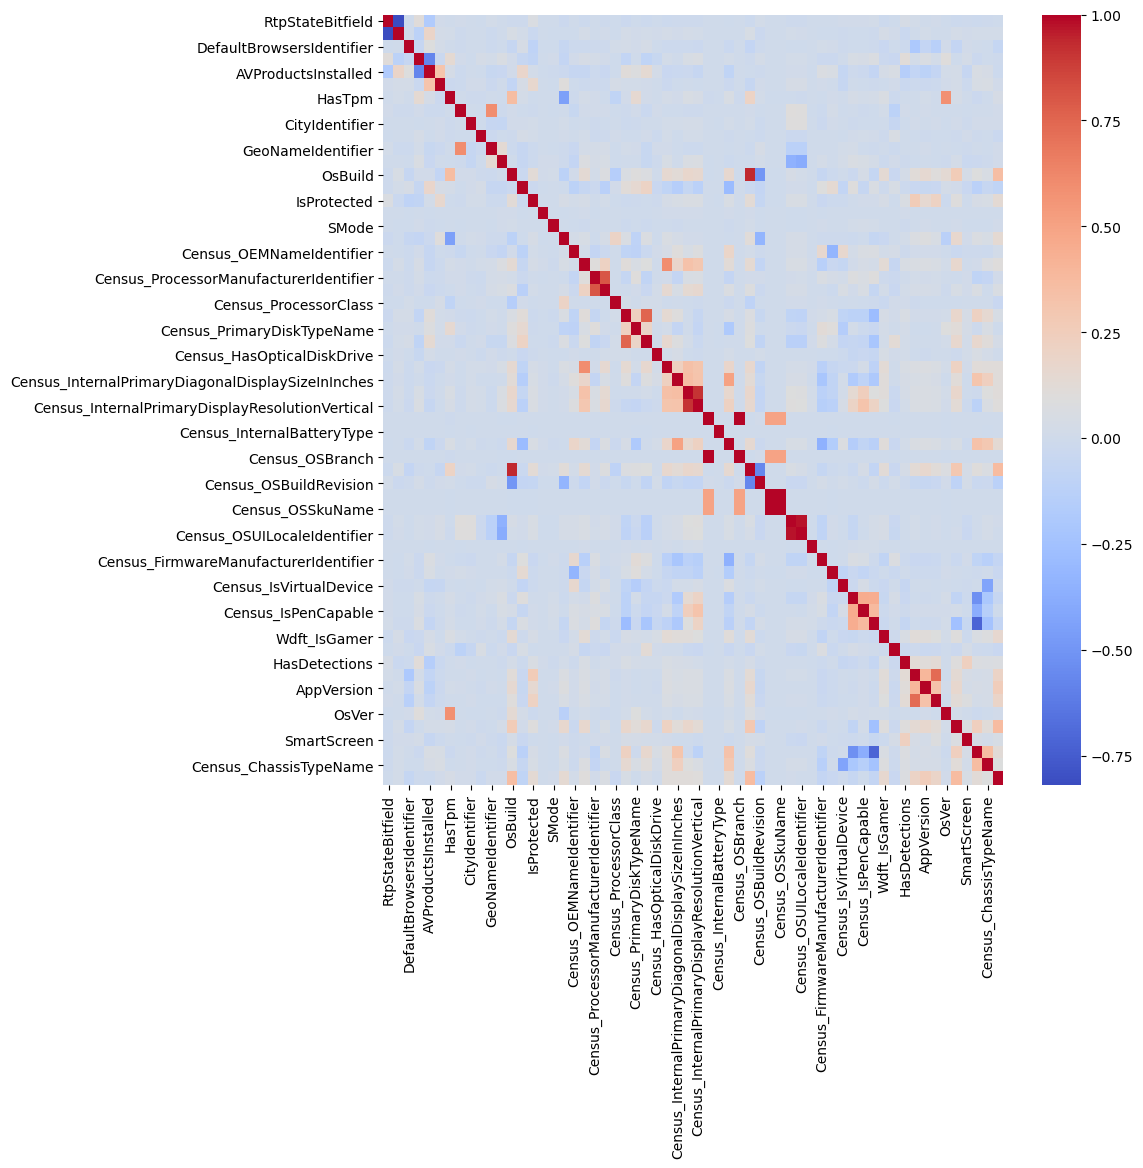

In [155]:
matriz=train.corr(method='pearson')

# Generate the Heatmap
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(matriz,cmap='coolwarm')
plt.show()

In [156]:
matriz

RtpStateBitfield  \
RtpStateBitfield                                           1.000000   
IsSxsPassiveMode                                          -0.818491   
DefaultBrowsersIdentifier                                 -0.001687   
AVProductStatesIdentifier                                  0.106290   
AVProductsInstalled                                       -0.173845   
AVProductsEnabled                                          0.009495   
HasTpm                                                     0.001156   
CountryIdentifier                                          0.012527   
CityIdentifier                                            -0.001441   
OrganizationIdentifier                                    -0.002099   
GeoNameIdentifier                                          0.016592   
LocaleEnglishNameIdentifier                               -0.000686   
OsBuild                                                   -0.013003   
OsSuite                                                   -0.010072   
IsProtected                                                0.067943   
PuaMode                                                   -0.000836   
SMode                                                      0.002900   
IeVerIdentifier                                           -0.023790   
Census_OEMNameIdentifier                                   0.004061   
Census_ProcessorCoreCount                                 -0.018099   
Census_ProcessorManufacturerIdentifier                    -0.000436   
Census_ProcessorModelIdentifier                           -0.009375   
Census_ProcessorClass                                     -0.008109   
Census_PrimaryDiskTotalCapacity                           -0.026481   
Census_PrimaryDiskTypeName                                -0.004831   
Census_SystemVolumeTotalCapacity                          -0.018835   
Census_HasOpticalDiskDrive                                -0.006677   
Census_TotalPhysicalRAM                                   -0.020401   
Census_InternalPrimaryDiagonalDisplaySizeInInches         -0.009130   
Census_InternalPrimaryDisplayResolutionHorizontal         -0.013076   
Census_InternalPrimaryDisplayResolutionVertical           -0.008851   
Census_PowerPlatformRoleName                               0.000161   
Census_InternalBatteryType                                 0.000327   
Census_InternalBatteryNumberOfCharges                     -0.002502   
Census_OSBranch                                            0.000161   
Census_OSBuildNumber                                      -0.020849   
Census_OSBuildRevision                                     0.015168   
Census_OSEdition                                           0.000326   
Census_OSSkuName                                           0.000326   
Census_OSInstallLanguageIdentifier                        -0.015393   
Census_OSUILocaleIdentifier                               -0.014860   
Census_IsFlightsDisabled                                   0.000515   
Census_FirmwareManufacturerIdentifier                      0.004558   
Census_FirmwareVersionIdentifier                           0.004225   
Census_IsVirtualDevice                                     0.009223   
Census_IsTouchEnabled                                      0.010156   
Census_IsPenCapable                                        0.006849   
Census_IsAlwaysOnAlwaysConnectedCapable                    0.019139   
Wdft_IsGamer                                              -0.017591   
Wdft_RegionIdentifier                                     -0.002775   
HasDetections                                              0.039682   
EngineVersion                                              0.014710   
AppVersion                                                 0.000911   
AvSigVersion                                               0.011684   
OsVer                                                     -0.005947   
OsBuildLab                                                -0.017670   
Smar

In [157]:
#pd.set_option('display.max_rows', None)
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(matriz, 75))

Top Absolute Correlations
Census_OSEdition                                   Census_OSSkuName                                     1.000000
Census_PowerPlatformRoleName                       Census_OSBranch                                      1.000000
Census_OSInstallLanguageIdentifier                 Census_OSUILocaleIdentifier                          0.999378
Census_InternalPrimaryDisplayResolutionHorizontal  Census_InternalPrimaryDisplayResolutionVertical      0.982202
RtpStateBitfield                                   IsSxsPassiveMode                                     0.980500
                                                                                                          ...   
DefaultBrowsersIdentifier                          EngineVersion                                        0.437964
Census_OSBuildRevision                             Census_OSVersion                                     0.435349
Census_IsPenCapable                                Census_ChassisTypeN

In [158]:
train = train.drop(columns=['Census_OSUILocaleIdentifier', 'Census_InternalPrimaryDisplayResolutionVertical', 'OsBuild', 'IsSxsPassiveMode', 'Census_PowerPlatformRoleName', 'Census_IsAlwaysOnAlwaysConnectedCapable' , 'AvSigVersion', 'Census_ProcessorManufacturerIdentifier', 'Census_OSBranch', 'Census_IsTouchEnabled', 'Census_ProcessorCoreCount', 'Census_InternalBatteryNumberOfCharges', 'Census_OSVersion', 'HasTpm', 'Census_ChassisTypeName', 'Census_OEMNameIdentifier', 'AvSigVersion' , 'Census_InternalPrimaryDisplayResolutionHorizontal'   , 'Census_OSSkuName' ])
X = X.drop(columns=['Census_OSUILocaleIdentifier', 'Census_InternalPrimaryDisplayResolutionVertical', 'OsBuild', 'IsSxsPassiveMode', 'Census_PowerPlatformRoleName', 'Census_IsAlwaysOnAlwaysConnectedCapable' , 'AvSigVersion', 'Census_ProcessorManufacturerIdentifier', 'Census_OSBranch', 'Census_IsTouchEnabled', 'Census_ProcessorCoreCount', 'Census_InternalBatteryNumberOfCharges', 'Census_OSVersion', 'HasTpm', 'Census_ChassisTypeName', 'Census_OEMNameIdentifier', 'AvSigVersion' , 'Census_InternalPrimaryDisplayResolutionHorizontal'   , 'Census_OSSkuName' ])
X

ProductName  RtpStateBitfield  DefaultBrowsersIdentifier  \
0          0.99996               7.0                        0.0   
1          0.99996               7.0                        0.0   
2          0.99996               7.0                        0.0   
3          0.99996               7.0                        0.0   
4          0.99996               7.0                        0.0   
...            ...               ...                        ...   
999995     0.99996               7.0                        0.0   
999996     0.99996               7.0                        0.0   
999997     0.99996               7.0                        0.0   
999998     0.99996               7.0                        0.0   
999999     0.99996               7.0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
0                         53447.0                  1.0                1.0   
1                         53447.0                  1.0                1.0   
2                         53447.0                  1.0                1.0   
3                         53447.0                  1.0                1.0   
4                         53447.0                  1.0                1.0   
...                           ...                  ...                ...   
999995                    53447.0                  1.0                1.0   
999996                    53447.0                  1.0                1.0   
999997                    62773.0                  1.0                1.0   
999998                    53447.0                  1.0                1.0   
999999                    53447.0                  1.0                1.0   

        CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
0                      29        128035.0                    18.0   
1                      93          1482.0                    18.0   
2                      86        153579.0                    18.0   
3                      88         20710.0                     0.0   
4                      18         37376.0                     0.0   
...                   ...             ...                     ...   
999995                214         58607.0                    50.0   
999996                153         97734.0                     0.0   
999997                 93         85408.0                    27.0   
999998                 66        109095.0                    27.0   
999999                141             0.0                    27.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
0                    35.0                          -85  1.000526  1.046166   
1                   119.0                           64  1.000526  1.046166   
2                    64.0                           49  1.000526  1.046166   
3                   117.0                          115  1.000526  1.046166   
4                   277.0                           75  1.000526  1.046166   
...                   ...                          ...       ...       ...   
999995              287.0                           75  1.000526  1.046166   
999996              193.0                           14  1.000526  1.046166   
999997              277.0                           75  1.000526  1.046166   
999998               89.0                           88  1.000526  1.046166   
999999              167.0                          -29  1.000526  1.046166   

        OsSuite OsPlatformSubRelease SkuEdition  IsProtected  PuaMode  SMode  \
0           256             1.089456   1.057954          1.0      0.0    0.0   
1           256             1.089456   1.057954          1.0      0.0    0.0   
2           768             1.089456   0.967552          1.0      0.0    0.0   
3           256             1.089456   1.057954          1.0      0.0    0.0   
4           768             1.089456   0.967552          1.0      0.0    0.0   
...         ...                

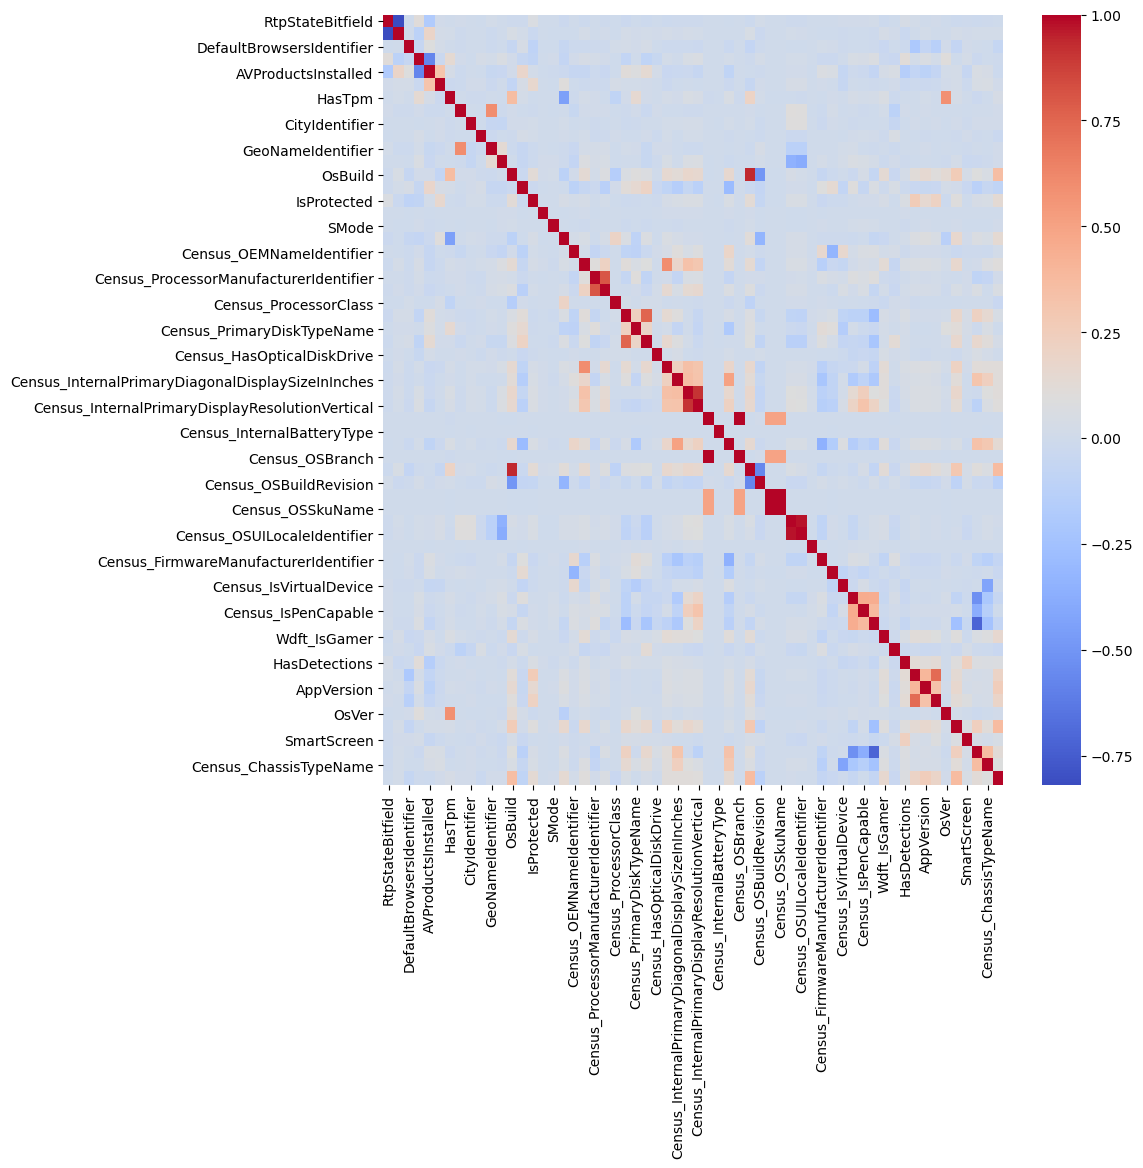

In [159]:
# matriz=train.corr(method='pearson')

# Generate the Heatmap
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(matriz,cmap='coolwarm')
plt.show()

# DBSCAN 
En base a lo aprendido en clase se utilizara DBSCAN para eliminar valores atipicos o outliers en el modelo.

# TEST AND TRAIN SPLIT


NOTA: algunos problemas de clasificación no tienen un número equilibrado de ejemplos para cada etiqueta de clase. Como tal, es deseable dividir el conjunto de datos en conjuntos de entrenamiento y prueba de una manera que conserve las mismas proporciones de ejemplos en cada clase que se observan en el conjunto de datos original, utilizando estratificar

In [160]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y, stratify=y, test_size=0.35,random_state=123)

training_base=pd.concat([X_train,y_train],axis=1)

print(training_base['HasDetections'].mean())

0.49981230769230767


In [161]:
X_train

ProductName  RtpStateBitfield  DefaultBrowsersIdentifier  \
311138     0.99996               7.0                        0.0   
385999     0.99996               7.0                        0.0   
663286     0.99996               7.0                        0.0   
838948     0.99996               7.0                        0.0   
535766     0.99996               7.0                        0.0   
...            ...               ...                        ...   
169596     0.99996               7.0                        0.0   
620534     0.99996               7.0                        0.0   
813211     0.99996               7.0                        0.0   
784608     0.99996               7.0                        0.0   
268451     0.99996               7.0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
311138                    68585.0                  2.0                1.0   
385999                    53447.0                  1.0                1.0   
663286                    43927.0                  2.0                1.0   
838948                    47238.0                  2.0                1.0   
535766                    53447.0                  1.0                1.0   
...                           ...                  ...                ...   
169596                    52676.0                  2.0                2.0   
620534                    53447.0                  1.0                1.0   
813211                    53447.0                  1.0                1.0   
784608                    53447.0                  1.0                1.0   
268451                    53447.0                  1.0                1.0   

        CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
311138                 43        146833.0                    27.0   
385999                107        133897.0                    18.0   
663286                155         82373.0                     0.0   
838948                107             0.0                     0.0   
535766                203        143726.0                    18.0   
...                   ...             ...                     ...   
169596                101        147739.0                    18.0   
620534                141         69053.0                    27.0   
813211                 91         52242.0                     0.0   
784608                 30         99345.0                    27.0   
268451                 70         11731.0                     0.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
311138               53.0                           42  1.000526  1.046166   
385999              138.0                         -122  1.000526  1.046166   
663286              201.0                          -25  1.000526  1.046166   
838948              138.0                         -122  1.000526  1.046166   
535766              255.0                           46  1.000526  1.046166   
...                   ...                          ...       ...       ...   
169596              129.0                          126  1.000526  1.046166   
620534              277.0                           75  1.000526  1.046166   
813211              125.0                          113  1.000526  1.046166   
784608              277.0                           75  1.000526  1.046166   
268451              211.0                          -74  1.000526  1.046166   

        OsSuite OsPlatformSubRelease SkuEdition  IsProtected  PuaMode  SMode  \
311138      256             1.089456   1.057954          1.0      0.0    0.0   
385999      256             1.089456   1.057954          1.0      0.0    0.0   
663286      768             1.089456   0.967552          1.0      0.0    0.0   
838948      256             0.965466   1.057954          1.0      0.0    0.0   
535766      768             1.089456   0.967552          1.0      0.0    0.0   
...         ...                

## FINDING OUTLIERS 

In [162]:
data=pd.concat([X_train,y_train],axis=1)

In [163]:
desc_df = data.describe()
desc_df

RtpStateBitfield  DefaultBrowsersIdentifier  AVProductStatesIdentifier  \
count          650000.0                   650000.0              650000.000000   
mean                NaN                        NaN               47567.621094   
std                 0.0                        NaN               14296.024414   
min                 0.0                        0.0                   0.000000   
25%                 7.0                        0.0               49480.000000   
50%                 7.0                        0.0               53447.000000   
75%                 7.0                        0.0               53447.000000   
max                 8.0                     3204.0               70492.000000   

       AVProductsInstalled  AVProductsEnabled  CountryIdentifier  \
count             650000.0           650000.0      650000.000000   
mean                   NaN                NaN         108.038466   
std                    0.0                0.0          63.010970   
min                    0.0                0.0           1.000000   
25%                    1.0                1.0          51.000000   
50%                    1.0                1.0          97.000000   
75%                    2.0                1.0         162.000000   
max                    5.0                4.0         222.000000   

       CityIdentifier  OrganizationIdentifier  GeoNameIdentifier  \
count   650000.000000                650000.0           650000.0   
mean     78238.062500                     NaN                NaN   
std      50411.683594                     0.0                NaN   
min          0.000000                     0.0                0.0   
25%      31200.000000                     0.0               89.0   
50%      77866.000000                    18.0              181.0   
75%     121270.000000                    27.0              267.0   
max     167962.000000                    52.0              296.0   

       LocaleEnglishNameIdentifier        OsSuite  IsProtected        PuaMode  \
count                650000.000000  650000.000000     650000.0  650000.000000   
mean                     27.827583     575.324375          NaN       0.000943   
std                      65.616616     248.042947          0.0       0.056327   
min                    -127.000000      16.000000          0.0       0.000000   
25%                     -29.000000     256.000000          1.0       0.000000   
50%                      58.000000     768.000000          1.0       0.000000   
75%                      75.000000     768.000000          1.0       0.000000   
max                     127.000000     784.000000          1.0       3.366667   

               SMode  IeVerIdentifier  Census_ProcessorModelIdentifier  \
count  650000.000000         650000.0                         650000.0   
mean        0.000403              NaN                              NaN   
std         0.020065              NaN                              NaN   
min         0.000000              0.0                              0.0   
25%         0.000000            108.0                           1998.0   
50%         0.000000            117.0                           2498.0   
75%         0.000000            137.0                           2868.0   
max         1.000000            429.0                           4480.0   

       Census_ProcessorClass  Census_PrimaryDiskTotalCapacity  \
count          650000.000000                     6.500000e+05   
mean                0.004955                     5.095714e+05   
std                 0.078406                     3.702035e+05   
min                 0.000000                     0.000000e+00   
25%                 0.000000                     2.384750e+05   
50%                 0.000000                     4.769400e+05   
75%                 0.000000                     9.538690e+05   
max                 1.509091                     6.867302e+07   

       Census_PrimaryDiskTypeName  Census_SystemVolumeTotalCapacity 

In [164]:
# finding the inter-quartile range for each column

intqtl_range = {col: desc_df[col].loc['75%'] - desc_df[col].loc['25%'] for col in desc_df.columns}

# Finding the upper and lower bound for each column

upper_bound = {col : desc_df[col].loc['75%'] + (intqtl_range[col]*1.5) for col in desc_df.columns}
lower_bound = {col : desc_df[col].loc['25%'] - (intqtl_range[col]*1.5) for col in desc_df.columns}

# Getting the number of instances with outliers for each column 
outlier_count = {col : len(data[(data[col]>upper_bound[col])|(data[col]<lower_bound[col])].index) for col in desc_df.columns}

In [165]:
outlier = pd.DataFrame(np.array(list(outlier_count.items())),columns=['column','no_of_outliers'])
total = data.shape[0]
outlier['no_of_outliers'] = outlier['no_of_outliers'].apply(lambda val: int(val))
outlier['percentage_of_outliers'] = outlier['no_of_outliers'].apply(lambda val: (val/total)*100)

In [166]:
first_20_outlier = outlier.sort_values('percentage_of_outliers',ascending=False).head(20)
first_20_outlier

column  no_of_outliers  \
2                           AVProductStatesIdentifier          139734   
25                             Census_OSBuildRevision           93671   
39                                        SmartScreen           86435   
15                    Census_ProcessorModelIdentifier           75025   
22  Census_InternalPrimaryDiagonalDisplaySizeInInches           72190   
38                                         OsBuildLab           66198   
24                               Census_OSBuildNumber           62968   
35                                      EngineVersion           62824   
20                         Census_HasOpticalDiskDrive           50116   
18                         Census_PrimaryDiskTypeName           47148   
14                                    IeVerIdentifier           44962   
21                            Census_TotalPhysicalRAM           44846   
11                                        IsProtected           37814   
36                                         AppVersion           36783   
40                              Census_MDC2FormFactor           34735   
1                           DefaultBrowsersIdentifier           31376   
32                                Census_IsPenCapable           24737   
37                                              OsVer           21062   
0                                    RtpStateBitfield           19699   
4                                   AVProductsEnabled           19640   

    percentage_of_outliers  
2                21.497538  
25               14.410923  
39               13.297692  
15               11.542308  
22               11.106154  
38               10.184308  
24                9.687385  
35                9.665231  
20                7.710154  
18                7.253538  
14                6.917231  
21                6.899385  
11                5.817538  
36                5.658923  
40                5.343846  
1                 4.827077  
32                3.805692  
37                3.240308  
0                 3.030615  
4                 3.021538

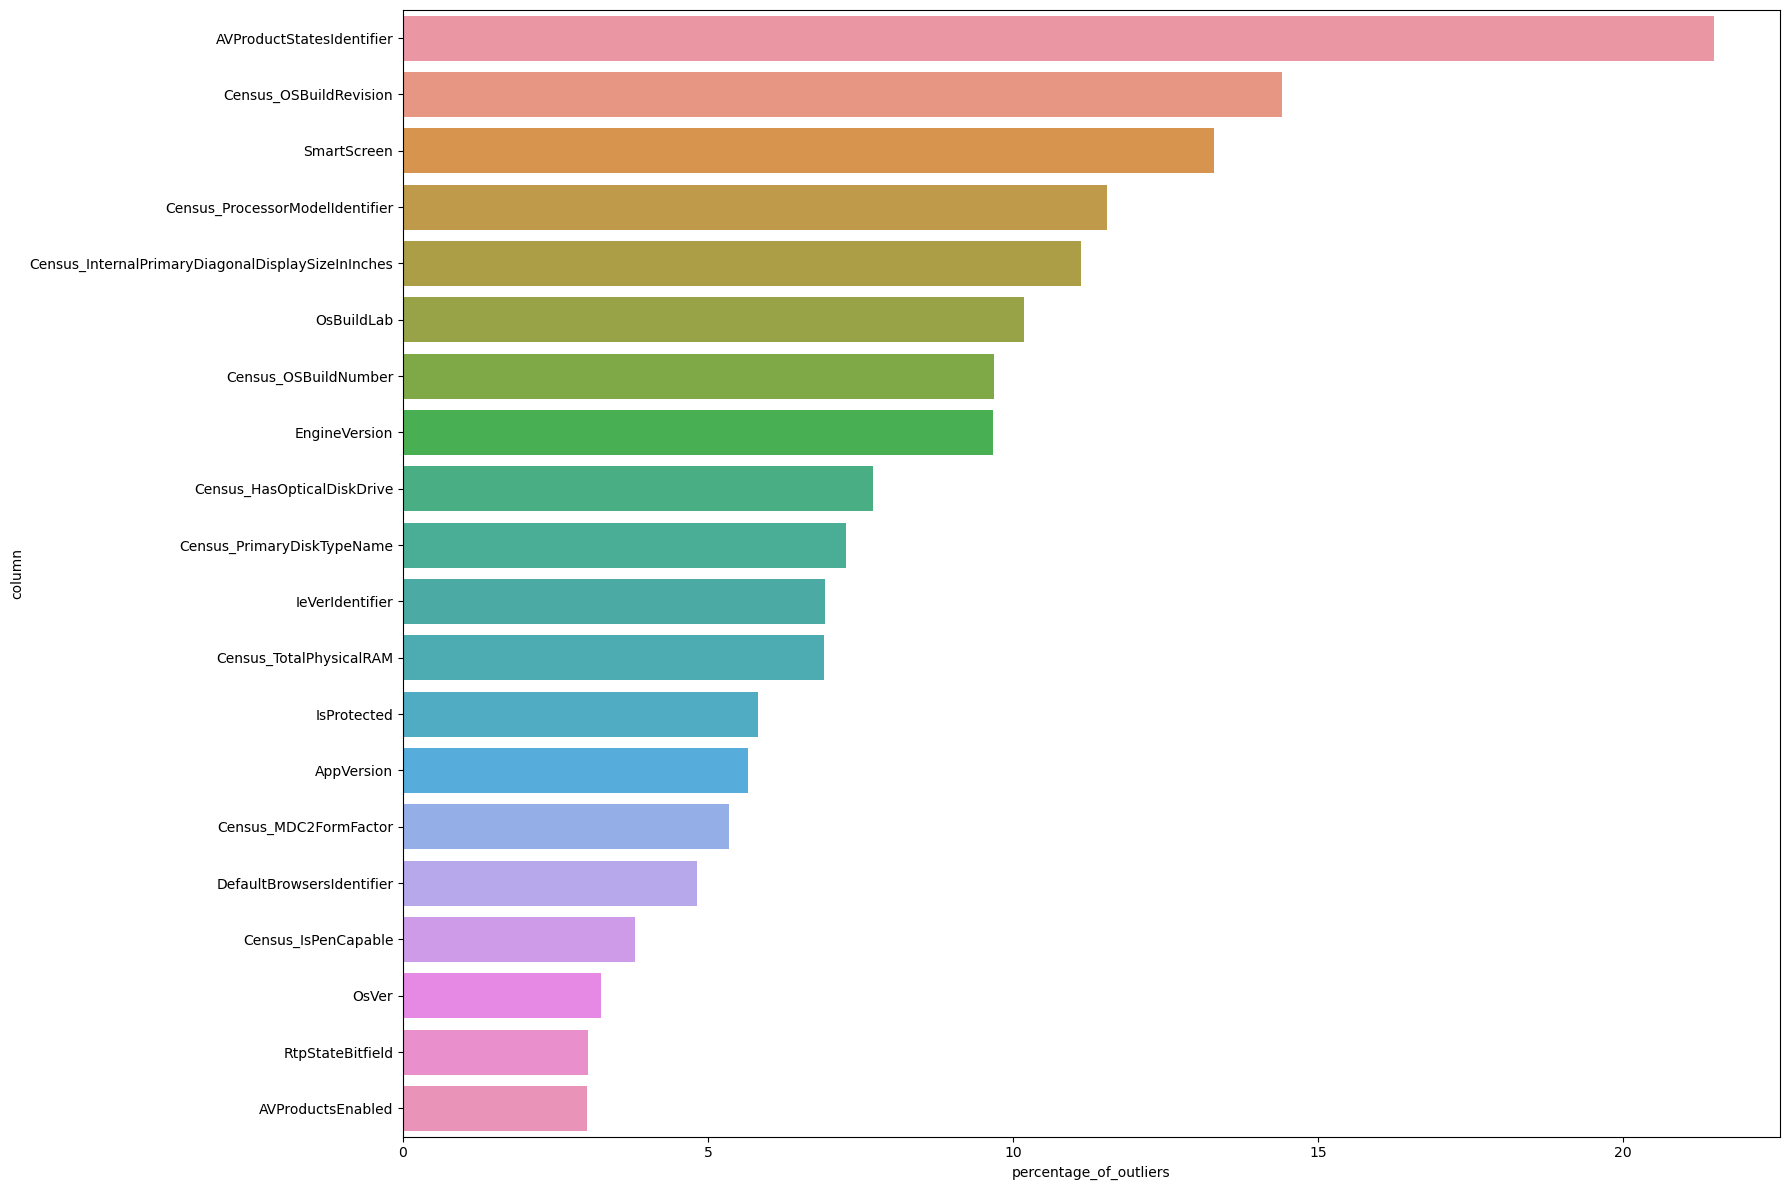

In [167]:
plt.figure(figsize=(18,12))
sns.barplot(first_20_outlier.percentage_of_outliers,first_20_outlier.column, orient='h')
plt.tight_layout()

<AxesSubplot:xlabel='percentage_of_outliers', ylabel='Density'>

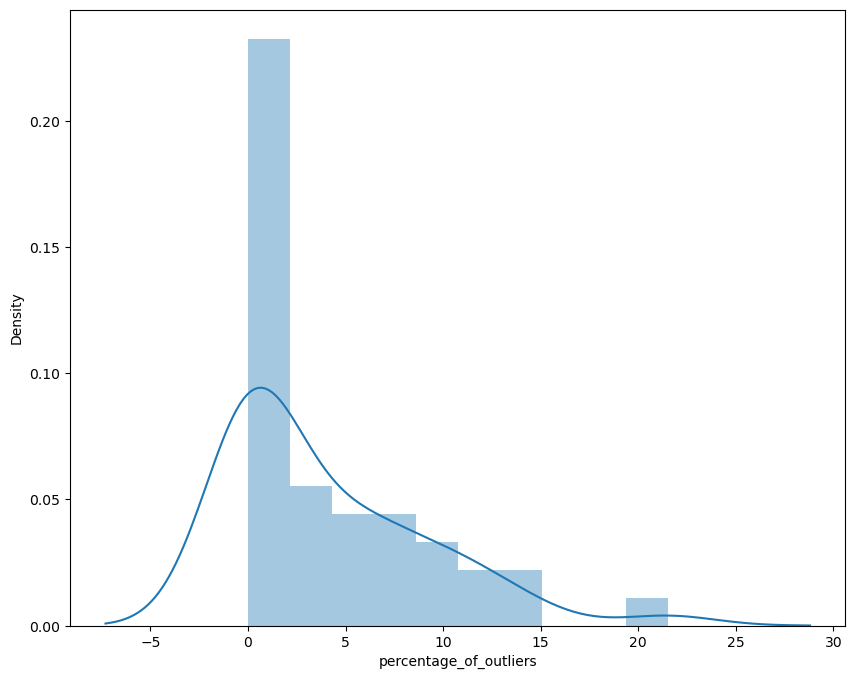

In [168]:
plt.figure(figsize=(10,8))
sns.distplot(outlier.percentage_of_outliers,bins=10)

In [169]:
data = data.loc[(X_train["AVProductStatesIdentifier"]<upper_bound["AVProductStatesIdentifier"]) & (X_train["AVProductStatesIdentifier"]>lower_bound["AVProductStatesIdentifier"])]
data = data.loc[(X_train["Census_ProcessorModelIdentifier"]<upper_bound["Census_ProcessorModelIdentifier"]) & (X_train["Census_ProcessorModelIdentifier"]>lower_bound["Census_ProcessorModelIdentifier"])]
data = data.loc[(X_train["SmartScreen"]<upper_bound["SmartScreen"]) & (X_train["SmartScreen"]>lower_bound["SmartScreen"])]
data = data.loc[(X_train["Census_InternalPrimaryDiagonalDisplaySizeInInches"]<upper_bound["Census_InternalPrimaryDiagonalDisplaySizeInInches"]) & (X_train["Census_InternalPrimaryDiagonalDisplaySizeInInches"]>lower_bound["Census_InternalPrimaryDiagonalDisplaySizeInInches"])]
data = data.loc[(X_train["OsBuildLab"]<upper_bound["OsBuildLab"]) & (X_train["OsBuildLab"]>lower_bound["OsBuildLab"])]
data = data.loc[(X_train["Census_OSBuildRevision"]<upper_bound["Census_OSBuildRevision"]) & (X_train["Census_OSBuildRevision"]>lower_bound["Census_OSBuildRevision"])]
data = data.loc[(X_train["Census_TotalPhysicalRAM"]<upper_bound["Census_TotalPhysicalRAM"]) & (X_train["Census_TotalPhysicalRAM"]>lower_bound["Census_TotalPhysicalRAM"])]
#data = data.loc[(X_train["Census_GenuineStateName"]<upper_bound["Census_GenuineStateName"]) & (X_train["Census_GenuineStateName"]>lower_bound["Census_GenuineStateName"])]
#outlier_count = {col : len(X_train[(X_train[col]>upper_bound[col])|(X_train[col]<lower_bound[col])].index) for col in desc_df.columns}

In [170]:
# finding the inter-quartile range for each column

intqtl_range = {col: desc_df[col].loc['75%'] - desc_df[col].loc['25%'] for col in desc_df.columns}

# Finding the upper and lower bound for each column

upper_bound = {col : desc_df[col].loc['75%'] + (intqtl_range[col]*1.5) for col in desc_df.columns}
lower_bound = {col : desc_df[col].loc['25%'] - (intqtl_range[col]*1.5) for col in desc_df.columns}

# Getting the number of instances with outliers for each column 
outlier_count = {col : len(data[(data[col]>upper_bound[col])|(data[col]<lower_bound[col])].index) for col in desc_df.columns}

In [171]:
outlier = pd.DataFrame(np.array(list(outlier_count.items())),columns=['column','no_of_outliers'])
total = data.shape[0]
outlier['no_of_outliers'] = outlier['no_of_outliers'].apply(lambda val: int(val))
outlier['percentage_of_outliers'] = outlier['no_of_outliers'].apply(lambda val: (val/total)*100)

In [172]:
first_20_outlier = outlier.sort_values('no_of_outliers',ascending=False).head(20)
first_20_outlier

column  no_of_outliers  percentage_of_outliers
20          Census_HasOpticalDiskDrive           15481                6.266419
35                       EngineVersion           15293                6.190320
32                 Census_IsPenCapable           13221                5.351613
36                          AppVersion           12231                4.950880
40               Census_MDC2FormFactor           11418                4.621793
18          Census_PrimaryDiskTypeName           10622                4.299587
24                Census_OSBuildNumber            9831                3.979405
1            DefaultBrowsersIdentifier            8082                3.271442
27  Census_OSInstallLanguageIdentifier            6538                2.646460
14                     IeVerIdentifier            6135                2.483333
37                               OsVer            4450                1.801277
0                     RtpStateBitfield            4427                1.791967
4                    AVProductsEnabled            3065                1.240655
31              Census_IsVirtualDevice            2018                0.816849
19    Census_SystemVolumeTotalCapacity            1438                0.582075
16               Census_ProcessorClass             646                0.261489
11                         IsProtected             549                0.222225
26                    Census_OSEdition             342                0.138435
13                               SMode             226                0.091481
17     Census_PrimaryDiskTotalCapacity              70                0.028335

In [173]:
data

ProductName  RtpStateBitfield  DefaultBrowsersIdentifier  \
385999     0.99996               7.0                        0.0   
663286     0.99996               7.0                        0.0   
535766     0.99996               7.0                        0.0   
504534     0.99996               7.0                        0.0   
503660     0.99996               7.0                        0.0   
...            ...               ...                        ...   
277186     0.99996               7.0                        0.0   
31314      0.99996               7.0                        0.0   
169596     0.99996               7.0                        0.0   
620534     0.99996               7.0                        0.0   
268451     0.99996               7.0                        0.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
385999                    53447.0                  1.0                1.0   
663286                    43927.0                  2.0                1.0   
535766                    53447.0                  1.0                1.0   
504534                    53447.0                  1.0                1.0   
503660                    46413.0                  2.0                1.0   
...                           ...                  ...                ...   
277186                    53447.0                  1.0                1.0   
31314                     53447.0                  1.0                1.0   
169596                    52676.0                  2.0                2.0   
620534                    53447.0                  1.0                1.0   
268451                    53447.0                  1.0                1.0   

        CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
385999                107        133897.0                    18.0   
663286                155         82373.0                     0.0   
535766                203        143726.0                    18.0   
504534                169         88086.0                    37.0   
503660                207        110364.0                    27.0   
...                   ...             ...                     ...   
277186                  6         40336.0                     0.0   
31314                 122        117858.0                    27.0   
169596                101        147739.0                    18.0   
620534                141         69053.0                    27.0   
268451                 70         11731.0                     0.0   

        GeoNameIdentifier  LocaleEnglishNameIdentifier  Platform Processor  \
385999              138.0                         -122  1.000526  1.046166   
663286              201.0                          -25  1.000526  1.046166   
535766              255.0                           46  1.000526  1.046166   
504534              209.0                          -77  1.000526  1.046166   
503660              277.0                           75  1.000526  1.046166   
...                   ...                          ...       ...       ...   
277186              277.0                           75  1.000526  1.046166   
31314                89.0                           88  1.000526  1.046166   
169596              129.0                          126  1.000526  1.046166   
620534              277.0                           75  1.000526  1.046166   
268451              211.0                          -74  1.000526  1.046166   

        OsSuite OsPlatformSubRelease SkuEdition  IsProtected  PuaMode  SMode  \
385999      256             1.089456   1.057954          1.0      0.0    0.0   
663286      768             1.089456   0.967552          1.0      0.0    0.0   
535766      768             1.089456   0.967552          1.0      0.0    0.0   
504534      256             1.089456   1.057954          1.0      0.0    0.0   
503660      768             0.965466   0.967552          1.0      0.0    0.0   
...         ...                

In [174]:
X_test.columns

Index(['ProductName', 'RtpStateBitfield', 'DefaultBrowsersIdentifier',
       'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform',
       'Processor', 'OsSuite', 'OsPlatformSubRelease', 'SkuEdition',
       'IsProtected', 'PuaMode', 'SMode', 'IeVerIdentifier',
       'Census_DeviceFamily', 'Census_ProcessorModelIdentifier',
       'Census_ProcessorClass', 'Census_PrimaryDiskTotalCapacity',
       'Census_PrimaryDiskTypeName', 'Census_SystemVolumeTotalCapacity',
       'Census_HasOpticalDiskDrive', 'Census_TotalPhysicalRAM',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalBatteryType', 'Census_OSArchitecture',
       'Census_OSBuildNumber', 'Census_OSBuildRevision', 'Census_OSEdition',
       'Census_OSInstallTypeName', 'Census_OSInstallLanguageIdentifier',
       'Census_OSWUAutoUpdateOption

In [175]:
y, X = train['HasDetections'], train[['Census_OSBuildNumber' , 'Census_IsPenCapable' , 'Census_OSBuildRevision','ProductName', 'Census_PrimaryDiskTotalCapacity', 'GeoNameIdentifier', 'RtpStateBitfield', 'DefaultBrowsersIdentifier',
       'AVProductStatesIdentifier', 'AVProductsEnabled', 'CountryIdentifier',
       'CityIdentifier', 'OrganizationIdentifier',
       'LocaleEnglishNameIdentifier', 'Platform', 'Processor', 'OsSuite',
       'OsPlatformSubRelease', 'SkuEdition', 'IsProtected', 'PuaMode', 'SMode',
       'IeVerIdentifier', 'Census_DeviceFamily',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTypeName', 'Census_SystemVolumeTotalCapacity',
       'Census_HasOpticalDiskDrive', 'Census_TotalPhysicalRAM', 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalBatteryType', 'Census_OSArchitecture',
       'Census_OSEdition', 'Census_OSInstallTypeName',
       'Census_OSInstallLanguageIdentifier',
       'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName',
       'Census_ActivationChannel', 'Census_IsFlightsDisabled',
       'Census_FlightRing', 'Census_FirmwareManufacturerIdentifier',
       'Census_FirmwareVersionIdentifier', 'Census_IsVirtualDevice',
       'Wdft_IsGamer', 'Wdft_RegionIdentifier', 'EngineVersion', 'AppVersion',
       'OsVer', 'OsBuildLab', 'SmartScreen', 'Census_MDC2FormFactor', 'AVProductsInstalled']]

In [176]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y, stratify=y, test_size=0.35,random_state=123)

training_base=pd.concat([X_train,y_train],axis=1)

print(training_base['HasDetections'].mean())

0.49981230769230767


In [177]:
X_train

Census_OSBuildNumber  Census_IsPenCapable  Census_OSBuildRevision  \
311138                 17134                    0                     228   
385999                 17134                    0                     167   
663286                 17134                    0                     228   
838948                 16299                    0                      64   
535766                 17134                    0                     286   
...                      ...                  ...                     ...   
169596                 17134                    0                     228   
620534                 17134                    0                     112   
813211                 17134                    0                     228   
784608                 17134                    0                     228   
268451                 17134                    0                     165   

       ProductName  Census_PrimaryDiskTotalCapacity  GeoNameIdentifier  \
311138     0.99996                         114473.0               53.0   
385999     0.99996                         122104.0              138.0   
663286     0.99996                         953869.0              201.0   
838948     0.99996                              0.0              138.0   
535766     0.99996                         244198.0              255.0   
...            ...                              ...                ...   
169596     0.99996                         244198.0              129.0   
620534     0.99996                         476940.0              277.0   
813211     0.99996                         476940.0              125.0   
784608     0.99996                         476940.0              277.0   
268451     0.99996                         953869.0              211.0   

        RtpStateBitfield  DefaultBrowsersIdentifier  \
311138               7.0                        0.0   
385999               7.0                        0.0   
663286               7.0                        0.0   
838948               7.0                        0.0   
535766               7.0                        0.0   
...                  ...                        ...   
169596               7.0                        0.0   
620534               7.0                        0.0   
813211               7.0                        0.0   
784608               7.0                        0.0   
268451               7.0                        0.0   

        AVProductStatesIdentifier  AVProductsEnabled  CountryIdentifier  \
311138                    68585.0                1.0                 43   
385999                    53447.0                1.0                107   
663286                    43927.0                1.0                155   
838948                    47238.0                1.0                107   
535766                    53447.0                1.0                203   
...                           ...                ...                ...   
169596                    52676.0                2.0                101   
620534                    53447.0                1.0                141   
813211                    53447.0                1.0                 91   
784608                    53447.0                1.0                 30   
268451                    53447.0                1.0                 70   

        CityIdentifier  OrganizationIdentifier  LocaleEnglishNameIdentifier  \
311138        146833.0                    27.0                           42   
385999        133897.0                    18.0                         -122   
663286         82373.0                     0.0                          -25   
838948             0.0                     0.0                         -122   
535766        143726.0                    18.0                           46   
...                ...                     ...                          ...   
169596        147739.0                    18.0                          126   


# Logistic Regression: 

Es un método de regresión que permite estimar la probabilidad de una variable cualitativa binaria en función de una variable cuantitativa. Una de las principales aplicaciones de la regresión logística es la clasificación binaria, en la que las observaciones se clasifican en un grupo u otro en función del valor de la variable utilizada como predictor.

El intercepto (a menudo llamado constante) es el valor medio esperado de Y cuando todo X = 0.

In [178]:
# X_train = X_train.astype(np.float64)
import statsmodels.api as sm

model_without_intercept=sm.Logit(y_train,X_train).fit(method='newton')
print(model_without_intercept.summary())

         Current function value: 0.636831
         Iterations: 35


c:\users\dewit\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          HasDetections   No. Observations:               650000
Model:                          Logit   Df Residuals:                   649947
Method:                           MLE   Df Model:                           52
Date:                Tue, 13 Sep 2022   Pseudo R-squ.:                 0.08125
Time:                        17:40:37   Log-Likelihood:            -4.1394e+05
converged:                      False   LL-Null:                   -4.5055e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Census_OSBuildNumber                              -1.987e-05   2.43e-06     -8.180      0.000   -2.46e-05   -1.51e-05
Census_IsPenCa

In [179]:
X1_train = sm.add_constant(X_train)

modelo_with_intercept=sm.Logit(y_train,X1_train).fit(method='newton')
print(modelo_with_intercept.summary())

         Current function value: 0.636794
         Iterations: 35


c:\users\dewit\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          HasDetections   No. Observations:               650000
Model:                          Logit   Df Residuals:                   649946
Method:                           MLE   Df Model:                           53
Date:                Tue, 13 Sep 2022   Pseudo R-squ.:                 0.08130
Time:                        17:40:52   Log-Likelihood:            -4.1392e+05
converged:                      False   LL-Null:                   -4.5055e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -8.7080      1.473     -5.912      0.000     -11.595      -5.821
Census_OSBuild

In [180]:
print(model_without_intercept.summary2())

                                                 Results: Logit
Model:                               Logit                           Pseudo R-squared:                0.081      
Dependent Variable:                  HasDetections                   AIC:                             827985.9321
Date:                                2022-09-13 17:40                BIC:                             828589.3227
No. Observations:                    650000                          Log-Likelihood:                  -4.1394e+05
Df Model:                            52                              LL-Null:                         -4.5055e+05
Df Residuals:                        649947                          LLR p-value:                     0.0000     
Converged:                           0.0000                          Scale:                           1.0000     
No. Iterations:                      35.0000                                                                     
------------------------

In [181]:
print(modelo_with_intercept.summary2())

                                                 Results: Logit
Model:                               Logit                           Pseudo R-squared:                0.081      
Dependent Variable:                  HasDetections                   AIC:                             827940.1124
Date:                                2022-09-13 17:40                BIC:                             828554.8877
No. Observations:                    650000                          Log-Likelihood:                  -4.1392e+05
Df Model:                            53                              LL-Null:                         -4.5055e+05
Df Residuals:                        649946                          LLR p-value:                     0.0000     
Converged:                           0.0000                          Scale:                           1.0000     
No. Iterations:                      35.0000                                                                     
------------------------

In [182]:
X_train = X_train.drop(columns=['Census_OSBuildRevision', 'Census_SystemVolumeTotalCapacity' ,'IeVerIdentifier', 'Census_FirmwareManufacturerIdentifier'  , 'GeoNameIdentifier', 'OrganizationIdentifier', 'ProductName' , 'Processor'  , 'CountryIdentifier', 'CityIdentifier', 'LocaleEnglishNameIdentifier','Census_OSArchitecture', 'Census_IsFlightsDisabled', 'Census_FirmwareVersionIdentifier'])
X_train

Census_OSBuildNumber  Census_IsPenCapable  \
311138                 17134                    0   
385999                 17134                    0   
663286                 17134                    0   
838948                 16299                    0   
535766                 17134                    0   
...                      ...                  ...   
169596                 17134                    0   
620534                 17134                    0   
813211                 17134                    0   
784608                 17134                    0   
268451                 17134                    0   

        Census_PrimaryDiskTotalCapacity  RtpStateBitfield  \
311138                         114473.0               7.0   
385999                         122104.0               7.0   
663286                         953869.0               7.0   
838948                              0.0               7.0   
535766                         244198.0               7.0   
...                                 ...               ...   
169596                         244198.0               7.0   
620534                         476940.0               7.0   
813211                         476940.0               7.0   
784608                         476940.0               7.0   
268451                         953869.0               7.0   

        DefaultBrowsersIdentifier  AVProductStatesIdentifier  \
311138                        0.0                    68585.0   
385999                        0.0                    53447.0   
663286                        0.0                    43927.0   
838948                        0.0                    47238.0   
535766                        0.0                    53447.0   
...                           ...                        ...   
169596                        0.0                    52676.0   
620534                        0.0                    53447.0   
813211                        0.0                    53447.0   
784608                        0.0                    53447.0   
268451                        0.0                    53447.0   

        AVProductsEnabled  Platform  OsSuite OsPlatformSubRelease SkuEdition  \
311138                1.0  1.000526      256             1.089456   1.057954   
385999                1.0  1.000526      256             1.089456   1.057954   
663286                1.0  1.000526      768             1.089456   0.967552   
838948                1.0  1.000526      256             0.965466   1.057954   
535766                1.0  1.000526      768             1.089456   0.967552   
...                   ...       ...      ...                  ...        ...   
169596                2.0  1.000526      256             1.089456   1.057954   
620534                1.0  1.000526      256             1.089456   1.057954   
813211                1.0  1.000526      256             1.089456   1.057954   
784608                1.0  1.000526      768             1.089456   0.967552   
268451                1.0  1.000526      256             1.089456   1.057954   

        IsProtected  PuaMode  SMode Census_DeviceFamily  \
311138          1.0      0.0    0.0             1.00024   
385999          1.0      0.0    0.0             1.00024   
663286          1.0      0.0    0.0             1.00024   
838948          1.0      0.0    0.0             1.00024   
535766          1.0      0.0    0.0             1.00024   
...             ...      ...    ...                 ...   
169596          1.0      0.0    0.0             1.00024   
620534          1.0      0.0    0.0             1.00024   
813211          1.0      0.0    0.0             1.00024   
784608          1.0      0.0    0.0             1.00024   
268451          1.0      0.0    0.0             1.00024   

        Census_ProcessorModelIdentifier  Census_ProcessorClass  \
311138                           2616.0                    0.0   
385999                           2944.0                    0.0   
6

In [183]:
X1_train = X1_train.drop(columns=[ 'CityIdentifier', 'OrganizationIdentifier', 'LocaleEnglishNameIdentifier', 'Platform' , 'Processor' , 'SkuEdition', 'Census_DeviceFamily' , 'Census_SystemVolumeTotalCapacity' ,  'Census_OSArchitecture', 'Census_OSWUAutoUpdateOptionsName', 'Census_IsFlightsDisabled', 'Census_FirmwareVersionIdentifier', 'OsVer' ])
X1_train

const  Census_OSBuildNumber  Census_IsPenCapable  \
311138    1.0                 17134                    0   
385999    1.0                 17134                    0   
663286    1.0                 17134                    0   
838948    1.0                 16299                    0   
535766    1.0                 17134                    0   
...       ...                   ...                  ...   
169596    1.0                 17134                    0   
620534    1.0                 17134                    0   
813211    1.0                 17134                    0   
784608    1.0                 17134                    0   
268451    1.0                 17134                    0   

        Census_OSBuildRevision ProductName  Census_PrimaryDiskTotalCapacity  \
311138                     228     0.99996                         114473.0   
385999                     167     0.99996                         122104.0   
663286                     228     0.99996                         953869.0   
838948                      64     0.99996                              0.0   
535766                     286     0.99996                         244198.0   
...                        ...         ...                              ...   
169596                     228     0.99996                         244198.0   
620534                     112     0.99996                         476940.0   
813211                     228     0.99996                         476940.0   
784608                     228     0.99996                         476940.0   
268451                     165     0.99996                         953869.0   

        GeoNameIdentifier  RtpStateBitfield  DefaultBrowsersIdentifier  \
311138               53.0               7.0                        0.0   
385999              138.0               7.0                        0.0   
663286              201.0               7.0                        0.0   
838948              138.0               7.0                        0.0   
535766              255.0               7.0                        0.0   
...                   ...               ...                        ...   
169596              129.0               7.0                        0.0   
620534              277.0               7.0                        0.0   
813211              125.0               7.0                        0.0   
784608              277.0               7.0                        0.0   
268451              211.0               7.0                        0.0   

        AVProductStatesIdentifier  AVProductsEnabled  CountryIdentifier  \
311138                    68585.0                1.0                 43   
385999                    53447.0                1.0                107   
663286                    43927.0                1.0                155   
838948                    47238.0                1.0                107   
535766                    53447.0                1.0                203   
...                           ...                ...                ...   
169596                    52676.0                2.0                101   
620534                    53447.0                1.0                141   
813211                    53447.0                1.0                 91   
784608                    53447.0                1.0                 30   
268451                    53447.0                1.0                 70   

        OsSuite OsPlatformSubRelease  IsProtected  PuaMode  SMode  \
311138      256             1.089456          1.0      0.0    0.0   
385999      256             1.089456          1.0      0.0    0.0   
663286      768             1.089456          1.0      0.0    0.0   
838948      256             0.965466          1.0      0.0    0.0   
535766      768             1.089456          1.0      0.0    0.0   
...         ...                  ...          ...      ...    ...   
169596      256             1.089456          1.0      0.0    0.0

# PROBAR CON VARIABLES ELIMINADAS

In [184]:
import statsmodels.api as sm

model_without_intercept=sm.Logit(y_train,X_train).fit(method='newton')
print(model_without_intercept.summary())

Optimization terminated successfully.
         Current function value: 0.637253
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:          HasDetections   No. Observations:               650000
Model:                          Logit   Df Residuals:                   649961
Method:                           MLE   Df Model:                           38
Date:                Tue, 13 Sep 2022   Pseudo R-squ.:                 0.08064
Time:                        17:40:59   Log-Likelihood:            -4.1421e+05
converged:                       True   LL-Null:                   -4.5055e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Census_OSBuildNumber         

In [185]:
X1_train = sm.add_constant(X_train)

modelo_with_intercept=sm.Logit(y_train,X1_train).fit(method='newton')
print(modelo_with_intercept.summary())

Optimization terminated successfully.
         Current function value: 0.637217
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:          HasDetections   No. Observations:               650000
Model:                          Logit   Df Residuals:                   649960
Method:                           MLE   Df Model:                           39
Date:                Tue, 13 Sep 2022   Pseudo R-squ.:                 0.08069
Time:                        17:41:05   Log-Likelihood:            -4.1419e+05
converged:                       True   LL-Null:                   -4.5055e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                        

In [186]:
print(model_without_intercept.summary2())

                                           Results: Logit
Model:                           Logit                       Pseudo R-squared:            0.081      
Dependent Variable:              HasDetections               AIC:                         828507.1683
Date:                            2022-09-13 17:41            BIC:                         828951.1727
No. Observations:                650000                      Log-Likelihood:              -4.1421e+05
Df Model:                        38                          LL-Null:                     -4.5055e+05
Df Residuals:                    649961                      LLR p-value:                 0.0000     
Converged:                       1.0000                      Scale:                       1.0000     
No. Iterations:                  13.0000                                                             
-----------------------------------------------------------------------------------------------------
                        

In [187]:
print(modelo_with_intercept.summary2())

                                          Results: Logit
Model:                          Logit                      Pseudo R-squared:           0.081      
Dependent Variable:             HasDetections              AIC:                        828461.6500
Date:                           2022-09-13 17:41           BIC:                        828917.0391
No. Observations:               650000                     Log-Likelihood:             -4.1419e+05
Df Model:                       39                         LL-Null:                    -4.5055e+05
Df Residuals:                   649960                     LLR p-value:                0.0000     
Converged:                      1.0000                     Scale:                      1.0000     
No. Iterations:                 13.0000                                                           
--------------------------------------------------------------------------------------------------
                                                   C

Se utilizara el modelo sin intercepto dado que utiliza mas variables y tiene menor aic y bic

In [188]:
probabilidades_sin_constante= model_without_intercept.predict(X_train)

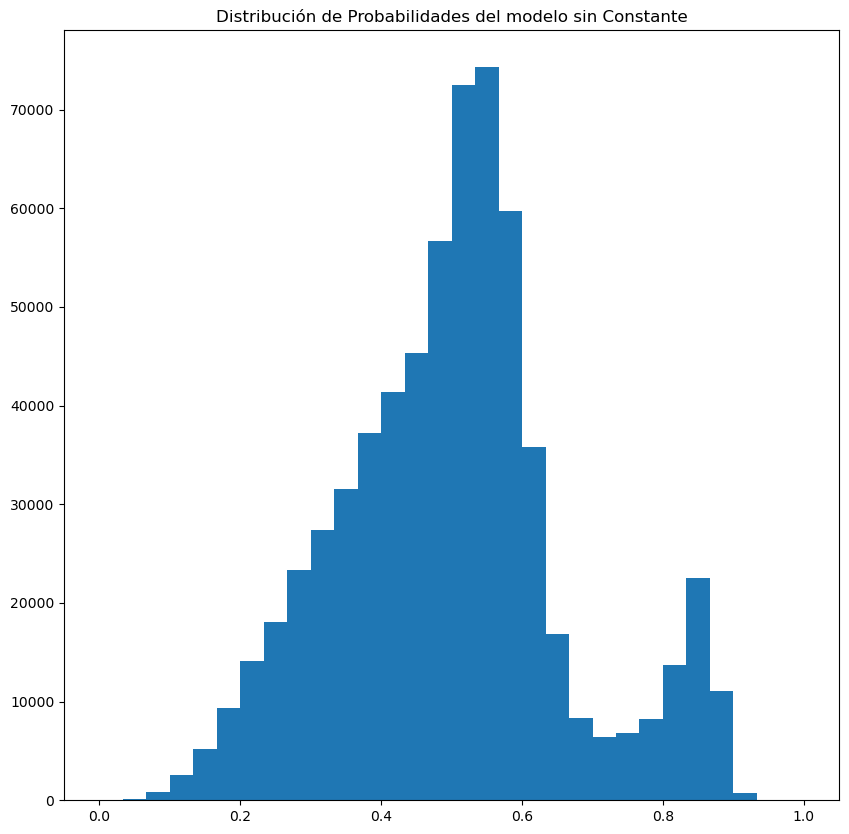

In [189]:
fig, ax = plt.subplots(figsize = (10, 10))
plt.hist(probabilidades_sin_constante,bins=30)
plt.title('Distribución de Probabilidades del modelo sin Constante')
plt.show()

In [190]:
X_test = X_test.drop(columns=['Census_OSBuildRevision', 'Census_SystemVolumeTotalCapacity' , 'IeVerIdentifier', 'Census_FirmwareManufacturerIdentifier'  , 'GeoNameIdentifier', 'OrganizationIdentifier', 'ProductName' , 'Processor'  , 'CountryIdentifier', 'CityIdentifier', 'LocaleEnglishNameIdentifier','Census_OSArchitecture', 'Census_IsFlightsDisabled', 'Census_FirmwareVersionIdentifier'])
X_test

Census_OSBuildNumber  Census_IsPenCapable  \
597696                 10240                    0   
767664                 10586                    0   
202070                 10586                    0   
749320                 16299                    0   
443897                 17134                    0   
...                      ...                  ...   
22266                  14393                    1   
352566                 17134                    1   
487432                 15063                    0   
430245                 17134                    0   
728748                 14393                    0   

        Census_PrimaryDiskTotalCapacity  RtpStateBitfield  \
597696                         476940.0               7.0   
767664                          29820.0               7.0   
202070                         476940.0               7.0   
749320                         953869.0               7.0   
443897                          76292.0               7.0   
...                                 ...               ...   
22266                           29824.0               7.0   
352566                         244198.0               7.0   
487432                          29820.0               7.0   
430245                         238475.0               7.0   
728748                         476940.0               7.0   

        DefaultBrowsersIdentifier  AVProductStatesIdentifier  \
597696                        0.0                     7945.0   
767664                     1078.0                    47238.0   
202070                        0.0                    27999.0   
749320                        0.0                    23657.0   
443897                        0.0                    53447.0   
...                           ...                        ...   
22266                         0.0                    53447.0   
352566                        0.0                    53447.0   
487432                        0.0                    53447.0   
430245                        0.0                    36429.0   
728748                        0.0                    40379.0   

        AVProductsEnabled  Platform  OsSuite OsPlatformSubRelease SkuEdition  \
597696                1.0  1.000526      256             0.946867   1.057954   
767664                1.0  1.000526      768             0.876344   0.967552   
202070                1.0  0.944618      768             0.944618   0.888109   
749320                1.0  1.000526      768             0.965466   0.967552   
443897                1.0  1.000526      256             1.089456   1.057954   
...                   ...       ...      ...                  ...        ...   
22266                 1.0  1.000526      768             0.859465   0.967552   
352566                1.0  1.000526      768             1.089456   0.967552   
487432                1.0  1.000526      768             0.918526   0.967552   
430245                1.0  1.000526      256             1.089456   1.057954   
728748                1.0  1.000526      768             0.859465   0.967552   

        IsProtected  PuaMode  SMode Census_DeviceFamily  \
597696          1.0      0.0    0.0             1.00024   
767664          1.0      0.0    0.0             1.00024   
202070          1.0      0.0    0.0             1.00024   
749320          1.0      0.0    0.0             1.00024   
443897          1.0      0.0    0.0             1.00024   
...             ...      ...    ...                 ...   
22266           1.0      0.0    0.0             1.00024   
352566          1.0      0.0    0.0             1.00024   
487432          1.0      0.0    0.0             1.00024   
430245          1.0      0.0    0.0             1.00024   
728748          1.0      0.0    0.0             1.00024   

        Census_ProcessorModelIdentifier  Census_ProcessorClass  \
597696                            649.0                    0.0   
767664                           1998.0                    0.0   
2

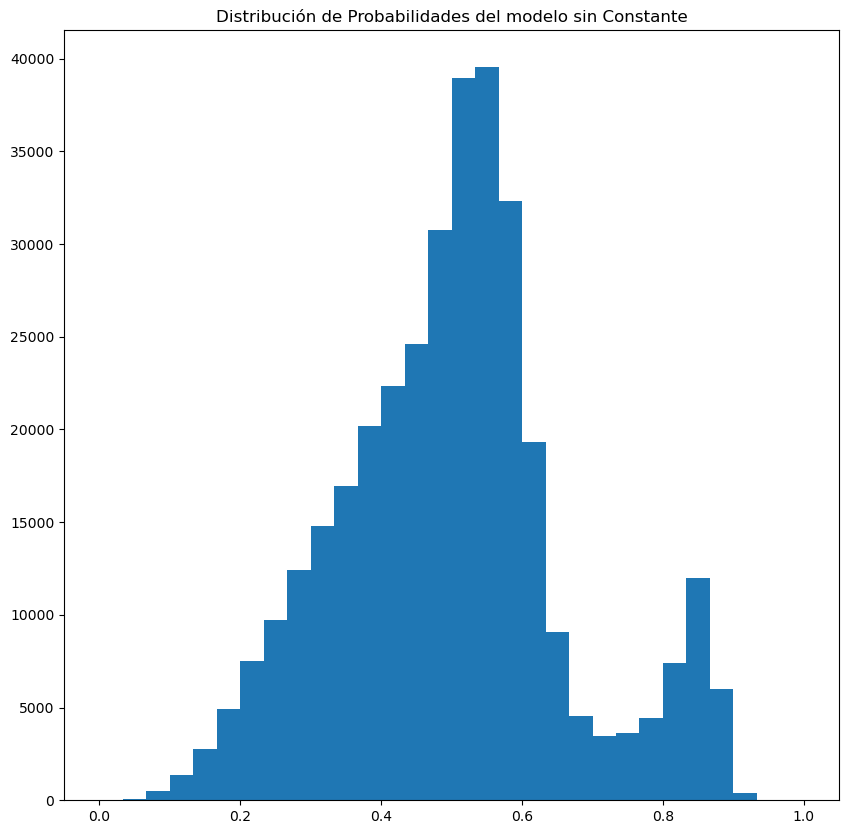

In [191]:
probabilidades_sin_constante= model_without_intercept.predict(X_test)
fig, ax = plt.subplots(figsize = (10, 10))
plt.hist(probabilidades_sin_constante,bins=30)
plt.title('Distribución de Probabilidades del modelo sin Constante')
plt.show()

In [192]:
from sklearn.metrics import (confusion_matrix, accuracy_score)

ypred = model_without_intercept.predict(X_test)
prediction = list(map(round, ypred))
print('Test accuracy = ', accuracy_score(y_test, prediction))

Test accuracy =  0.6250228571428571


In [193]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62    175065
           1       0.62      0.64      0.63    174935

    accuracy                           0.63    350000
   macro avg       0.63      0.63      0.62    350000
weighted avg       0.63      0.63      0.62    350000



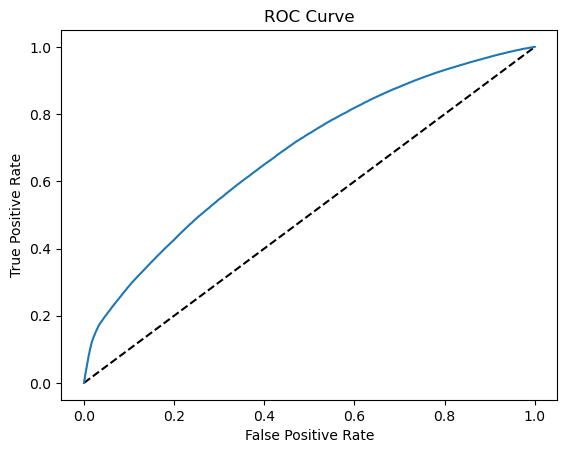

AUC con Constante: 0.6813706986707332


In [194]:
from sklearn.metrics import roc_curve

# Get the probabilities for each of the two categories
y_prob = model_without_intercept.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


from sklearn.metrics import roc_auc_score
print("AUC con Constante: {}".format(roc_auc_score(y_test, y_prob)))

In [195]:
X_test

Census_OSBuildNumber  Census_IsPenCapable  \
597696                 10240                    0   
767664                 10586                    0   
202070                 10586                    0   
749320                 16299                    0   
443897                 17134                    0   
...                      ...                  ...   
22266                  14393                    1   
352566                 17134                    1   
487432                 15063                    0   
430245                 17134                    0   
728748                 14393                    0   

        Census_PrimaryDiskTotalCapacity  RtpStateBitfield  \
597696                         476940.0               7.0   
767664                          29820.0               7.0   
202070                         476940.0               7.0   
749320                         953869.0               7.0   
443897                          76292.0               7.0   
...                                 ...               ...   
22266                           29824.0               7.0   
352566                         244198.0               7.0   
487432                          29820.0               7.0   
430245                         238475.0               7.0   
728748                         476940.0               7.0   

        DefaultBrowsersIdentifier  AVProductStatesIdentifier  \
597696                        0.0                     7945.0   
767664                     1078.0                    47238.0   
202070                        0.0                    27999.0   
749320                        0.0                    23657.0   
443897                        0.0                    53447.0   
...                           ...                        ...   
22266                         0.0                    53447.0   
352566                        0.0                    53447.0   
487432                        0.0                    53447.0   
430245                        0.0                    36429.0   
728748                        0.0                    40379.0   

        AVProductsEnabled  Platform  OsSuite OsPlatformSubRelease SkuEdition  \
597696                1.0  1.000526      256             0.946867   1.057954   
767664                1.0  1.000526      768             0.876344   0.967552   
202070                1.0  0.944618      768             0.944618   0.888109   
749320                1.0  1.000526      768             0.965466   0.967552   
443897                1.0  1.000526      256             1.089456   1.057954   
...                   ...       ...      ...                  ...        ...   
22266                 1.0  1.000526      768             0.859465   0.967552   
352566                1.0  1.000526      768             1.089456   0.967552   
487432                1.0  1.000526      768             0.918526   0.967552   
430245                1.0  1.000526      256             1.089456   1.057954   
728748                1.0  1.000526      768             0.859465   0.967552   

        IsProtected  PuaMode  SMode Census_DeviceFamily  \
597696          1.0      0.0    0.0             1.00024   
767664          1.0      0.0    0.0             1.00024   
202070          1.0      0.0    0.0             1.00024   
749320          1.0      0.0    0.0             1.00024   
443897          1.0      0.0    0.0             1.00024   
...             ...      ...    ...                 ...   
22266           1.0      0.0    0.0             1.00024   
352566          1.0      0.0    0.0             1.00024   
487432          1.0      0.0    0.0             1.00024   
430245          1.0      0.0    0.0             1.00024   
728748          1.0      0.0    0.0             1.00024   

        Census_ProcessorModelIdentifier  Census_ProcessorClass  \
597696                            649.0                    0.0   
767664                           1998.0                    0.0   
2

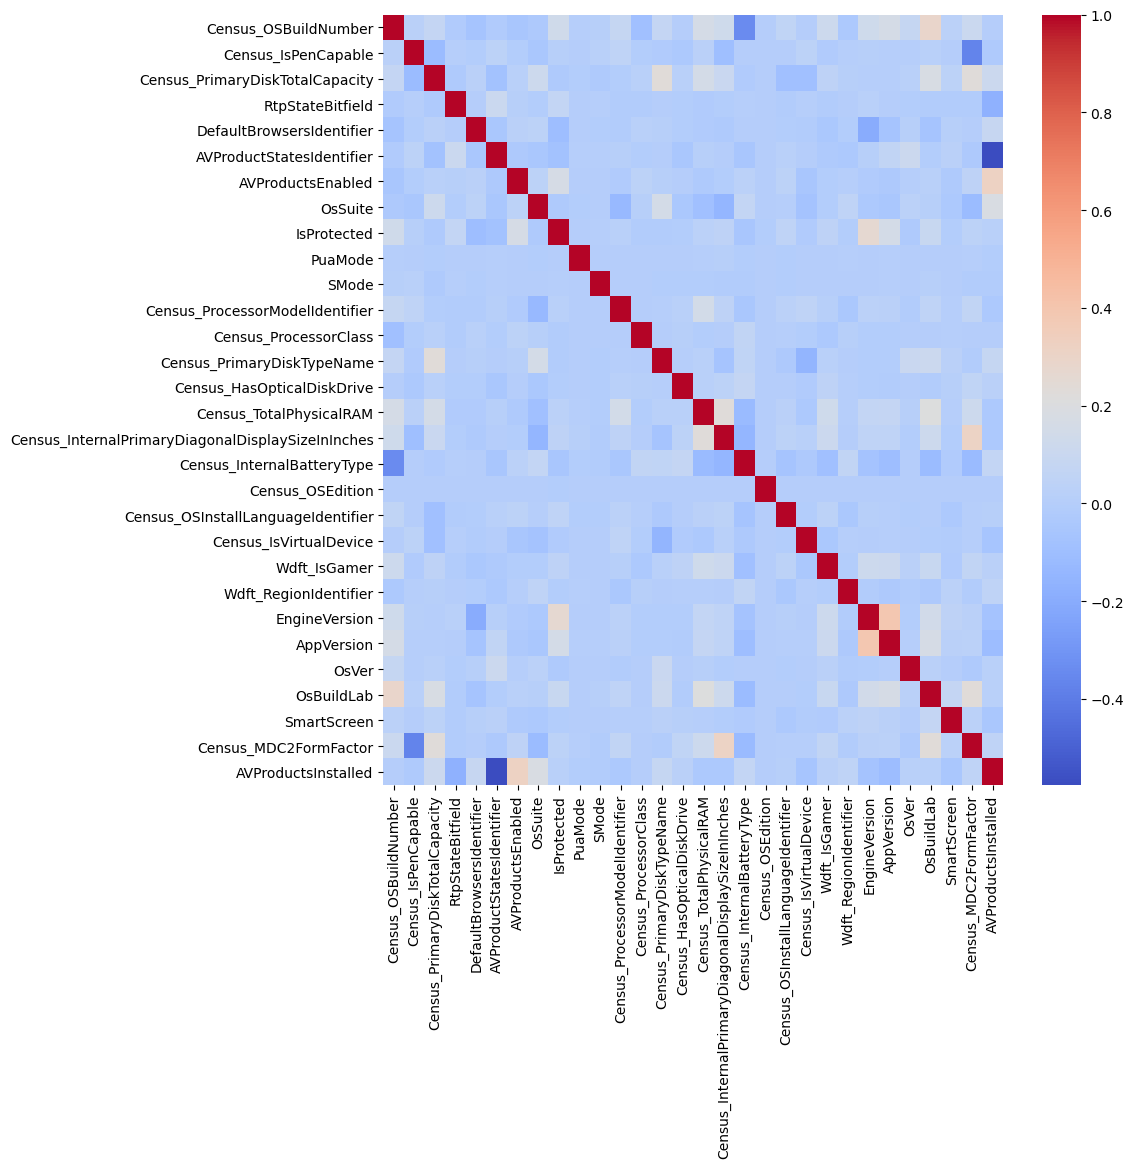

In [196]:
matriz=X_test.corr(method='pearson')

# Generate the Heatmap
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(matriz,cmap='coolwarm')
plt.show()

In [197]:
sample = pd.read_csv('test_sample.csv',low_memory=True)
sample

Unnamed: 0  Census_OSBuildNumber  Census_IsPenCapable  \
0                0                 17134                    0   
1                1                 17134                    0   
2                2                 14393                    0   
3                3                 17134                    0   
4                4                 16299                    0   
...            ...                   ...                  ...   
499995      499995                 17134                    0   
499996      499996                 16299                    0   
499997      499997                 17134                    0   
499998      499998                 17134                    1   
499999      499999                 17134                    0   

        Census_OSBuildRevision  ProductName  Census_PrimaryDiskTotalCapacity  \
0                          112     1.001529                         953869.0   
1                          254     1.001529                         114473.0   
2                         2189     1.001529                         476940.0   
3                            1     1.001529                          29820.0   
4                          547     1.001529                         122106.0   
...                        ...          ...                              ...   
499995                     165     1.001529                        1907729.0   
499996                     611     1.001529                         152627.0   
499997                     285     1.001529                         476940.0   
499998                     112     1.001529                         953869.0   
499999                     228     1.001529                         305245.0   

        GeoNameIdentifier  RtpStateBitfield  DefaultBrowsersIdentifier  \
0                   167.0               7.0                        0.0   
1                   211.0               7.0                        0.0   
2                    35.0               7.0                        0.0   
3                   267.0               7.0                        0.0   
4                   117.0               7.0                        0.0   
...                   ...               ...                        ...   
499995              276.0               7.0                        0.0   
499996               35.0               7.0                        0.0   
499997               15.0               7.0                        0.0   
499998               10.0               7.0                        0.0   
499999               89.0               7.0                        0.0   

        AVProductStatesIdentifier  AVProductsEnabled  CountryIdentifier  \
0                         53447.0                1.0                141   
1                         53447.0                1.0                171   
2                         48510.0                1.0                 29   
3                         53447.0                1.0                201   
4                         53447.0                1.0                 88   
...                           ...                ...                ...   
499995                    53447.0                1.0                 68   
499996                    53447.0                1.0                 29   
499997                    53447.0                1.0                 12   
499998                    51843.0                2.0                  9   
499999                    53447.0                1.0                 66   

        CityIdentifier  OrganizationIdentifier  LocaleEnglishNameIdentifier  \
0                  0.0                    27.0                          -29   
1             124736.0                     0.0                          -74   
2              95010.0                     0.0                          -85   
3              66202.0                    27.0                           -5   
4              20710.0                    27.0                          115   
..

In [198]:
X_test.columns

Index(['Census_OSBuildNumber', 'Census_IsPenCapable',
       'Census_PrimaryDiskTotalCapacity', 'RtpStateBitfield',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsEnabled', 'Platform', 'OsSuite', 'OsPlatformSubRelease',
       'SkuEdition', 'IsProtected', 'PuaMode', 'SMode', 'Census_DeviceFamily',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTypeName', 'Census_HasOpticalDiskDrive',
       'Census_TotalPhysicalRAM',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalBatteryType', 'Census_OSEdition',
       'Census_OSInstallTypeName', 'Census_OSInstallLanguageIdentifier',
       'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName',
       'Census_ActivationChannel', 'Census_FlightRing',
       'Census_IsVirtualDevice', 'Wdft_IsGamer', 'Wdft_RegionIdentifier',
       'EngineVersion', 'AppVersion', 'OsVer', 'OsBuildLab', 'SmartScreen',
       'Census_MDC2FormFactor',

### TESTING SAMPLE

In [199]:
y_sample, X_sample = sample['HasDetections'], sample[['Census_OSBuildNumber', 'Census_IsPenCapable',
       'Census_PrimaryDiskTotalCapacity', 'RtpStateBitfield',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsEnabled', 'Platform', 'OsSuite', 'OsPlatformSubRelease',
       'SkuEdition', 'IsProtected', 'PuaMode', 'SMode', 'Census_DeviceFamily',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTypeName', 'Census_HasOpticalDiskDrive',
       'Census_TotalPhysicalRAM',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalBatteryType', 'Census_OSEdition',
       'Census_OSInstallTypeName', 'Census_OSInstallLanguageIdentifier',
       'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName',
       'Census_ActivationChannel', 'Census_FlightRing',
       'Census_IsVirtualDevice', 'Wdft_IsGamer', 'Wdft_RegionIdentifier',
       'EngineVersion', 'AppVersion', 'OsVer', 'OsBuildLab', 'SmartScreen',
       'Census_MDC2FormFactor', 'AVProductsInstalled']]

In [200]:
from sklearn.metrics import (confusion_matrix, accuracy_score)

#X_sample = sc_x.fit_transform(X_sample)

ypred = model_without_intercept.predict(X_sample)
prediction = list(map(round, ypred))
print('Test accuracy = ', accuracy_score(y_sample, prediction))

Test accuracy =  0.625084


In [201]:
X_sample

Census_OSBuildNumber  Census_IsPenCapable  \
0                      17134                    0   
1                      17134                    0   
2                      14393                    0   
3                      17134                    0   
4                      16299                    0   
...                      ...                  ...   
499995                 17134                    0   
499996                 16299                    0   
499997                 17134                    0   
499998                 17134                    1   
499999                 17134                    0   

        Census_PrimaryDiskTotalCapacity  RtpStateBitfield  \
0                              953869.0               7.0   
1                              114473.0               7.0   
2                              476940.0               7.0   
3                               29820.0               7.0   
4                              122106.0               7.0   
...                                 ...               ...   
499995                        1907729.0               7.0   
499996                         152627.0               7.0   
499997                         476940.0               7.0   
499998                         953869.0               7.0   
499999                         305245.0               7.0   

        DefaultBrowsersIdentifier  AVProductStatesIdentifier  \
0                             0.0                    53447.0   
1                             0.0                    53447.0   
2                             0.0                    48510.0   
3                             0.0                    53447.0   
4                             0.0                    53447.0   
...                           ...                        ...   
499995                        0.0                    53447.0   
499996                        0.0                    53447.0   
499997                        0.0                    53447.0   
499998                        0.0                    51843.0   
499999                        0.0                    53447.0   

        AVProductsEnabled  Platform  OsSuite  OsPlatformSubRelease  \
0                     1.0   1.00221      768              1.087413   
1                     1.0   1.00221      768              1.087413   
2                     1.0   1.00221      768              0.842255   
3                     1.0   1.00221      768              1.087413   
4                     1.0   1.00221      768              0.975531   
...                   ...       ...      ...                   ...   
499995                1.0   1.00221      768              1.087413   
499996                1.0   1.00221      256              0.975531   
499997                1.0   1.00221      768              1.087413   
499998                2.0   1.00221      768              1.087413   
499999                1.0   1.00221      768              1.087413   

        SkuEdition  IsProtected  PuaMode  SMode  Census_DeviceFamily  \
0         0.971231          1.0      0.0    0.0             1.001676   
1         0.971231          1.0      0.0    0.0             1.001676   
2         0.971231          1.0      0.0    0.0             1.001676   
3         0.971231          1.0      0.0    0.0             1.001676   
4         0.971231          1.0      0.0    0.0             1.001676   
...            ...          ...      ...    ...                  ...   
499995    0.971231          1.0      0.0    0.0             1.001676   
499996    1.055247          1.0      0.0    0.0             1.001676   
499997    0.971231          1.0      0.0    0.0             1.001676   
499998    0.971231          1.0      0.0    0.0             1.001676   
499999    0.971231          1.0      0.0    0.0             1.001676   

        Census_ProcessorModelIdentifier  Census_ProcessorClass  \
0                                2660.0                    0.0   
1                              

In [202]:
from sklearn.metrics import classification_report
print(classification_report(y_sample, prediction))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62    249898
           1       0.62      0.64      0.63    250102

    accuracy                           0.63    500000
   macro avg       0.63      0.63      0.62    500000
weighted avg       0.63      0.63      0.62    500000



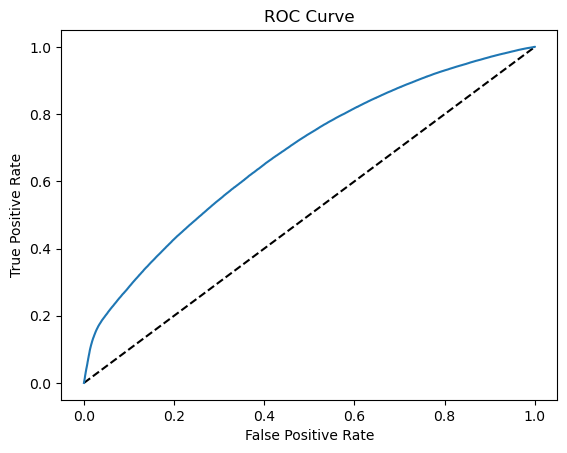

AUC con Constante: 0.6805739587310633


In [203]:
from sklearn.metrics import roc_curve

# Get the probabilities for each of the two categories
y_prob = model_without_intercept.predict(X_sample)

fpr, tpr, thresholds = roc_curve(y_sample, y_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


from sklearn.metrics import roc_auc_score
print("AUC con Constante: {}".format(roc_auc_score(y_sample, y_prob)))

## LOGISTIC REGRESSION WITH SKLEARN 

In [204]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
sc_x = MinMaxScaler()

#Variables independientes entrenamiento estandarizadas
X_train_scaled = sc_x.fit_transform(X_train)
X_test_scaled = sc_x.fit_transform(X_test)

In [205]:
lgr = LogisticRegression(solver='newton-cg' , class_weight="balanced")
lgr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', solver='newton-cg')

In [206]:
from sklearn.metrics import (confusion_matrix, accuracy_score)

ypred = lgr.predict(X_test)
prediction = list(map(round, ypred))
print('Test accuracy = ', accuracy_score(y_test, prediction))

Test accuracy =  0.6239285714285714


In [207]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62    175065
           1       0.62      0.62      0.62    174935

    accuracy                           0.62    350000
   macro avg       0.62      0.62      0.62    350000
weighted avg       0.62      0.62      0.62    350000



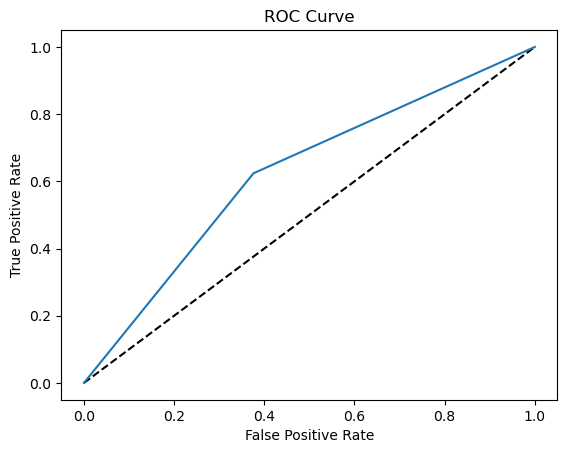

AUC con Constante: 0.6239285460766728


In [208]:
from sklearn.metrics import roc_curve

# Get the probabilities for each of the two categories
y_prob = lgr.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


from sklearn.metrics import roc_auc_score
print("AUC con Constante: {}".format(roc_auc_score(y_test, y_prob)))

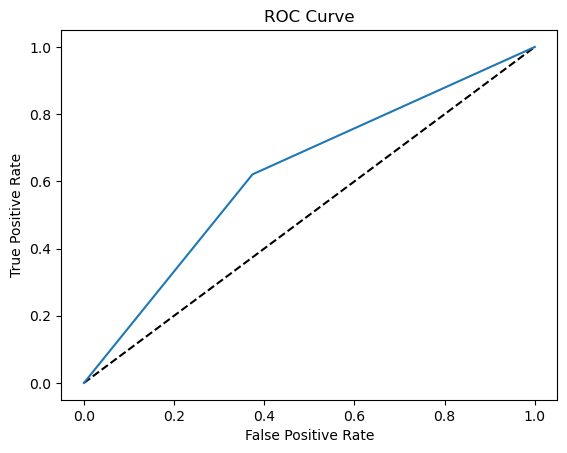

AUC con Constante: 0.6234531303105019


In [209]:
from sklearn.metrics import roc_curve

# Get the probabilities for each of the two categories
y_prob = lgr.predict(X_sample)

fpr, tpr, thresholds = roc_curve(y_sample, y_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


from sklearn.metrics import roc_auc_score
print("AUC con Constante: {}".format(roc_auc_score(y_sample, y_prob)))

## SVC - RBF

In [210]:
from sklearn import svm

In [ ]:
model = svm.SVC(kernel = 'rbf', C = 1)
model = model.fit(X_train, y_train)

In [ ]:
ypred = model.predict(X_test)
prediction = list(map(round, ypred))
print('Test accuracy = ', accuracy_score(y_test, prediction))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

In [ ]:
from sklearn.metrics import roc_curve

# Get the probabilities for each of the two categories
y_prob = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


from sklearn.metrics import roc_auc_score
print("AUC con Constante: {}".format(roc_auc_score(y_test, y_prob)))

In [ ]:
from sklearn.metrics import roc_curve

# Get the probabilities for each of the two categories
y_prob = lgr.predict(X_sample)

fpr, tpr, thresholds = roc_curve(y_sample, y_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


from sklearn.metrics import roc_auc_score
print("AUC con Constante: {}".format(roc_auc_score(y_sample, y_prob)))

## SVC RBF - C 100 

In [ ]:
from sklearn import svm
model = svm.SVC(kernel = 'rbf', C = 100)
model = model.fit(X_train,y_train)

In [ ]:
ypred = model.predict(X_test)
prediction = list(map(round, ypred))
print('Test accuracy = ', accuracy_score(y_test, prediction))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

In [ ]:
from sklearn.metrics import roc_curve

# Get the probabilities for each of the two categories
y_prob = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


from sklearn.metrics import roc_auc_score
print("AUC con Constante: {}".format(roc_auc_score(y_test, y_prob)))

In [ ]:
from sklearn.metrics import roc_curve

# Get the probabilities for each of the two categories
y_prob = lgr.predict(X_sample)

fpr, tpr, thresholds = roc_curve(y_sample, y_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


from sklearn.metrics import roc_auc_score
print("AUC con Constante: {}".format(roc_auc_score(y_sample, y_prob)))

## SVC linear C 1

In [ ]:
from sklearn import svm
model = svm.SVC(kernel = 'linear', C = 1)
model = model.fit(X_train,y_train)

In [ ]:
ypred = model.predict(X_test)
prediction = list(map(round, ypred))
print('Test accuracy = ', accuracy_score(y_test, prediction))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

In [ ]:
from sklearn.metrics import roc_curve

# Get the probabilities for each of the two categories
y_prob = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


from sklearn.metrics import roc_auc_score
print("AUC con Constante: {}".format(roc_auc_score(y_test, y_prob)))

In [ ]:
from sklearn.metrics import roc_curve

# Get the probabilities for each of the two categories
y_prob = lgr.predict(X_sample)

fpr, tpr, thresholds = roc_curve(y_sample, y_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


from sklearn.metrics import roc_auc_score
print("AUC con Constante: {}".format(roc_auc_score(y_sample, y_prob)))

## SVC LINEAR C 100

In [ ]:
from sklearn import svm
model = svm.SVC(kernel = 'linear', C = 100)
model = model.fit(X_train,y_train)

In [ ]:
ypred = model.predict(X_test)
prediction = list(map(round, ypred))
print('Test accuracy = ', accuracy_score(y_test, prediction))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

In [ ]:
from sklearn.metrics import roc_curve

# Get the probabilities for each of the two categories
y_prob = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


from sklearn.metrics import roc_auc_score
print("AUC con Constante: {}".format(roc_auc_score(y_test, y_prob)))

In [ ]:
from sklearn.metrics import roc_curve

# Get the probabilities for each of the two categories
y_prob = lgr.predict(X_sample)

fpr, tpr, thresholds = roc_curve(y_sample, y_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


from sklearn.metrics import roc_auc_score
print("AUC con Constante: {}".format(roc_auc_score(y_sample, y_prob)))

## SVC POLY C 100

In [ ]:
from sklearn import svm
model = svm.SVC(kernel = 'poly', C = 100)
model = model.fit(X_train,y_train)

In [ ]:
ypred = model.predict(X_test)
prediction = list(map(round, ypred))
print('Test accuracy = ', accuracy_score(y_test, prediction))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

In [ ]:
from sklearn.metrics import roc_curve

# Get the probabilities for each of the two categories
y_prob = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


from sklearn.metrics import roc_auc_score
print("AUC con Constante: {}".format(roc_auc_score(y_test, y_prob)))

In [ ]:
from sklearn.metrics import roc_curve

# Get the probabilities for each of the two categories
y_prob = lgr.predict(X_sample)

fpr, tpr, thresholds = roc_curve(y_sample, y_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


from sklearn.metrics import roc_auc_score
print("AUC con Constante: {}".format(roc_auc_score(y_sample, y_prob)))

## SVC SIGMOID 

In [ ]:
from sklearn import svm
model = svm.SVC(kernel = 'sigmoid', C = 100)
model = model.fit(X_train,y_train)

In [ ]:
ypred = model.predict(X_test)
prediction = list(map(round, ypred))
print('Test accuracy = ', accuracy_score(y_test, prediction))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

In [ ]:
from sklearn.metrics import roc_curve

# Get the probabilities for each of the two categories
y_prob = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


from sklearn.metrics import roc_auc_score
print("AUC con Constante: {}".format(roc_auc_score(y_test, y_prob)))

In [ ]:
from sklearn.metrics import roc_curve

# Get the probabilities for each of the two categories
y_prob = lgr.predict(X_sample)

fpr, tpr, thresholds = roc_curve(y_sample, y_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


from sklearn.metrics import roc_auc_score
print("AUC con Constante: {}".format(roc_auc_score(y_sample, y_prob)))

## SVC RBF (El que mejor funciono)

In [ ]:
# Tunning with Gamma: AUTO
model = svm.SVC(kernel='rbf', C=1, gamma='auto')
model = model.fit(X_train, y_train)

In [ ]:
ypred = model.predict(X_test)
prediction = list(map(round, ypred))
print('Test accuracy = ', accuracy_score(y_test, prediction))

In [ ]:
print(classification_report(y_test, prediction))

In [ ]:
# Get the probabilities for each of the two categories
y_prob = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print("AUC con Constante: {}".format(roc_auc_score(y_test, y_prob)))

In [ ]:
# Tunning with Gamma: 0.1
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model = model.fit(X_train, y_train)

In [ ]:
ypred = model.predict(X_test)
prediction = list(map(round, ypred))
print('Test accuracy = ', accuracy_score(y_test, prediction))

In [ ]:
print(classification_report(y_test, prediction))

In [ ]:
# Get the probabilities for each of the two categories
y_prob = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print("AUC con Constante: {}".format(roc_auc_score(y_test, y_prob)))

In [ ]:
# Tunning with Gamma: Auto and C: 1000
model = svm.SVC(kernel='rbf', C=1000, gamma='auto')
model = model.fit(X_train, y_train)

In [ ]:
ypred = model.predict(X_test)
prediction = list(map(round, ypred))
print('Test accuracy = ', accuracy_score(y_test, prediction))

In [ ]:
print(classification_report(y_test, prediction))

In [ ]:
# Get the probabilities for each of the two categories
y_prob = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print("AUC con Constante: {}".format(roc_auc_score(y_test, y_prob)))

## XGBoost

In [ ]:
X_test

In [ ]:
X_train

In [ ]:
import xgboost as xgb
import time
import gc

# parametros:

gamma mientras mas alto menos riesgo

colsample_bytree valores pequenos

subsample numeros mas pequenos

max_depth valores mas pequenos

gamma  mas alto menos riesgo

the learning rate mas pequeno

min_child_weight mas alto menos riesgo

In [ ]:
X_test = X_test.astype(np.float64)
start_time = time.time()

clf_xgb = xgb.XGBClassifier(learning_rate=0.01, 
                            n_estimators=500, 
                            max_depth=2 ,
                            min_child_weight = 10,
                            gamma=100,
                            objective= 'binary:logistic',
                            nthread=4,
                            seed=42)

clf_xgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], 
            early_stopping_rounds=100, eval_metric='auc', verbose=100)

predictions = clf_xgb.predict(X_test)

print(classification_report(y_test, predictions))
print("accuracy_score", accuracy_score(y_test, predictions))
predictions_probas = clf_xgb.predict_proba(X_test)
print("roc-auc score for the class 1, from target 'HasDetections' ", roc_auc_score(y_test, predictions_probas[:,1]))
print("elapsed time in seconds: ", time.time() - start_time)
gc.collect()

In [ ]:
y_prob = clf_xgb.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, predictions_probas[:,1])

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


from sklearn.metrics import roc_auc_score
print("AUC con Constante: {}".format(roc_auc_score(y_test, predictions_probas[:,1])))

In [ ]:
xgb.plot_importance(clf_xgb)
plt.figure(figsize = (16, 12))
plt.show()

In [ ]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

In [ ]:
from xgboost import cv

params = {"learning_rate":0.01, "max_depth":3 ,"min_child_weight": 10, "gamma":500, "objective":'binary:logistic', "nthread":4}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [ ]:
xgb_cv.head()

In [ ]:
data_dmatrix = xgb.DMatrix(data=X_test,label=y_test)
from xgboost import cv

params = {"learning_rate":0.01, "max_depth":3 ,"min_child_weight": 10, "gamma":500, "objective":'binary:logistic', "nthread":4}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [ ]:
xgb_cv.head()

In [ ]:
X_test.columns

In [ ]:
sample = pd.read_csv('test_sample.csv',low_memory=True)
sample

In [ ]:
y, X = sample['HasDetections'], sample[[
'Census_OSBuildNumber', 'Census_IsPenCapable',
       'Census_PrimaryDiskTotalCapacity', 'RtpStateBitfield',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsEnabled', 'Platform', 'OsSuite', 'OsPlatformSubRelease',
       'SkuEdition', 'IsProtected', 'PuaMode', 'SMode', 'Census_DeviceFamily',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTypeName', 'Census_HasOpticalDiskDrive',
       'Census_TotalPhysicalRAM',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalBatteryType', 'Census_OSEdition',
       'Census_OSInstallTypeName', 'Census_OSInstallLanguageIdentifier',
       'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName',
       'Census_ActivationChannel', 'Census_FlightRing',
       'Census_IsVirtualDevice', 'Wdft_IsGamer', 'Wdft_RegionIdentifier',
       'EngineVersion', 'AppVersion', 'OsVer', 'OsBuildLab', 'SmartScreen',
       'Census_MDC2FormFactor', 'AVProductsInstalled']]

In [ ]:
X = X.astype(np.float64)

In [ ]:
start_time = time.time()

clf_xgb = xgb.XGBClassifier(learning_rate=0.1, 
                            n_estimators=1000, 
                            max_depth=3,
                            min_child_weight=10,
                            gamma=1000,
                            subsample=0.8,
                            colsample_bytree=0.6,
                            objective= 'binary:logistic',
                            nthread=-1,
                            scale_pos_weight=1,
                            reg_alpha = 0,
                            reg_lambda = 1,
                            seed=42)

clf_xgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X, y)], 
            early_stopping_rounds=100, eval_metric='auc', verbose=100)

predictions = clf_xgb.predict(X)

print(classification_report(y, predictions))
print("accuracy_score", accuracy_score(y, predictions))
predictions_probas = clf_xgb.predict_proba(X)
print("roc-auc score for the class 1, from target 'HasDetections' ", roc_auc_score(y, predictions_probas[:,1]))
print("elapsed time in seconds: ", time.time() - start_time)
gc.collect()

Se esta cayendo en overfitting!

## REVISANDO PARA REGRESION LOGISTICA

In [ ]:
from sklearn.metrics import (confusion_matrix, accuracy_score)

ypred = model_without_intercept.predict(X)
prediction = list(map(round, ypred))
print('Test accuracy = ', accuracy_score(y, prediction))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y, prediction))

In [ ]:
from sklearn.metrics import roc_curve

# Get the probabilities for each of the two categories
y_prob = model_without_intercept.predict(X)

fpr, tpr, thresholds = roc_curve(y, y_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


from sklearn.metrics import roc_auc_score
print("AUC con Constante: {}".format(roc_auc_score(y, y_prob)))

estimator = xgb.XGBClassifier(
    objective= 'binary:logistic'
    nthread=4,
    seed=42
)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 2,
    cv = 3,
    verbose=True
)

grid_search.fit(X_train, y_train)

## DECISION TREES 

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

In [ ]:
final_model = grid_search.best_estimator_
final_model

In [ ]:
tree_clas = DecisionTreeClassifier(ccp_alpha=0.001, max_depth=9, max_features='auto',
                       random_state=1024)
tree_clas.fit(X_train, y_train)
y_predict = tree_clas.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

In [ ]:
from sklearn.metrics import roc_curve

# Get the probabilities for each of the two categories
y_prob = tree_clas.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


from sklearn.metrics import roc_auc_score
print("AUC con Constante: {}".format(roc_auc_score(y_test, y_prob)))

In [ ]:
y_predict = tree_clas.predict(X)

print(classification_report(y, y_predict))

In [ ]:
from sklearn.metrics import roc_curve

# Get the probabilities for each of the two categories
y_prob = tree_clas.predict(X)

fpr, tpr, thresholds = roc_curve(y, y_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


from sklearn.metrics import roc_auc_score
print("AUC con Constante: {}".format(roc_auc_score(y, y_prob)))

## NEURAL NETWORK MLP 

In [ ]:
X_test

In [ ]:
kfold = KFold(n_splits=5,random_state=7, shuffle=True)
clf = MLPClassifier(solver='lbfgs', random_state=1, alpha=1e-5, activation='logistic',  hidden_layer_sizes=(34,))

In [ ]:
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

In [ ]:
from sklearn.metrics import roc_curve

# Get the probabilities for each of the two categories
y_prob = clf.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


from sklearn.metrics import roc_auc_score
print("AUC con Constante: {}".format(roc_auc_score(y_test, y_prob)))

## POISSON

In [ ]:
import statsmodels.api as sm

poission_model = sm.GLM(y_train, X_train, family=sm.families.Poisson())
result = poission_model.fit(method="newton")
result.summary()

In [ ]:
X1_train = X_train.drop(columns=['Platform', 'OsSuite', 'IeVerIdentifier', 'Census_OSEdition', 'Census_OSInstallLanguageIdentifier' , 'Census_FirmwareManufacturerIdentifier'])
X1_train
X1_test = X_test.drop(columns=['Platform', 'OsSuite', 'IeVerIdentifier', 'Census_OSEdition', 'Census_OSInstallLanguageIdentifier' , 'Census_FirmwareManufacturerIdentifier'])
X1_test
X1 = X.drop(columns=['Platform', 'OsSuite', 'IeVerIdentifier', 'Census_OSEdition', 'Census_OSInstallLanguageIdentifier' , 'Census_FirmwareManufacturerIdentifier'])
X1
poission_model = sm.GLM(y_train, X1_train, family=sm.families.Poisson())
result = poission_model.fit(method="newton")
result.summary()

In [ ]:
probabilidades_sin_constante=  result.predict(X1_train)

In [ ]:
from sklearn.metrics import (confusion_matrix, accuracy_score)

ypred = result.predict(X1_train)
prediction = list(map(round, ypred))
print('Test accuracy = ', accuracy_score(y_train, prediction))

In [ ]:
ypred

## Linear Probability Model 

In [ ]:
#model_without_intercept=sm.Logit(y_train,X_train).fit(method='newton')
lpm_mod = sm.OLS(y_train, X_train)
lpm_res = lpm_mod.fit_regularized(alpha=2., L1_wt=0.1, refit=True)
lpm_res.summary()

In [ ]:
X1_train = X_train.drop(columns=['Platform', 'Census_OSEdition'])
X1_train
X1_test = X_test.drop(columns=['Platform', 'Census_OSEdition'])
X1_test
X1 = X.drop(columns=['Platform', 'Census_OSEdition'])
X1
lpm_mod = sm.OLS(y_train, X1_train)
lpm_res = lpm_mod.fit()
lpm_res.summary()

In [ ]:
from sklearn.metrics import (confusion_matrix, accuracy_score)

ypred = lpm_res.predict(X1_train)
prediction = list(map(round, ypred))
print('Test accuracy = ', accuracy_score(y_train, prediction))

In [ ]:
from sklearn.metrics import roc_curve

# Get the probabilities for each of the two categories
y_prob = lpm_res.predict(X1_test)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


from sklearn.metrics import roc_auc_score
print("AUC con Constante: {}".format(roc_auc_score(y_test, y_prob)))

In [ ]:
from sklearn.metrics import (confusion_matrix, accuracy_score)

ypred = lpm_res.predict(X1)
prediction = list(map(round, ypred))
print('Test accuracy = ', accuracy_score(y, prediction))

In [ ]:
from sklearn.metrics import roc_curve

# Get the probabilities for each of the two categories
y_prob = lpm_res.predict(X1)

fpr, tpr, thresholds = roc_curve(y, y_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


from sklearn.metrics import roc_auc_score
print("AUC con Constante: {}".format(roc_auc_score(y, y_prob)))

# SMOTE

SMOTE es una técnica estadística de sobremuestreo de minorías sintéticas para aumentar el número de casos de un conjunto de datos de forma equilibrada. El componente funciona cuando genera nuevas instancias a partir de casos minoritarios existentes que se proporcionan como entrada.

#Generar la regresión logística
modelo_con_constante=sm.Logit(y_res,X_res).fit(method='powell')
print(modelo_con_constante.summary())

# KNN 

## TRAIN

## TEST 

## RNA